# B-ALL Dev State Analysis
### With Multipotency Score

In [1]:
%config InlineBackend.figure_formats = ['retina']
import numpy as np
import scanpy as sc
import scipy as sci
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
lab_path="/Users/andyzeng/Drive/Laptop/Dick_Lab/"
sys.path.append(lab_path+"AMLhierarchies/")
import Hierarchy_Tools as tk

In [3]:
sc.settings.verbosity = 1 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, fontsize=8, dpi_save=200, figsize=(6,4), format='png')
sc.settings.figdir = 'figures/'

In [4]:
%load_ext rpy2.ipython

## Updated B-ALL 2046 Annotations

In [5]:
ball2046_anno = pd.read_csv('BALL2046_DevState_Updated_May2024_AZ.csv').set_index('Patient')

# configure into scanpy object
ball2046 = sc.AnnData(ball2046_anno[['Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B', 'Mature_B', 'T_NK', 'Monocyte', 'Erythroid']])
ball2046_anno = ball2046_anno.drop(['Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 
                                    'Pro_B', 'Pre_B', 'Mature_B', 'T_NK', 'Monocyte', 'Erythroid'], axis=1)
ball2046.obs = ball2046.obs.join( ball2046_anno )
ball2046

/Users/andyzeng/opt/anaconda3/envs/singlecell/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  after removing the cwd from sys.path.


AnnData object with n_obs × n_vars = 2046 × 11
    obs: 'Sample', 'PatientID', 'In Bulk tSNE/sc paper', 'Lineage', 'RNA_seq', 'WES', 'WGS', 'SNP6_0', 'InstituteID', 'PatientID_old', 'PatientIdAlias', 'SampleID', 'SampleID_old', 'SampleIdAlias', 'batch', 'Library', 'Institute', 'ClinicalProtocol', 'Age', 'Sex', 'WBC', 'Risk_Group', 'Karyotype', 'MRD_D29_2cat', 'MRD_D29_3cat', 'MRD_D29_5cat', 'MRD_D46_2cat', 'oscensor', 'ostime', 'OS_priority', 'efscensor', 'efstime', 'EFS_priority', 'First event', 'Relapse (yes/no)', 'Site of relapse', 'anyRelcensor', 'anyReltime', 'Testicular Involvement', 'Testes Site of Relapse', 'CNS Status at Diagnosis', 'CNS Site of Relapse', 'tSNE_subgroup', 'Down', 'Dicentric', 'CRLF2r', 'Primary_subtype_old', 'Secondary_subtype_old', 'changed_Subtype', 'Comments', 'Genomic_Subtype', 'GenomicRisk_pediatric', 'GenomicRisk_adult', 'Fusion', 'Subgroup', 'Transcript BCR::ABL1', 'PC1'

### Visualize Ridge plots by lineage

In [8]:
# dat_Lineage_obs = ball2046.obs[['Primary_subtype']].join(ball2046.to_df()).dropna().\
#                     rename(columns={'Primary_subtype':'subtype'})
# dat_Lineage_obs

In [639]:
dat_Lineage_obs = ball2046.obs[['Genomic_Subtype']].join(ball2046.to_df()).dropna()
dat_Lineage_obs

Genomic_Subtype  Multipotency_Score   HSC_MPP  Myeloid_Prog  \
Patient                                                                       
SJBALL030036_D1  BCR::ABL1-like           -0.650901 -1.860952     -0.374011   
SJBALL030040_D1    Hyperdiploid           -1.173737 -0.530932     -0.565015   
SJBALL030059_D1           KMT2A            0.310770 -1.106204      1.431375   
SJBALL030072_D1  BCR::ABL1-like           -0.704252 -1.898427     -0.771614   
SJBALL030090_D1    Hyperdiploid           -0.873461 -0.921336     -0.760483   
...                         ...                 ...       ...           ...   
SJBALL031128_D1       BCR::ABL1            2.079928  0.613443      2.202049   
SJBALL031144_D1    Hyperdiploid           -0.263436 -1.385490     -1.247599   
SJBALL031168_D1    Hyperdiploid           -0.415112  0.934349     -0.834740   
SJBALL031267_D1  BCR::ABL1-like            0.186993  0.009535     -0.868767   
SJBALL031281_D1            DUX4            0.722558  0.641936      0.886671   

                  Pre_pDC  Early_Lymphoid     Pro_B     Pre_B  Mature_B  \
Patient                                                                   
SJBALL030036_D1 -1.099284        0.091847  0.888790 -1.148544 -1.923114   
SJBALL030040_D1  0.644559       -0.114353  1.771480  0.846471  0.531021   
SJBALL030059_D1  0.984563        1.545509 -0.306696 -0.024594 -3.038016   
SJBALL030072_D1 -1.306183        0.639066  1.148226 -0.860917 -1.856320   
SJBALL030090_D1  1.160679       -0.235776  0.561812  0.536238  0.355429   
...                   ...             ...       ...       ...       ...   
SJBALL031128_D1  1.042439        2.108982 -0.894439 -1.836389 -0.817439   
SJBALL031144_D1 -0.790197       -0.815030 -0.577615 -1.356832  0.261091   
SJBALL031168_D1  1.803261       -0.196214  1.223598  0.903113  0.480196   
SJBALL031267_D1 -0.758284       -0.189230 -0.191334 -0.621177  0.150438   
SJBALL031281_D1 -0.709486       -0.003578 -0.924807 -0.189674  1.298866   

                     T_NK  Monocyte  Erythroid  
Patient                                         
SJBALL030036_D1  0.852538 -0.200462   0.954593  
SJBALL030040_D1 -0.169395 -0.546178  -0.111596  
SJBALL030059_D1 -1.981852  0.464842   0.068128  
SJBALL030072_D1 -0.882372  0.908648   1.268102  
SJBALL030090_D1 -0.656105  0.620778   1.140011  
...                   ...       ...        ...  
SJBALL031128_D1 -1.816138  1.869336  -1.751711  
SJBALL031144_D1  0.806779  0.384702   1.595003  
SJBALL031168_D1 -0.864881 -1.221417   0.085051  
SJBALL031267_D1  0.106598 -0.015817   0.960584  
SJBALL031281_D1  0.803529  0.718239  -1.379748  

[2046 rows x 12 columns]

R[write to console]: Picking joint bandwidth of 0.276

R[write to console]: Picking joint bandwidth of 0.276



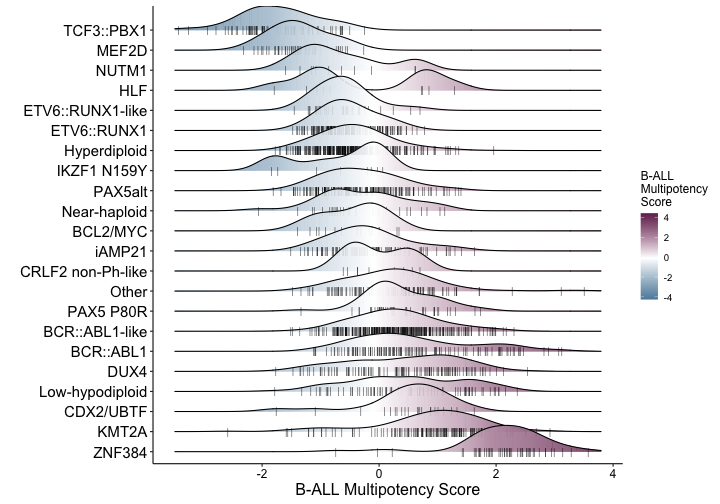

In [646]:
%%R -i dat_Lineage_obs -h 7 -w 10 --units in
library(stats)
library(ggridges)
library(ggpubr)
library(tidyverse)

name = 'Multipotency_Score'
display = 'B-ALL Multipotency Score'
dat_Lineage_obs <- dat_Lineage_obs %>% 
    mutate(NMFkey = get(paste0(name))) 

cutoff = stats::median(dat_Lineage_obs$NMFkey)

dat_Lineage_obs %>% 
    dplyr::filter(Genomic_Subtype %in% names(table(dat_Lineage_obs$Genomic_Subtype)[dat_Lineage_obs$Genomic_Subtype %>% table() >= 5])) %>% 
    ggplot(aes(y = fct_reorder(Genomic_Subtype, -NMFkey), x = NMFkey, fill=stat(x))) +
    geom_density_ridges_gradient(
        jittered_points = TRUE, scale = 1.7,
        position = position_points_jitter(width = 0, height = 0), 
        point_shape = '|', point_size = 3, point_alpha = 0.6) +
    scale_fill_gradient2(midpoint=cutoff, high='#71305D', low='#5083A2', name = 'B-ALL\nMultipotency\nScore') +
    xlab(paste0(name)) +
    theme_pubr() + xlim(-3.5, 3.8) +
    #geom_vline(xintercept = -1.2, lty = 2) + 
    ylab('') + xlab(display) + 
    theme(legend.position='right', 
          axis.text.y = element_text(size=15),
          axis.title.x = element_text(size=16)) + ggsave("BALL_MultipotencyScore_Figures/BALL2046_SubtypeRidge_Multipotency_Score.pdf", height=5.5, width=9)

R[write to console]: Picking joint bandwidth of 0.281

R[write to console]: Picking joint bandwidth of 0.281



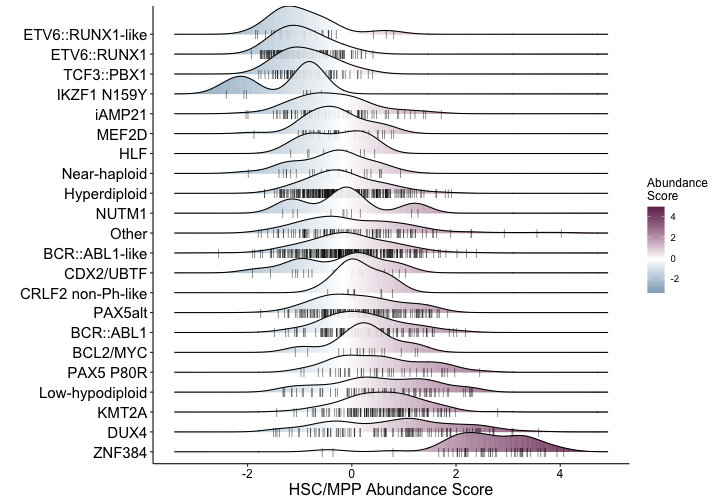

In [648]:
%%R -i dat_Lineage_obs -h 7 -w 10 --units in
library(stats)
library(ggridges)
library(ggpubr)
library(tidyverse)

name = 'HSC_MPP'
display = 'HSC/MPP Abundance Score'
dat_Lineage_obs <- dat_Lineage_obs %>% 
    mutate(NMFkey = get(paste0(name))) 

cutoff = stats::median(dat_Lineage_obs$NMFkey)

dat_Lineage_obs %>% 
    dplyr::filter(Genomic_Subtype %in% names(table(dat_Lineage_obs$Genomic_Subtype)[dat_Lineage_obs$Genomic_Subtype %>% table() >= 5])) %>% 
    ggplot(aes(y = fct_reorder(Genomic_Subtype, -NMFkey), x = NMFkey, fill=stat(x))) +
    geom_density_ridges_gradient(
        jittered_points = TRUE, scale = 1.7,
        position = position_points_jitter(width = 0, height = 0), 
        point_shape = '|', point_size = 3, point_alpha = 0.6) +
    scale_fill_gradient2(midpoint=cutoff, high='#71305D', low='#5083A2', name = 'Abundance\nScore') +
    xlab(paste0(name)) +
    theme_pubr() + #xlim(-3, 4.5) +
    ylab('') + xlab(display) + 
    theme(legend.position='right', 
          axis.text.y = element_text(size=15),
          axis.title.x = element_text(size=16)) + ggsave("BALL_MultipotencyScore_Figures/BALL2046_SubtypeRidge_HSCMPPLMPP.pdf", height=5.5, width=9)

R[write to console]: Picking joint bandwidth of 0.31

R[write to console]: Picking joint bandwidth of 0.31



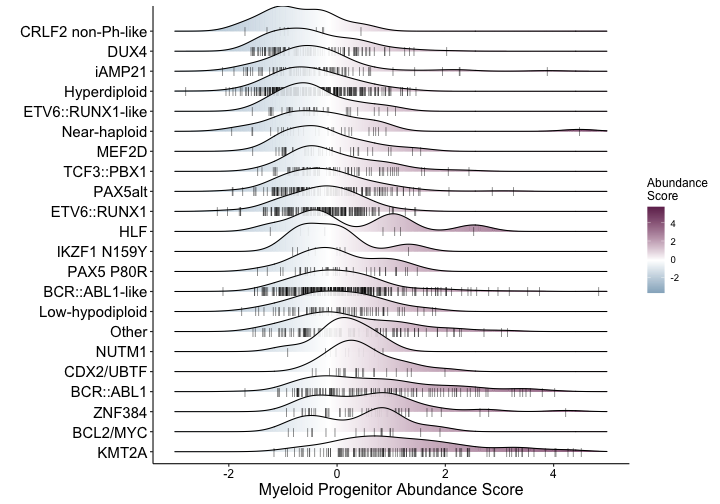

In [649]:
%%R -i dat_Lineage_obs -h 7 -w 10 --units in
library(stats)
library(ggridges)
library(ggpubr)
library(tidyverse)

name = 'Myeloid_Prog'
display = 'Myeloid Progenitor Abundance Score'
dat_Lineage_obs <- dat_Lineage_obs %>% 
    mutate(NMFkey = get(paste0(name))) 

cutoff = stats::median(dat_Lineage_obs$NMFkey)

dat_Lineage_obs %>% 
    dplyr::filter(Genomic_Subtype %in% names(table(dat_Lineage_obs$Genomic_Subtype)[dat_Lineage_obs$Genomic_Subtype %>% table() >= 5])) %>% 
    ggplot(aes(y = fct_reorder(Genomic_Subtype, -NMFkey), x = NMFkey, fill=stat(x))) +
    geom_density_ridges_gradient(
        jittered_points = TRUE, scale = 1.7,
        position = position_points_jitter(width = 0, height = 0), 
        point_shape = '|', point_size = 3, point_alpha = 0.6) +
    scale_fill_gradient2(midpoint=cutoff, high='#71305D', low='#5083A2', name = 'Abundance\nScore') +
    xlab(paste0(name)) +
    theme_pubr() + xlim(-3, 5) +
    ylab('') + xlab(display) + 
    theme(legend.position='right', 
          axis.text.y = element_text(size=15),
          axis.title.x = element_text(size=16)) + ggsave("BALL_MultipotencyScore_Figures/BALL2046_SubtypeRidge_Myeloid_Prog.pdf", height=5.5, width=9)

R[write to console]: Picking joint bandwidth of 0.273

R[write to console]: Picking joint bandwidth of 0.273



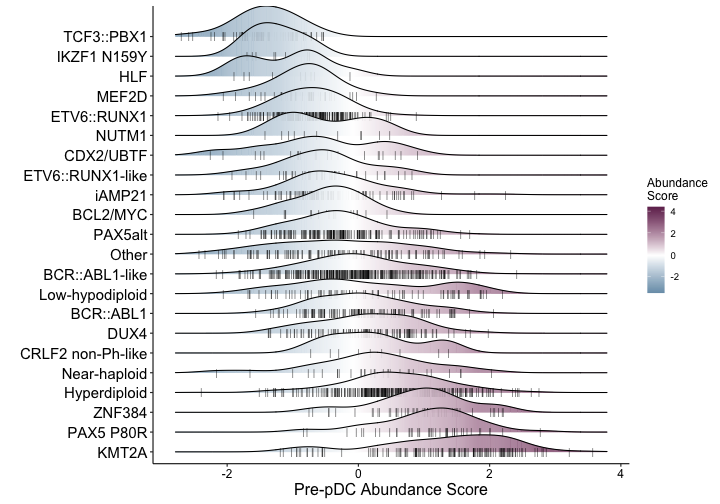

In [650]:
%%R -i dat_Lineage_obs -h 7 -w 10 --units in
library(stats)
library(ggridges)
library(ggpubr)
library(tidyverse)

name = 'Pre_pDC'
display = 'Pre-pDC Abundance Score'
dat_Lineage_obs <- dat_Lineage_obs %>% 
    mutate(NMFkey = get(paste0(name))) 

cutoff = stats::median(dat_Lineage_obs$NMFkey)

dat_Lineage_obs %>% 
    dplyr::filter(Genomic_Subtype %in% names(table(dat_Lineage_obs$Genomic_Subtype)[dat_Lineage_obs$Genomic_Subtype %>% table() >= 5])) %>% 
    ggplot(aes(y = fct_reorder(Genomic_Subtype, -NMFkey), x = NMFkey, fill=stat(x))) +
    geom_density_ridges_gradient(
        jittered_points = TRUE, scale = 1.7,
        position = position_points_jitter(width = 0, height = 0), 
        point_shape = '|', point_size = 3, point_alpha = 0.6) +
    scale_fill_gradient2(midpoint=cutoff, high='#71305D', low='#5083A2', name = 'Abundance\nScore') +
    xlab(paste0(name)) +
    theme_pubr() + xlim(-2.8, 3.8) +
    ylab('') + xlab(display) + 
    theme(legend.position='right', 
          axis.text.y = element_text(size=15),
          axis.title.x = element_text(size=16)) + ggsave("BALL_MultipotencyScore_Figures/BALL2046_SubtypeRidge_Pre_pDC.pdf", height=5.5, width=9)

R[write to console]: Picking joint bandwidth of 0.262

R[write to console]: Picking joint bandwidth of 0.262



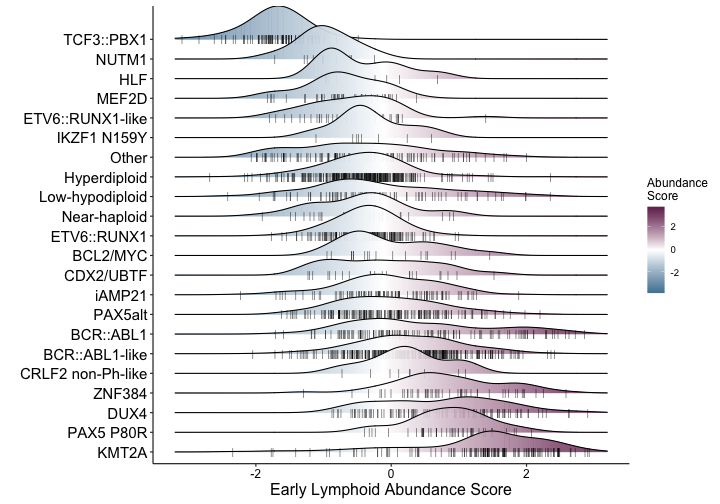

In [651]:
%%R -i dat_Lineage_obs -h 7 -w 10 --units in
library(stats)
library(ggridges)
library(ggpubr)
library(tidyverse)

name = 'Early_Lymphoid'
display = 'Early Lymphoid Abundance Score'
dat_Lineage_obs <- dat_Lineage_obs %>% 
    mutate(NMFkey = get(paste0(name))) 

cutoff = stats::median(dat_Lineage_obs$NMFkey)

dat_Lineage_obs %>% 
    dplyr::filter(Genomic_Subtype %in% names(table(dat_Lineage_obs$Genomic_Subtype)[dat_Lineage_obs$Genomic_Subtype %>% table() >= 5])) %>% 
    ggplot(aes(y = fct_reorder(Genomic_Subtype, -NMFkey), x = NMFkey, fill=stat(x))) +
    geom_density_ridges_gradient(
        jittered_points = TRUE, scale = 1.7,
        position = position_points_jitter(width = 0, height = 0), 
        point_shape = '|', point_size = 3, point_alpha = 0.6) +
    scale_fill_gradient2(midpoint=cutoff, high='#71305D', low='#5083A2', name = 'Abundance\nScore') +
    xlab(paste0(name)) +
    theme_pubr() + xlim(-3.2, 3.2) +
    ylab('') + xlab(display) + 
    theme(legend.position='right', 
          axis.text.y = element_text(size=15),
          axis.title.x = element_text(size=16)) + ggsave("BALL_MultipotencyScore_Figures/BALL2046_SubtypeRidge_Early_Lymphoid.pdf", height=5.5, width=9)

R[write to console]: Picking joint bandwidth of 0.35

R[write to console]: Picking joint bandwidth of 0.35



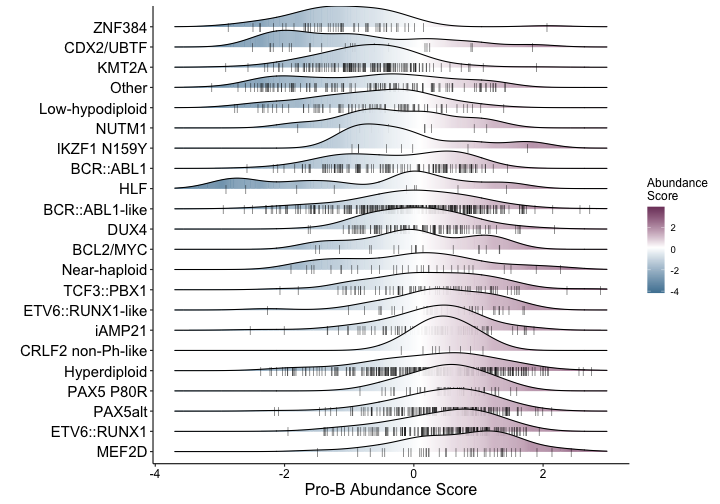

In [652]:
%%R -i dat_Lineage_obs -h 7 -w 10 --units in
library(stats)
library(ggridges)
library(ggpubr)
library(tidyverse)

name = 'Pro_B'
display = 'Pro-B Abundance Score'
dat_Lineage_obs <- dat_Lineage_obs %>% 
    mutate(NMFkey = get(paste0(name))) 

cutoff = stats::median(dat_Lineage_obs$NMFkey)

dat_Lineage_obs %>% 
    dplyr::filter(Genomic_Subtype %in% names(table(dat_Lineage_obs$Genomic_Subtype)[dat_Lineage_obs$Genomic_Subtype %>% table() >= 5])) %>% 
    ggplot(aes(y = fct_reorder(Genomic_Subtype, -NMFkey), x = NMFkey, fill=stat(x))) +
    geom_density_ridges_gradient(
        jittered_points = TRUE, scale = 1.7,
        position = position_points_jitter(width = 0, height = 0), 
        point_shape = '|', point_size = 3, point_alpha = 0.6) +
    scale_fill_gradient2(midpoint=cutoff, high='#71305D', low='#5083A2', name = 'Abundance\nScore') +
    xlab(paste0(name)) +
    theme_pubr() + xlim(-3.7, 3) +
    ylab('') + xlab(display) + 
    theme(legend.position='right', 
          axis.text.y = element_text(size=15),
          axis.title.x = element_text(size=16)) + ggsave("BALL_MultipotencyScore_Figures/BALL2046_SubtypeRidge_Pro_B.pdf", height=5.5, width=9)

R[write to console]: Picking joint bandwidth of 0.275

R[write to console]: Picking joint bandwidth of 0.275



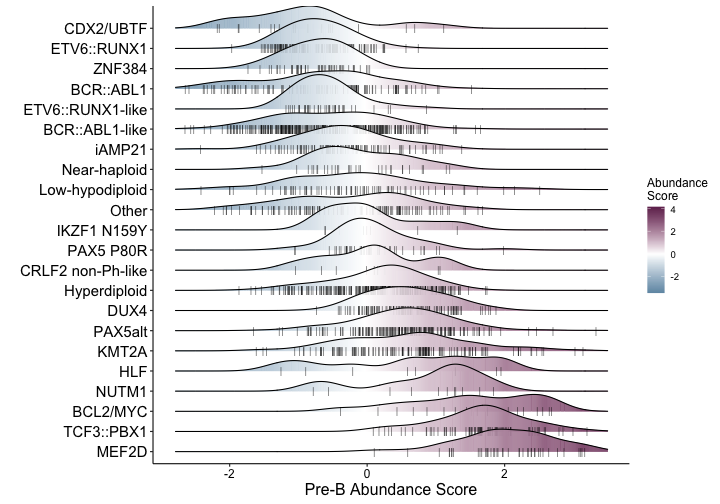

In [653]:
%%R -i dat_Lineage_obs -h 7 -w 10 --units in
library(stats)
library(ggridges)
library(ggpubr)
library(tidyverse)

name = 'Pre_B'
display = 'Pre-B Abundance Score'
dat_Lineage_obs <- dat_Lineage_obs %>% 
    mutate(NMFkey = get(paste0(name))) 

cutoff = stats::median(dat_Lineage_obs$NMFkey)

dat_Lineage_obs %>% 
    dplyr::filter(Genomic_Subtype %in% names(table(dat_Lineage_obs$Genomic_Subtype)[dat_Lineage_obs$Genomic_Subtype %>% table() >= 5])) %>% 
    ggplot(aes(y = fct_reorder(Genomic_Subtype, -NMFkey), x = NMFkey, fill=stat(x))) +
    geom_density_ridges_gradient(
        jittered_points = TRUE, scale = 1.7,
        position = position_points_jitter(width = 0, height = 0), 
        point_shape = '|', point_size = 3, point_alpha = 0.6) +
    scale_fill_gradient2(midpoint=cutoff, high='#71305D', low='#5083A2', name = 'Abundance\nScore') +
    xlab(paste0(name)) +
    theme_pubr() + xlim(-2.8, 3.5) +
    ylab('') + xlab(display) + 
    theme(legend.position='right', 
          axis.text.y = element_text(size=15),
          axis.title.x = element_text(size=16)) + ggsave("BALL_MultipotencyScore_Figures/BALL2046_SubtypeRidge_Pre_B.pdf", height=5.5, width=9)

### Association with Genomics

In [6]:
ball2046

AnnData object with n_obs × n_vars = 2046 × 11
    obs: 'Sample', 'PatientID', 'In Bulk tSNE/sc paper', 'Lineage', 'RNA_seq', 'WES', 'WGS', 'SNP6_0', 'InstituteID', 'PatientID_old', 'PatientIdAlias', 'SampleID', 'SampleID_old', 'SampleIdAlias', 'batch', 'Library', 'Institute', 'ClinicalProtocol', 'Age', 'Sex', 'WBC', 'Risk_Group', 'Karyotype', 'MRD_D29_2cat', 'MRD_D29_3cat', 'MRD_D29_5cat', 'MRD_D46_2cat', 'oscensor', 'ostime', 'OS_priority', 'efscensor', 'efstime', 'EFS_priority', 'First event', 'Relapse (yes/no)', 'Site of relapse', 'anyRelcensor', 'anyReltime', 'Testicular Involvement', 'Testes Site of Relapse', 'CNS Status at Diagnosis', 'CNS Site of Relapse', 'tSNE_subgroup', 'Down', 'Dicentric', 'CRLF2r', 'Primary_subtype_old', 'Secondary_subtype_old', 'changed_Subtype', 'Comments', 'Genomic_Subtype', 'GenomicRisk_pediatric', 'GenomicRisk_adult', 'Fusion', 'Subgroup', 'Transcript BCR::ABL1', 'PC1'

In [7]:
ball2046_surv = ball2046.obs.filter(regex='^os|^efs|Risk_Group|AgeCa|Institute$|Genomic_Subtype|Fusion').join(ball2046.to_df())
ball2046_surv

Institute    Risk_Group  oscensor  ostime  efscensor  efstime  \
Patient                                                                         
SJBALL030036_D1   St Jude  Childhood SR       0.0  1141.0        1.0    727.0   
SJBALL030040_D1   St Jude  Childhood SR       0.0  1482.0        0.0   1435.0   
SJBALL030059_D1   St Jude           AYA       0.0  1494.0        0.0   1445.0   
SJBALL030072_D1   St Jude  Childhood SR       0.0  1508.0        0.0   1464.0   
SJBALL030090_D1   St Jude  Childhood SR       0.0  1468.0        0.0   1426.0   
...                   ...           ...       ...     ...        ...      ...   
SJBALL031128_D1   St Jude           NaN       1.0  1073.0        0.0      0.0   
SJBALL031144_D1   St Jude           NaN       0.0  1182.0        0.0      0.0   
SJBALL031168_D1   St Jude           NaN       0.0  1205.0        0.0      0.0   
SJBALL031267_D1   St Jude           NaN       0.0  1095.0        0.0      0.0   
SJBALL031281_D1   St Jude           NaN       0.0  1220.0        0.0      0.0   

                Genomic_Subtype       Fusion  Multipotency_Score   HSC_MPP  \
Patient                                                                      
SJBALL030036_D1  BCR::ABL1-like    IGH-CRLF2           -0.650901 -1.860952   
SJBALL030040_D1    Hyperdiploid     NoFusion           -1.173737 -0.530932   
SJBALL030059_D1           KMT2A   AFF1-KMT2A            0.310770 -1.106204   
SJBALL030072_D1  BCR::ABL1-like  P2RY8-CRLF2           -0.704252 -1.898427   
SJBALL030090_D1    Hyperdiploid     NoFusion           -0.873461 -0.921336   
...                         ...          ...                 ...       ...   
SJBALL031128_D1       BCR::ABL1     BCR-ABL1            2.079928  0.613443   
SJBALL031144_D1    Hyperdiploid     NoFusion           -0.263436 -1.385490   
SJBALL031168_D1    Hyperdiploid     NoFusion           -0.415112  0.934349   
SJBALL031267_D1  BCR::ABL1-like  EBF1-PDGFRB            0.186993  0.009535   
SJBALL031281_D1            DUX4     IGH-DUX4            0.722558  0.641936   

                 Myeloid_Prog   Pre_pDC  Early_Lymphoid     Pro_B     Pre_B  \
Patient                                                                       
SJBALL030036_D1     -0.374011 -1.099284        0.091847  0.888790 -1.148544   
SJBALL030040_D1     -0.565015  0.644559       -0.114353  1.771480  0.846471   
SJBALL030059_D1      1.431375  0.984563        1.545509 -0.306696 -0.024594   
SJBALL030072_D1     -0.771614 -1.306183        0.639066  1.148226 -0.860917   
SJBALL030090_D1     -0.760483  1.160679       -0.235776  0.561812  0.536238   
...                       ...       ...             ...       ...       ...   
SJBALL031128_D1      2.202049  1.042439        2.108982 -0.894439 -1.836389   
SJBALL031144_D1     -1.247599 -0.790197       -0.815030 -0.577615 -1.356832   
SJBALL031168_D1     -0.834740  1.803261       -0.196214  1.223598  0.903113   
SJBALL031267_D1     -0.868767 -0.758284       -0.189230 -0.191334 -0.621177   
SJBALL031281_D1      0.886671 -0.709486       -0.003578 -0.924807 -0.189674   

                 Mature_B      T_NK  Monocyte  Erythroid  
Patient                                                   
SJBALL030036_D1 -1.923114  0.852538 -0.200462   0.954593  
SJBALL030040_D1  0.531021 -0.169395 -0.546178  -0.111596  
SJBALL030059_D1 -3.038016 -1.981852  0.464842   0.068128  
SJBALL030072_D1 -1.856320 -0.882372  0.908648   1.268102  
SJBALL030090_D1  0.355429 -0.656105  0.620778   1.140011  
...                   ...       ...       ...        ...  
SJBALL031128_D1 -0.817439 -1.816138  1.869336  -1.751711  
SJBALL031144_D1  0.261091  0.806779  0.384702   1.595003  
SJBALL031168_D1  0.480196 -0.864881 -1.221417   0.085051  
SJBALL031267_D1  0.150438  0.106598 -0.015817   0.960584  
SJBALL031281_D1  1.298866  0.803529  0.718239  -1.379748  

[2046 rows x 19 columns]

In [530]:
%%R -i ball2046_surv --units in -h 15 -w 8

library(survival)
library(survminer)
library(glmnet)
library(RColorBrewer)
library(corrplot)

ball2046_surv <- ball2046_surv %>% dplyr::rename(subtype = Genomic_Subtype, Myeloid_Progenitor = Myeloid_Prog)
institute_order = append(c('St Jude'), ball2046_surv %>% filter(Institute != 'St Jude') %>% mutate(Institute = Institute %>% as.character()) %>% pull(Institute) %>% table() %>% names())
subtype_order = append(c('Other'), ball2046_surv %>% filter(subtype != 'Other') %>% mutate(subtype = subtype %>% as.character()) %>% pull(subtype) %>% table() %>% names())

bulk2046_input <- ball2046_surv %>% filter(subtype != 'NA', Institute != 'NA') %>% 
          mutate(subtype = factor(subtype, levels = subtype_order), 
                 Institute = factor(Institute, levels = institute_order),
                 Risk_Group = factor(Risk_Group, levels = c('Childhood SR', 'Childhood HR', 'AYA', 'Adult')))
    
lineage_subtype <- data.frame()

for(lineage in c('Multipotency_Score', 'HSC_MPP', 'Myeloid_Progenitor', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B')){
                 #'Mature_B', 'T_NK', 'Monocyte', 'Erythroid', 'PC1_Committed_vs_Early')){
    # fit GLM with subtype 
    lm <- glm(get(lineage) ~ subtype, data = bulk2046_input)

    lineage_subtype <- lineage_subtype %>% bind_rows(
        summary(lm, test = 'LRT')$coefficients %>% data.frame() %>% 
            dplyr::rename(estimate = 'Estimate', stder = 'Std..Error', statistic = 't.value', pvalue = 'Pr...t..') %>%
            rownames_to_column('category') %>% mutate(Lineage = lineage, multivariable = FALSE)
    )
        
    # fit GLM with subtype, set institute as strata
    lm <- glm(get(lineage) ~ subtype + strata(Institute), data = bulk2046_input)

        lineage_subtype <- lineage_subtype %>% bind_rows(
            summary(lm, test = 'LRT')$coefficients %>% data.frame() %>% 
                dplyr::rename(estimate = 'Estimate', stder = 'Std..Error', statistic = 't.value', pvalue = 'Pr...t..') %>%
                rownames_to_column('category') %>% mutate(Lineage = lineage, multivariable = TRUE)
        )
}

lineage_subtype <- lineage_subtype %>% filter(category %>% str_detect('subtype')) %>% mutate(category = category %>% str_replace('subtype','')) %>% select(Lineage, category, multivariable, statistic, pvalue)
lineage_subtype$qvalue <- p.adjust(lineage_subtype$pvalue, method='fdr')

lineage_subtype <- lineage_subtype %>% mutate(Lineage = Lineage %>% str_replace('_','-') %>% str_replace('HSC-MPP', 'HSC/MPP') %>% 
                                              str_replace('Early-', 'Early ') %>% str_replace('Myeloid-','Myeloid ') %>% str_replace('-Score', ' Score'))

subtype_PCs <- lineage_subtype %>% filter(multivariable == FALSE) %>%
    filter(Lineage %in% c('Multipotency Score', 'HSC/MPP', 'Myeloid Progenitor', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B')) %>% #'Multipotency Score', 
    #filter(pvalue < 0.05) %>% 
    pivot_wider(id_cols = category, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>% column_to_rownames('category') %>% data.matrix() %>% t() %>% prcomp()
subtype_levels_ordered <- subtype_PCs$rotation %>% data.frame() %>% arrange(PC1) %>% rownames()

colors <- colorRampPalette(brewer.pal(11, 'PRGn'))
palette_continuous <- colors(100)
    
    
pvals <- lineage_subtype %>% 
    filter(multivariable == FALSE) %>%
    pivot_wider(id_cols = category, names_from = Lineage, values_from = qvalue) %>% 
    mutate(category = factor(category, levels = subtype_levels_ordered)) %>%
    arrange(category) %>% drop_na() %>%
    column_to_rownames('category') %>% 
    data.matrix() 


pdf(file = 'BALL_MultipotencyScore_Figures/BALL2046_SubtypeDotplot_BDevonly.pdf', width = 7.5, height = 14, useDingbats = FALSE)

lineage_subtype %>% 
    filter(multivariable == FALSE) %>%
    pivot_wider(id_cols = category, names_from = Lineage, values_from = statistic) %>% 
    mutate(category = factor(category, levels = subtype_levels_ordered)) %>%
    arrange(category) %>% drop_na() %>%
    column_to_rownames('category') %>% 
    data.matrix() %>% 
    corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'blank', 
            col=palette_continuous, cl.ratio=0.4, cl.cex=1)
    
#segments(c(0.5,3.5,5.5,8.5), rep(0.5,4), 
#    c(0.5,3.5,5.5,8.5), rep(5.5,4), lwd=3)
segments(c(0.5, 0.5), c(7.5, 0.5), c(5.5, 5.5), c(7.5,0.5), lwd=3)


dev.off()


quartz_off_screen 
                3 


In [531]:
%%R

data %>% dim()

[1] 3 7


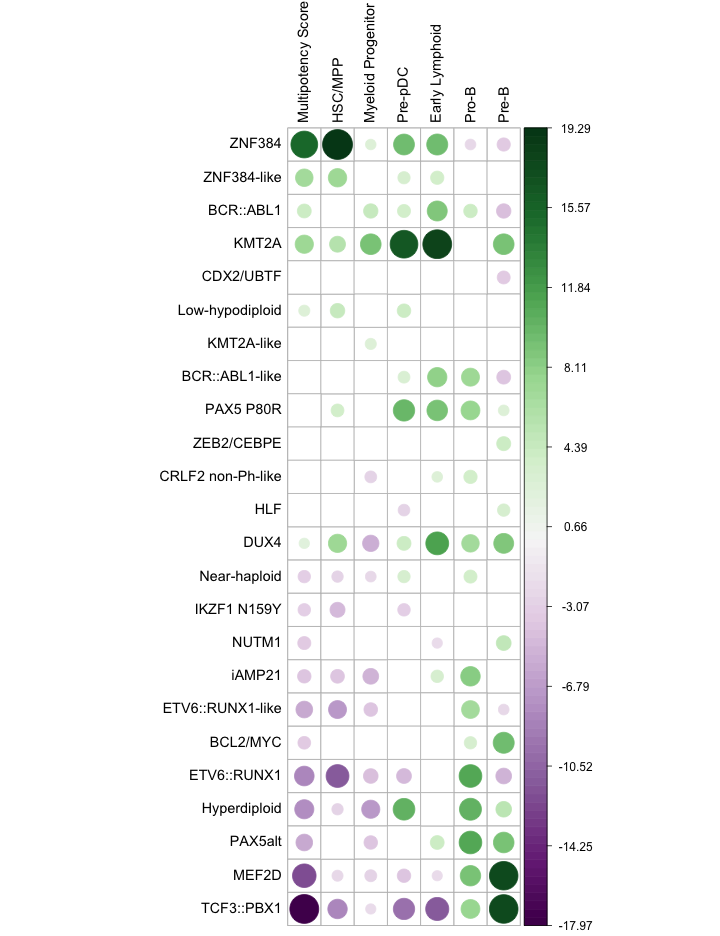

In [532]:
%%R -i ball2046_surv --units in -h 13 -w 10

lineage_subtype %>% 
    filter(multivariable == FALSE) %>%
    pivot_wider(id_cols = category, names_from = Lineage, values_from = statistic) %>% 
    mutate(category = factor(category, levels = subtype_levels_ordered)) %>%
    arrange(category) %>% drop_na() %>%
    column_to_rownames('category') %>% 
    data.matrix() %>% 
    corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'blank', 
            col=palette_continuous, cl.ratio=0.4, cl.cex=1)


    

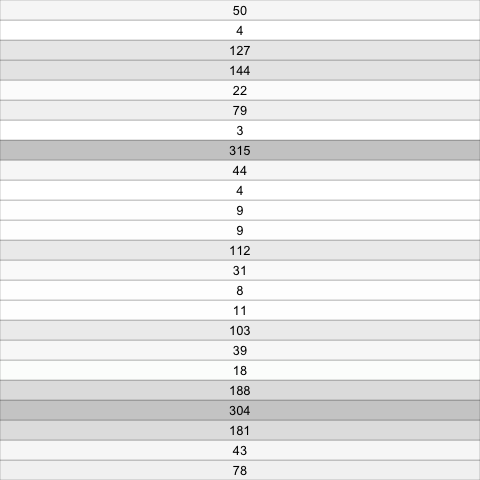

In [533]:
%%R

p <- data.frame((bulk2046_input %>% pull(subtype) %>% table() %>% sort(decreasing=T))[rev(subtype_levels_ordered)]) %>% 
    dplyr::rename(subtype = '.') %>% mutate(lol = 'lol') %>%
    ggplot(aes(x = lol, y = subtype, fill = Freq)) + 
    geom_tile(color = "black") + geom_text(aes(label = Freq), size = 4.5) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
p
ggsave(file = 'BALL_MultipotencyScore_Figures/BALL2046_SubtypeDotplot_BDevonly_SampleNumbers.pdf', width = 0.6, height = 13)
p

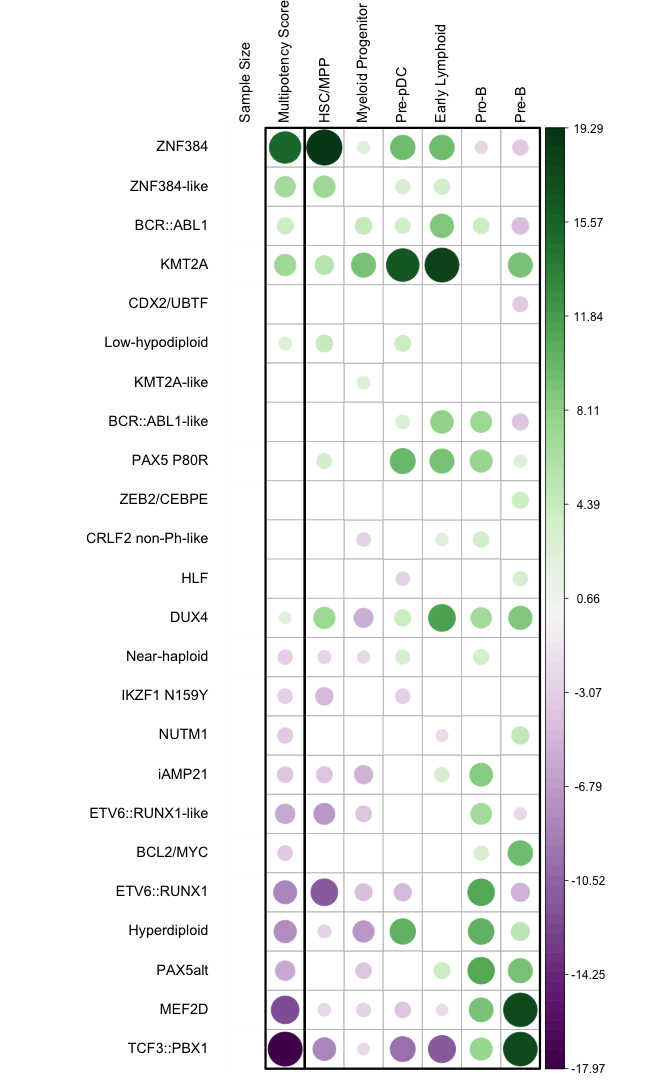

In [534]:
%%R --units in -h 15 -w 9

data <- lineage_subtype %>% 
    filter(multivariable == FALSE) %>% mutate(category = paste0(category, '   ')) %>% 
    pivot_wider(id_cols = category, names_from = Lineage, values_from = statistic) %>% 
    mutate(category = factor(category, levels = paste0(subtype_levels_ordered, '   '))) %>%
    arrange(category) %>% drop_na() %>%
    column_to_rownames('category') %>% 
    data.matrix() 
    
# Moderate Data
data_mod <- data[,1]  # Start with the first column
data_mod <- cbind(NA, data_mod, data[,-1])  # Add a column of NAs and the rest of the data
# Update column names to reflect the change
colnames(data_mod) <- c("Sample Size", colnames(data)[1], colnames(data)[-1])

# Moderate pvalues 
pvals_mod <- pvals[,1]
pvals_mod <- cbind(1, pvals_mod, pvals[,-1])  # Add a column of NAs and the rest of the data
colnames(pvals_mod) <- c("Sample Size", colnames(pvals)[1], colnames(pvals)[-1])

pdf(file = 'BALL_MultipotencyScore_Figures/BALL2046_SubtypeDotplot_BDevonly_reformatted.pdf', width = 7.5, height = 14, useDingbats=FALSE)

data_mod %>% 
    corrplot(method = "circle", is.corr = FALSE, 
             tl.cex=1.2, tl.col = 'black', 
             p.mat = pvals_mod, sig.level = 0.05, insig = 'blank', 
             col=palette_continuous, cl.ratio=0.25, cl.cex=1
)
    
# Assuming the space column is the 2nd column in the modified matrix
for (i in 0:nrow(data_mod)) {
  rect(0.5, i-0.5, 1.5, i+0.5, border = "white", lwd = 3.5, col = NA)
}
## Add a rectangle around the first column manually
rect(xleft = 1.5, ybottom = 0.5, xright = 2.5, ytop = dim(data)[1]+0.5, 
     border = "black", lwd = 3)
rect(xleft = 2.5, ybottom = 0.5, xright = 8.5, ytop = dim(data)[1]+0.5, 
     border = "black", lwd = 3)

dev.off()


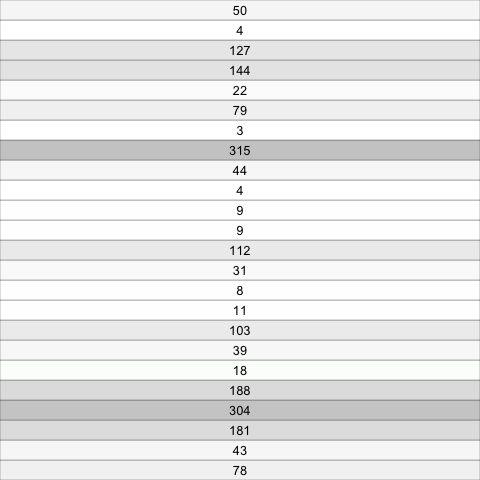

In [368]:
%%R

p <- data.frame((bulk2046_input %>% pull(subtype) %>% table() %>% sort(decreasing=T))[rev(subtype_levels_ordered)]) %>% 
    dplyr::rename(subtype = '.') %>% mutate(lol = 'lol') %>%
    ggplot(aes(x = lol, y = subtype, fill = Freq)) + 
    geom_tile(color = "grey20", size=0.15) + geom_text(aes(label = Freq), size = 4.5) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
p
ggsave(file = 'BALL_MultipotencyScore_Figures/BALL2046_SubtypeDotplot_BDevonly_SampleNumbers.pdf', width = 0.58, height = 13)
p

## Fusion associations

In [8]:
ball2046_surv['Fusion'].value_counts()#[1:50]

NoFusion                716
ETV6-RUNX1              161
BCR-ABL1                115
IGH-DUX4                 92
IGH-CRLF2                86
                       ... 
HECTD4-PPP1CC             1
GGNBP2-MYO19              1
ARHGEF7-SON               1
IKZF1-ZPBP;CD40-XPO5      1
ETV6-LHX6                 1
Name: Fusion, Length: 357, dtype: int64

In [9]:
# ball2046_surv['Fusion'] = np.where(ball2046_surv['Fusion'].str.contains('IGH-CRLF2'), 'IGH-CRLF2', 
#                                    np.where(ball2046_surv['Fusion'].str.contains('IGH-DUX4'), 'IGH-DUX4', ball2046_surv['Fusion']))

In [10]:
%%R -i ball2046_surv --units in -h 15 -w 10

ball2046_surv <- ball2046_surv %>% dplyr::rename(Myeloid_Progenitor = Myeloid_Prog) %>% mutate(Fusion = Fusion %>% str_replace_all('\\(.*','') %>% str_replace_all('-','::'))
# Demultiplex multiple fusions
ball2046_surv <- ball2046_surv %>% separate_rows(Fusion, sep=';')
# clean up the rest
institute_order = append(c('St Jude'), ball2046_surv %>% filter(Institute != 'St Jude') %>% mutate(Institute = Institute %>% as.character()) %>% pull(Institute) %>% table() %>% names())
Fusion_order = table(ball2046_surv %>% pull(Fusion))[table(ball2046_surv %>% pull(Fusion)) >= 3] %>% names()
Fusion_order = c('NoFusion', Fusion_order[Fusion_order != 'NoFusion']) # set NoFusion as the base

bulk2046_input <- ball2046_surv %>% filter(Fusion != 'NA', Institute != 'NA') %>% 
          mutate(Fusion = factor(Fusion, levels = Fusion_order), 
                 Institute = factor(Institute, levels = institute_order),
                 Risk_Group = factor(Risk_Group, levels = c('Childhood SR', 'Childhood HR', 'AYA', 'Adult'))) 

bulk2046_input %>% pull(Fusion) %>% table() %>% sort(decreasing=T)

R[write to console]: Error in ball2046_surv %>% dplyr::rename(Myeloid_Progenitor = Myeloid_Prog) %>%  : 
  could not find function "%>%"




Error in ball2046_surv %>% dplyr::rename(Myeloid_Progenitor = Myeloid_Prog) %>%  : 
  could not find function "%>%"


In [536]:
%%R --units in -h 15 -w 10

# Now run fusion associations
lineage_fusion <- data.frame()

for(lineage in c('Multipotency_Score', 'HSC_MPP', 'Myeloid_Progenitor', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B')){
                 #'Mature_B', 'T_NK', 'Monocyte', 'Erythroid', 'PC1_Committed_vs_Early')){
    # fit GLM with subtype and institute as strata
    lm <- glm(get(lineage) ~ Fusion, data = bulk2046_input)

    lineage_fusion <- lineage_fusion %>% bind_rows(
        summary(lm, test = 'LRT')$coefficients %>% data.frame() %>% 
            dplyr::rename(estimate = 'Estimate', stder = 'Std..Error', statistic = 't.value', pvalue = 'Pr...t..') %>%
            rownames_to_column('category') %>% mutate(Lineage = lineage, multivariable = FALSE)
    )
        
    # fit GLM with institute and risk group as strata
    lm <- glm(get(lineage) ~ Fusion + strata(Institute), data = bulk2046_input)

        lineage_fusion <- lineage_fusion %>% bind_rows(
            summary(lm, test = 'LRT')$coefficients %>% data.frame() %>% 
                dplyr::rename(estimate = 'Estimate', stder = 'Std..Error', statistic = 't.value', pvalue = 'Pr...t..') %>%
                rownames_to_column('category') %>% mutate(Lineage = lineage, multivariable = TRUE)
        )
}


lineage_fusion <- lineage_fusion %>% filter(category %>% str_detect('Fusion')) %>% mutate(category = category %>% str_replace('Fusion','')) %>% select(Lineage, category, multivariable, statistic, pvalue)
lineage_fusion$qvalue <- p.adjust(lineage_fusion$pvalue, method='fdr')
# keep significant categories
sigcategories <- lineage_fusion %>% filter(qvalue < 0.05) %>% pull(category) %>% unique()
lineage_fusion <- lineage_fusion %>% filter(category %in% sigcategories)

lineage_fusion <- lineage_fusion %>% mutate(Lineage = Lineage %>% str_replace('_','-') %>% str_replace('HSC-MPP', 'HSC/MPP') %>% str_replace('Early-', 'Early ') %>% 
                                            str_replace('Myeloid-','Myeloid ') %>% str_replace('-Score',' Score'))

subtype_PCs <- lineage_fusion %>% filter(multivariable == FALSE) %>%
    filter(Lineage %in% c('Multipotency_Score', 'HSC/MPP', 'Myeloid Progenitor', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B')) %>%
    #filter(qvalue < 0.05) %>% 
    pivot_wider(id_cols = category, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>% column_to_rownames('category') %>% data.matrix() %>% t() %>% prcomp()
    
subtype_levels_ordered <- subtype_PCs$rotation %>% data.frame() %>% arrange(PC1) %>% rownames()

colors <- colorRampPalette(brewer.pal(15, 'PRGn'))
palette_continuous <- colors(100)
    
pvals <- lineage_fusion %>% 
    filter(multivariable == FALSE) %>%
    pivot_wider(id_cols = category, names_from = Lineage, values_from = qvalue) %>% 
    mutate(category = factor(category, levels = subtype_levels_ordered)) %>%
    filter(category != 'NA') %>%
    arrange(category) %>%
    column_to_rownames('category') %>% 
    data.matrix()

pdf(file = 'BALL_MultipotencyScore_Figures/BALL2046_FusionDotplot_min3samps_BDevonly.pdf', width = 7.5, height = 17)

print(lineage_fusion %>% 
    filter(multivariable == FALSE) %>%
    pivot_wider(id_cols = category, names_from = Lineage, values_from = statistic) %>% 
    mutate(category = factor(category, levels = subtype_levels_ordered)) %>%
    filter(category != 'NA') %>%
    arrange(category) %>%
    column_to_rownames('category') %>% 
    data.matrix() %>% 
    corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'blank', 
            col=palette_continuous, cl.ratio=0.4, cl.cex=0.9))

dev.off()

                Multipotency Score     HSC/MPP Myeloid Progenitor      Pre-pDC
KMT2A::AFF1            0.658671013  0.33133135        0.811074773  0.760403167
EP300::ZNF384          0.659473535  0.73861636        0.146746970  0.252512386
BCR::ABL1              0.433811744  0.14585331        0.486597668 -0.052988705
TCF3::ZNF384           0.458402718  0.46286164        0.210967327  0.062915362
IGH::EPOR              0.225802504  0.04028540        0.185564136 -0.017205073
TAF15::ZNF384          0.264623615  0.28105206        0.129635625  0.066787187
IGH::CRLF2             0.153611602 -0.01841067        0.020506159 -0.018234033
NUP214::ABL1           0.173444009  0.06063131        0.203950209  0.037223858
UBTF::ATXN7L3          0.165967213 -0.05164776        0.156006844 -0.182100264
KMT2A::MLLT1           0.210681336  0.10408408        0.198924451  0.122626801
RCSD1::ABL2            0.107779748 -0.01815074        0.075010305 -0.079420142
KMT2A::EPS15           0.139413534  0.12161819      

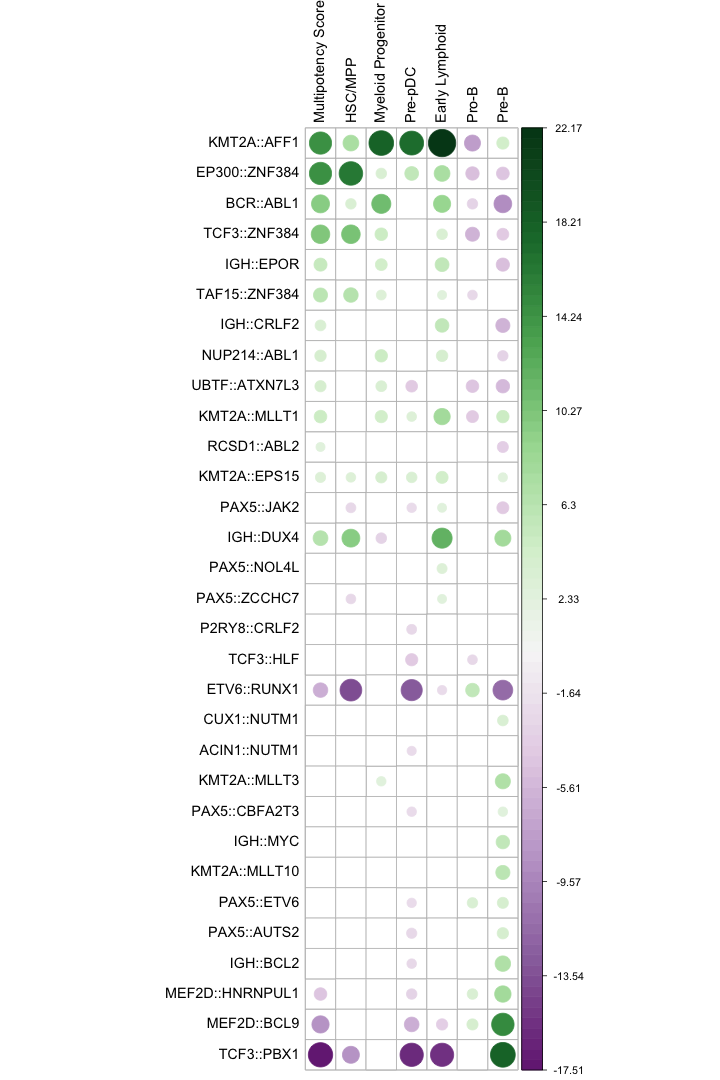

In [537]:
%%R --units in -h 15 -w 10

lineage_fusion %>% 
    filter(multivariable == FALSE) %>%
    pivot_wider(id_cols = category, names_from = Lineage, values_from = statistic) %>% 
    mutate(category = factor(category, levels = subtype_levels_ordered)) %>%
    filter(category != 'NA') %>%
    arrange(category) %>%
    column_to_rownames('category') %>% 
    data.matrix() %>% 
    corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'blank', 
            col=palette_continuous, cl.ratio=0.4, cl.cex=0.9)

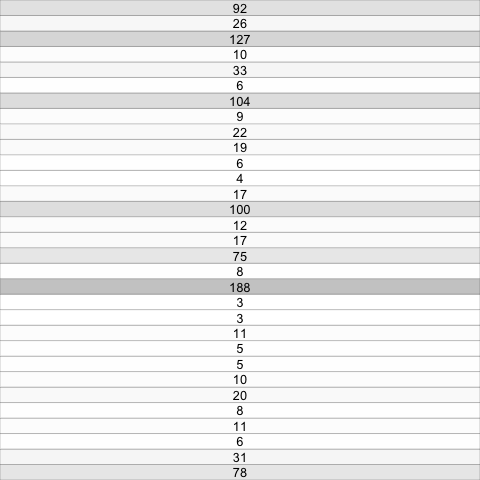

In [538]:
%%R

p <- data.frame((bulk2046_input %>% pull(Fusion) %>% table() %>% sort(decreasing=T))[rev(subtype_levels_ordered)]) %>% 
    dplyr::rename(Fusion = '.') %>% mutate(lol = 'lol') %>%
    ggplot(aes(x = lol, y = Fusion, fill = Freq)) + 
    geom_tile(color = "black") + geom_text(aes(label = Freq), size = 4.5) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
p
ggsave(file = 'BALL_MultipotencyScore_Figures/BALL2046_FusionDotplot_min3samps_BDevonly_SampleNumbers.pdf', width = 0.6, height = 17)
p

In [540]:
%%R --units in -h 15 -w 9

data <- lineage_fusion %>% 
    filter(multivariable == FALSE) %>% mutate(category = paste0(category, '   ')) %>% 
    pivot_wider(id_cols = category, names_from = Lineage, values_from = statistic) %>% 
    mutate(category = factor(category, levels = paste0(subtype_levels_ordered, '   '))) %>%
    filter(category != 'NA') %>%
    arrange(category) %>%
    column_to_rownames('category') %>% 
    data.matrix() 
    
# Moderate Data
data_mod <- data[,1]  # Start with the first column
data_mod <- cbind(NA, data_mod, data[,-1])  # Add a column of NAs and the rest of the data
# Update column names to reflect the change
colnames(data_mod) <- c("Sample Size", colnames(data)[1], colnames(data)[-1])

# Moderate pvalues 
pvals_mod <- pvals[,1]
pvals_mod <- cbind(1, pvals_mod, pvals[,-1])  # Add a column of NAs and the rest of the data
colnames(pvals_mod) <- c("Sample Size", colnames(pvals)[1], colnames(pvals)[-1])

pdf(file = 'BALL_MultipotencyScore_Figures/BALL2046_FusionDotplot_min3samps_BDevonly_reformatted.pdf', width = 7.5, height = 17, useDingbats=FALSE)

data_mod %>% 
    corrplot(method = "circle", is.corr = FALSE, 
             tl.cex=1.2, tl.col = 'black', 
             p.mat = pvals_mod, sig.level = 0.05, insig = 'blank', 
             col=palette_continuous, cl.ratio=0.25, cl.cex=1
)
    
# Assuming the space column is the 2nd column in the modified matrix
for (i in 0:nrow(data_mod)) {
  rect(0.5, i-0.5, 1.5, i+0.5, border = "white", lwd = 3.5, col = NA)
}
## Add a rectangle around the first column manually
rect(xleft = 1.5, ybottom = 0.5, xright = 2.5, ytop = dim(data)[1]+0.5, 
     border = "black", lwd = 3)
rect(xleft = 2.5, ybottom = 0.5, xright = 8.5, ytop = dim(data)[1]+0.5, 
     border = "black", lwd = 3)

dev.off()


quartz_off_screen 
                3 


### Mutations

In [11]:
ball2046_mutations = pd.read_csv('../survival_analysis_old/BALL2046_GenomicAnno_Updated.csv').set_index('PatientID').iloc[:,33:110].dropna().astype('int')#.replace(0, 'wt').replace(1, 'mut').astype('category')
ball2046_mutations.columns = ball2046_mutations.columns + '_mut'
ball2046_mutations

ARID2_mut  ARPP21_mut  ATF7IP_mut  BTG1_mut  BTLA_mut  \
PatientID                                                               
SJBALL082               0           0           0         0         0   
SJBALL209               0           0           0         0         0   
SJBALL205               0           0           0         0         0   
SJBALL016287            0           0           0         0         0   
SJBALL022051            0           0           0         0         0   
...                   ...         ...         ...       ...       ...   
SJCOGALL010225          1           0           0         0         0   
SJBALL020710            0           0           0         0         0   
SJBALL020732            0           0           0         0         0   
SJBALL020801            0           0           0         0         0   
SJCOGALL010912          0           0           0         1         0   

                CD200_mut  CDKN1B_mut  CDKN2A_mut  CDKN2B_mut  CHD2_mut  ...  \
PatientID                                                                ...   
SJBALL082               0           0           0           0         0  ...   
SJBALL209               0           0           0           0         0  ...   
SJBALL205               0           0           0           0         0  ...   
SJBALL016287            0           0           0           0         0  ...   
SJBALL022051            0           0           0           0         0  ...   
...                   ...         ...         ...         ...       ...  ...   
SJCOGALL010225          0           0           0           0         0  ...   
SJBALL020710            0           0           0           0         0  ...   
SJBALL020732            0           0           1           1         0  ...   
SJBALL020801            0           0           0           0         0  ...   
SJCOGALL010912          0           0           1           1         0  ...   

                TOX_mut  TP53_mut  TSC22D1_mut  UBA2_mut  UBE2I_mut  \
PatientID                                                             
SJBALL082             0         0            0         0          0   
SJBALL209             0         0            0         0          0   
SJBALL205             0         0            0         0          0   
SJBALL016287          0         0            0         0          0   
SJBALL022051          0         0            0         0          0   
...                 ...       ...          ...       ...        ...   
SJCOGALL010225        0         0            0         1          0   
SJBALL020710          0         0            0         0          0   
SJBALL020732          0         0            0         0          0   
SJBALL020801          0         0            0         0          0   
SJCOGALL010912        1         0            0         1          0   

                UHRF1_mut  VPREB1_mut  XBP1_mut  ZFP36L2_mut  ZNF260_mut  
PatientID                                                                 
SJBALL082               0           0         0            0           0  
SJBALL209               0           0         0            0           0  
SJBALL205               0           0         0            0           0  
SJBALL016287            0           0         0            0           0  
SJBALL022051            0           0         0            0           0  
...                   ...         ...       ...          ...         ...  
SJCOGALL010225          0           1         0            0           0  
SJBALL020710            0           0         0            0           0  
SJBALL020732            0           0         0            0           0  
SJBALL020801            0           0         0            0           0  
SJCOGALL010912          0           0         0            0           1  

[672 rows x 77 columns]

In [12]:
ball2046_mutations_obs = ball2046.obs.filter(regex='Institute|Genomic_Subtype|Risk_Group|PatientID|Fusion').join(ball2046.to_df()).reset_index().set_index('PatientID').join(ball2046_mutations).dropna()
ball2046_mutations_obs

Patient InstituteID   PatientID_old Institute  \
PatientID                                                                 
SJETV022010        SJETV022010_D1  TB-08-4276     SJETV022010   St Jude   
SJHYPER022013    SJHYPER022013_D1  TB-09-0405   SJHYPER022013   St Jude   
SJETV021937        SJETV021937_D1  TB-09-0142     SJETV021937   St Jude   
SJBALL021924      SJBALL021924_D1  TB-08-0052    SJBALL021924   St Jude   
SJHYPER022044    SJHYPER022044_D1  TB-08-0069   SJHYPER022044   St Jude   
...                           ...         ...             ...       ...   
SJCOGALL010871  SJCOGALL010871_D2      PASHUI  SJCOGALL010871       COG   
SJCOGALL010237  SJCOGALL010237_D3      PASFXA  SJCOGALL010237       COG   
SJCOGALL010238  SJCOGALL010238_D3      PASKAY  SJCOGALL010238       COG   
SJCOGALL010884  SJCOGALL010884_D2      PATTEE  SJCOGALL010884       COG   
SJHYPER146           SJHYPER146_D  TB_05-1660      SJHYPER146   St Jude   

                  Risk_Group  Genomic_Subtype      Fusion  Multipotency_Score  \
PatientID                                                                       
SJETV022010     Childhood SR      ETV6::RUNX1  ETV6-RUNX1           -1.309064   
SJHYPER022013   Childhood SR     Hyperdiploid    NoFusion           -0.916612   
SJETV021937     Childhood SR      ETV6::RUNX1  ETV6-RUNX1           -1.476071   
SJBALL021924    Childhood HR            Other    NoFusion           -0.563693   
SJHYPER022044   Childhood HR  Low-hypodiploid    NoFusion           -1.322469   
...                      ...              ...         ...                 ...   
SJCOGALL010871  Childhood SR           iAMP21    NoFusion           -0.673987   
SJCOGALL010237  Childhood HR       TCF3::PBX1   TCF3-PBX1           -2.083973   
SJCOGALL010238  Childhood SR       TCF3::PBX1   TCF3-PBX1           -1.038345   
SJCOGALL010884  Childhood HR            MEF2D  MEF2D-BCL9           -0.540349   
SJHYPER146      Childhood SR     Hyperdiploid    NoFusion           -0.535944   

                 HSC_MPP  Myeloid_Prog  ...  TOX_mut  TP53_mut  TSC22D1_mut  \
PatientID                               ...                                   
SJETV022010    -1.256876     -0.935276  ...      0.0       0.0          0.0   
SJHYPER022013  -0.681915     -0.852654  ...      0.0       0.0          0.0   
SJETV021937    -1.336783     -0.528754  ...      0.0       0.0          0.0   
SJBALL021924    0.067754      0.036882  ...      0.0       0.0          0.0   
SJHYPER022044  -0.565919     -1.760898  ...      0.0       1.0          0.0   
...                  ...           ...  ...      ...       ...          ...   
SJCOGALL010871 -0.514001     -0.086539  ...      0.0       0.0          0.0   
SJCOGALL010237 -1.358776      0.988976  ...      0.0       1.0          0.0   
SJCOGALL010238 -0.283052      0.937396  ...      0.0       0.0          0.0   
SJCOGALL010884  0.807217      0.390772  ...      0.0       0.0          0.0   
SJHYPER146      0.854179     -0.780325  ...      0.0       0.0          0.0   

                UBA2_mut  UBE2I_mut  UHRF1_mut  VPREB1_mut  XBP1_mut  \
PatientID                                                              
SJETV022010          0.0        0.0        0.0         1.0       0.0   
SJHYPER022013        0.0        0.0        0.0         0.0       0.0   
SJETV021937          0.0        0.0        0.0         0.0       0.0   
SJBALL021924         0.0        0.0        0.0         0.0       0.0   
SJHYPER022044        0.0        0.0        0.0         0.0       0.0   
...                  ...        ...        ...         ...       ...   
SJCOGALL010871       0.0        0.0        0.0         0.0       0.0   
SJCOGALL010237       0.0        0.0        0.0         0.0       0.0   
SJCOGALL010238       0.0        0.0        0.0         0.0       0.0   
SJCOGALL010884       0.0        0.0        0.0         0.0       0.0   
SJHYPER146           0.0        0.0        0.0         0.0       0.0   

                ZFP36L2_mut  ZN

In [13]:
ball2046_mutations_obs['Institute'].value_counts()

St Jude    356
COG        316
Name: Institute, dtype: int64

In [14]:
%%R -i ball2046_mutations_obs --units in -h 12 -w 10

ball2046_mutations_obs <- ball2046_mutations_obs %>% dplyr::rename(Myeloid_Progenitor = Myeloid_Prog)
institute_order = append(c('St Jude'), ball2046_mutations_obs %>% filter(Institute != 'St Jude') %>% mutate(Institute = Institute %>% as.character()) %>% pull(Institute) %>% table() %>% names())
subtype_order = append(c('Other'), ball2046_mutations_obs %>% filter(Genomic_Subtype != 'Other') %>% mutate(Genomic_Subtype = Genomic_Subtype %>% as.character()) %>% pull(Genomic_Subtype) %>% table() %>% names())

bulk2046_input <- ball2046_mutations_obs %>% filter(Genomic_Subtype != 'NA', Institute != 'NA') %>% 
          mutate(Genomic_Subtype = factor(Genomic_Subtype, levels = subtype_order), 
                 Institute = factor(Institute, levels = institute_order),
                 Risk_Group = factor(Risk_Group, levels = c('Childhood SR', 'Childhood HR', 'AYA', 'Adult')))
    

lineage_mutation <- data.frame()

for(lineage in c('Multipotency_Score', 'HSC_MPP', 'Myeloid_Progenitor', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B')){#, 'T_NK', 'Monocyte', 'Erythroid')){
    
    for(mutation in colnames(ball2046_mutations_obs)[colnames(ball2046_mutations_obs) %>% str_detect('mut')]){
        
        # fit GLM with subtype and institute as strata
        lm <- glm(get(lineage) ~ get(mutation), data = bulk2046_input) #

        lineage_mutation <- lineage_mutation %>% bind_rows(
            summary(lm, test = 'LRT')$coefficients %>% data.frame() %>% 
                dplyr::rename(estimate = 'Estimate', stder = 'Std..Error', statistic = 't.value', pvalue = 'Pr...t..') %>%
                rownames_to_column('category') %>% mutate(Lineage = lineage, Mutation = mutation %>% str_replace('_mut',''), subtype_corrected = FALSE)
        )

        # fit GLM with institute and risk group as strata
        lm <- glm(get(lineage) ~ get(mutation) + Genomic_Subtype, data = bulk2046_input)

            lineage_mutation <- lineage_mutation %>% bind_rows(
                summary(lm, test = 'LRT')$coefficients %>% data.frame() %>% 
                    dplyr::rename(estimate = 'Estimate', stder = 'Std..Error', statistic = 't.value', pvalue = 'Pr...t..') %>%
                    rownames_to_column('category') %>% mutate(Lineage = lineage, Mutation = mutation %>% str_replace('_mut',''), subtype_corrected = TRUE)
            )
    }
}

lineage_mutation <- lineage_mutation %>% filter(category %>% str_detect('mutation')) %>% select(Lineage, Mutation, subtype_corrected, statistic, pvalue)
lineage_mutation$qvalue <- p.adjust(lineage_mutation$pvalue, method='fdr')
lineage_mutation %>% arrange(qvalue) %>% arrange(-subtype_corrected) %>% head()


R[write to console]: Error in ball2046_mutations_obs %>% dplyr::rename(Myeloid_Progenitor = Myeloid_Prog) : 
  could not find function "%>%"




Error in ball2046_mutations_obs %>% dplyr::rename(Myeloid_Progenitor = Myeloid_Prog) : 
  could not find function "%>%"


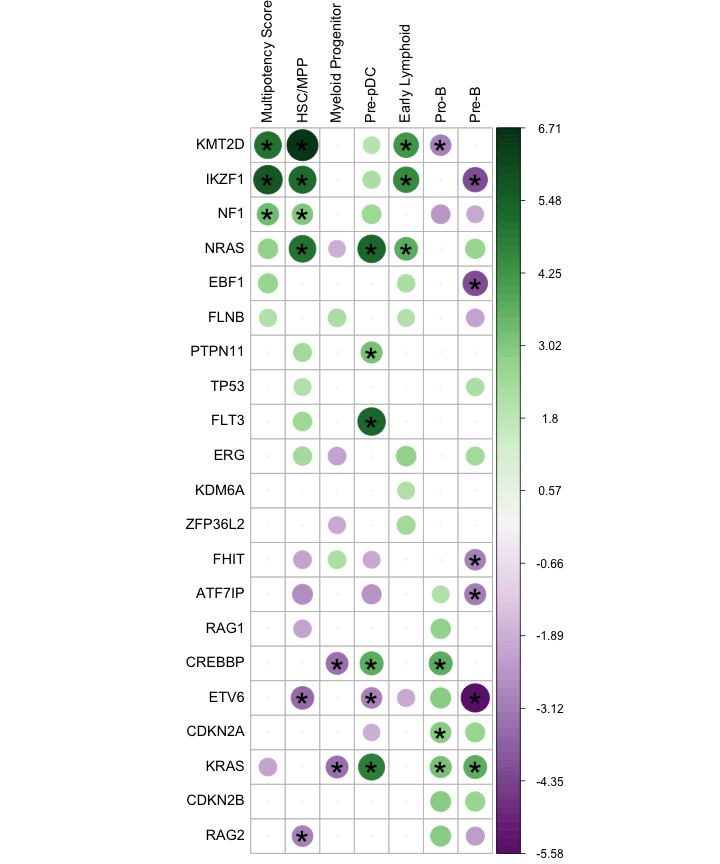

In [545]:
%%R --units in -h 12 -w 10

subtype_correction = FALSE
lineage_mutation <- lineage_mutation %>% mutate(Lineage = Lineage %>% str_replace('_','-') %>% str_replace('HSC-MPP', 'HSC/MPP') %>% str_replace('Early-', 'Early ') %>% 
                                                str_replace('Myeloid-','Myeloid ') %>% str_replace('-Score', ' Score'))

sigmutations <- lineage_mutation %>% filter(subtype_corrected == subtype_correction) %>% filter(pvalue < 0.05, statistic > 0) %>% pull(Mutation) %>% unique()
mutation_PCs <- lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>% filter(Mutation %in% sigmutations) %>%
    filter(Lineage %in% c('Multipotency Score', 'HSC/MPP', 'Myeloid Progenitor', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B')) %>%  
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>% column_to_rownames('Mutation') %>% data.matrix() %>% t() %>% prcomp()
    
mutation_levels_ordered <- mutation_PCs$rotation %>% data.frame() %>% arrange(PC1) %>% rownames()

colors <- colorRampPalette(brewer.pal(15, 'PRGn'))
palette_continuous <- colors(100)
    
    
pvals <- lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>%
    filter(Mutation %in% mutation_levels_ordered) %>%
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = qvalue) %>% 
    mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
    arrange(Mutation) %>%
    column_to_rownames('Mutation') %>% 
    data.matrix()# %>% t()

pdf(file = 'BALL_MultipotencyScore_Figures/BALL2046_MutationDotplot_NotadjustedSubtype_BDevonly.pdf', width = 7.5, height = 13.5)
lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>%
    filter(Mutation %in% mutation_levels_ordered) %>%
    filter(pvalue < 0.05) %>% 
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>%
    mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
    arrange(Mutation) %>%
    column_to_rownames('Mutation') %>% 
    data.matrix() %>% #t() %>%
    corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'label_sig', 
            col=palette_continuous, cl.ratio=0.4, cl.cex=1)
dev.off()


## now plot it 
lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>%
    filter(Mutation %in% mutation_levels_ordered) %>%
    filter(pvalue < 0.05) %>% 
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>%
    mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
    arrange(Mutation) %>%
    column_to_rownames('Mutation') %>% 
    data.matrix() %>% #t() %>%
    corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'label_sig', 
            col=palette_continuous, cl.ratio=0.4, cl.cex=1)


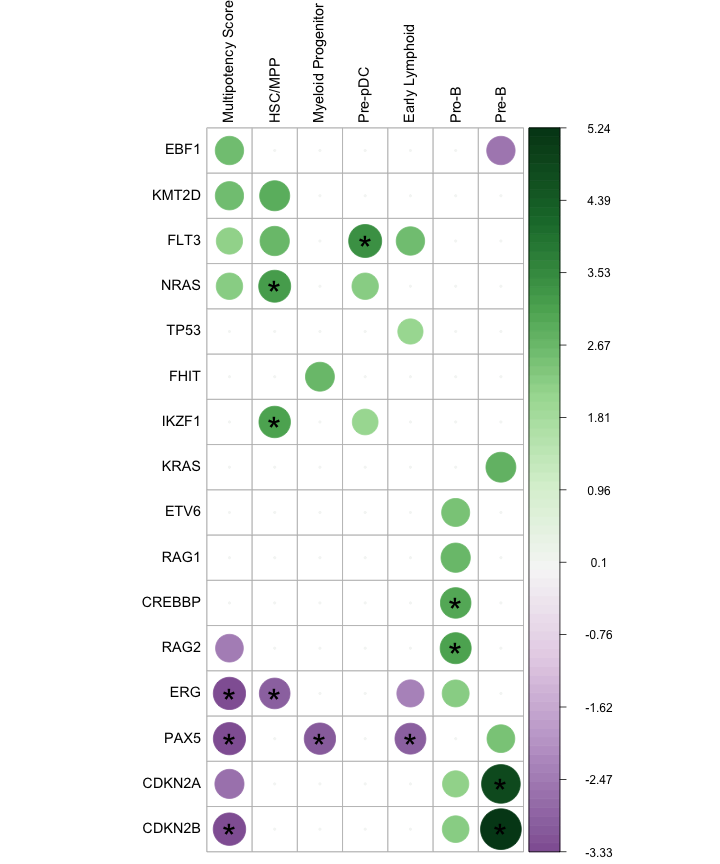

In [546]:
%%R --units in -h 12 -w 10

subtype_correction = TRUE
lineage_mutation <- lineage_mutation %>% mutate(Lineage = Lineage %>% str_replace('_','-') %>% str_replace('HSC-MPP', 'HSC/MPP') %>% str_replace('Early-', 'Early ') %>% 
                                                str_replace('Myeloid-','Myeloid ') %>% str_replace('-Score', ' Score'))

sigmutations <- lineage_mutation %>% filter(subtype_corrected == subtype_correction) %>% filter(pvalue < 0.05, statistic > 0) %>% pull(Mutation) %>% unique()
mutation_PCs <- lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>% filter(Mutation %in% sigmutations) %>%
    filter(Lineage %in% c('Multipotency Score', 'HSC/MPP', 'Myeloid Progenitor', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B')) %>%  
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>% column_to_rownames('Mutation') %>% data.matrix() %>% t() %>% prcomp()
    
mutation_levels_ordered <- mutation_PCs$rotation %>% data.frame() %>% arrange(PC1) %>% rownames()

colors <- colorRampPalette(brewer.pal(15, 'PRGn'))
palette_continuous <- colors(100)
    
    
pvals <- lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>%
    filter(Mutation %in% mutation_levels_ordered) %>%
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = qvalue) %>% 
    mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
    arrange(Mutation) %>%
    column_to_rownames('Mutation') %>% 
    data.matrix()# %>% t()

pdf(file = 'BALL_MultipotencyScore_Figures/BALL2046_MutationDotplot_adjustSubtype_BDevonly.pdf', width = 7.5, height = 13.5)
lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>%
    filter(Mutation %in% mutation_levels_ordered) %>%
    filter(pvalue < 0.05) %>% 
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>%
    mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
    arrange(Mutation) %>%
    column_to_rownames('Mutation') %>% 
    data.matrix() %>% #t() %>%
    corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'label_sig', 
            col=palette_continuous, cl.ratio=0.4, cl.cex=1)
dev.off()


## now plot it 
lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>%
    filter(Mutation %in% mutation_levels_ordered) %>%
    filter(pvalue < 0.05) %>% 
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>%
    mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
    arrange(Mutation) %>%
    column_to_rownames('Mutation') %>% 
    data.matrix() %>% #t() %>%
    corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'label_sig', 
            col=palette_continuous, cl.ratio=0.4, cl.cex=1)


In [547]:
%%R

bulk2046_mutData <- bulk2046_input %>% select(Patient, contains('_mut')) %>% 
    pivot_longer(-Patient) %>% mutate(Mutation = name %>% str_replace('_mut','')) %>% 
    group_by(Mutation) %>% summarise(Freq = sum(value)) %>% column_to_rownames('Mutation') 
    
data.frame(Mutation = mutation_levels_ordered, Freq = bulk2046_mutData[mutation_levels_ordered, ]) #%>% write_csv('DevState_Mutation_Heatmap_Numbers.csv')

`summarise()` ungrouping output (override with `.groups` argument)
   Mutation Freq
1      EBF1   27
2     KMT2D   31
3      FLT3   50
4      NRAS  110
5      TP53   22
6      FHIT   20
7     IKZF1  138
8      KRAS   94
9      ETV6  114
10     RAG1   19
11   CREBBP   42
12     RAG2   23
13      ERG   36
14     PAX5  165
15   CDKN2A  233
16   CDKN2B  201


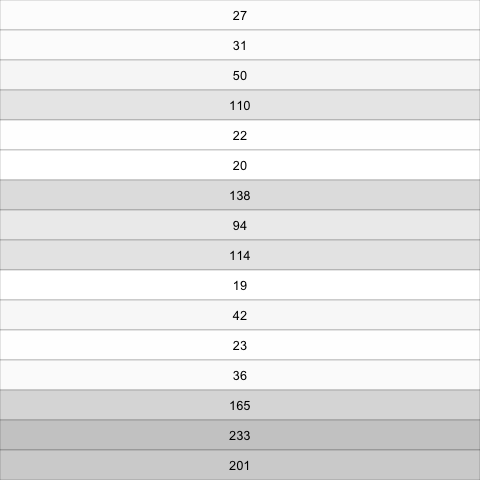

In [548]:
%%R

p <- data.frame(Mutation = mutation_levels_ordered, Freq = bulk2046_mutData[mutation_levels_ordered, ]) %>% 
    mutate(Mutation = factor(Mutation, levels = rev(mutation_levels_ordered))) %>% 
    mutate(lol = 'lol') %>%
    ggplot(aes(x = lol, y = Mutation, fill = Freq)) + 
    geom_tile(color = "black") + geom_text(aes(label = Freq), size = 4.5) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
p
ggsave(file = 'BALL_MultipotencyScore_Figures/BALL2046_MutationDotplot_adjustSubtype_BDevonly_SampleNumbers.pdf', width = 0.6, height = 8.5)
p

In [577]:
%%R --units in -h 15 -w 9

data <- lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>% 
    filter(Mutation %in% mutation_levels_ordered) %>% mutate(Mutation = paste0(Mutation, '   ')) %>% 
    filter(pvalue < 0.05) %>% 
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>%
    mutate(Mutation = factor(Mutation, levels = paste0(mutation_levels_ordered, '   '))) %>%
    arrange(Mutation) %>% 
    column_to_rownames('Mutation') %>% 
    data.matrix() 
    
# Moderate Data
data_mod <- data[,1]  # Start with the first column
data_mod <- cbind(0, data_mod, data[,-1])  # Add a column of NAs and the rest of the data
# Update column names to reflect the change
colnames(data_mod) <- c("Sample Size", colnames(data)[1], colnames(data)[-1])

# Moderate pvalues 
pvals_mod <- pvals[,1]
pvals_mod <- cbind(1, pvals_mod, pvals[,-1])  # Add a column of NAs and the rest of the data
colnames(pvals_mod) <- c("Sample Size", colnames(pvals)[1], colnames(pvals)[-1])

pdf(file = 'BALL_MultipotencyScore_Figures/BALL2046_MutationDotplot_min3samps_BDevonly_reformatted.pdf', width = 7.5, height = 13.5, useDingbats=FALSE)

data_mod %>% 
    corrplot(method = "circle", is.corr = FALSE, 
             tl.cex=1.2, tl.col = 'black', 
             p.mat = pvals_mod, sig.level = 0.05, insig = 'label_sig', 
             col=palette_continuous, cl.ratio=0.25, cl.cex=1
)
    
# Assuming the space column is the 2nd column in the modified matrix
for (i in 0:nrow(data_mod)) {
  rect(0.5, i-0.5, 1.5, i+0.5, border = "white", lwd = 3.5, col = NA)
}
## Add a rectangle around the first column manually
rect(xleft = 1.5, ybottom = 0.5, xright = 2.5, ytop = dim(data)[1]+0.5, 
     border = "black", lwd = 3)
rect(xleft = 2.5, ybottom = 0.5, xright = 8.5, ytop = dim(data)[1]+0.5, 
     border = "black", lwd = 3)

dev.off()


quartz_off_screen 
                3 


### Subtype-specific Mutations

In [50]:
%%R -i ball2046_surv

FusionAssociations_bySubtype <- function(GenomicSubtype){
    
    bulk2046_input <- ball2046_surv %>% 
    filter(Genomic_Subtype != 'NA', Institute != 'NA') %>% 
        rownames_to_column('ID') %>% 
        dplyr::rename(Myeloid_Progenitor = Myeloid_Prog) %>% 
        mutate(Fusion = Fusion %>% str_replace_all('\\(.*','') %>% str_replace_all('-','::')) %>% 
        separate_rows(Fusion, sep = ';') %>% mutate(count = 1) %>% 
        pivot_wider(id_cols = c(ID, Genomic_Subtype, 'Multipotency_Score', 'HSC_MPP', 'Myeloid_Progenitor', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B'), 
                    names_from = Fusion, values_from = count) %>% 
        replace(is.na(.), 0)

    Subtype_input <- bulk2046_input %>% filter(Genomic_Subtype == GenomicSubtype)
    Subtype_fusions <- Subtype_input %>% select(-c(ID, Genomic_Subtype, 'Multipotency_Score', 'HSC_MPP', 'Myeloid_Progenitor', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B')) %>% 
        summarise_all(sum) %>% sort(decreasing=T)
    Subtype_fusions <- names(Subtype_fusions)[Subtype_fusions >= 3]   # keep with 3 or more fusion observations
    print(Subtype_fusions)
    
    # Now run associations within DUX4
    Subtype_lineage_fusion <- data.frame()

    for(lineage in c('Multipotency_Score', 'HSC_MPP', 'Myeloid_Progenitor', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B')){#, 'T_NK', 'Monocyte', 'Erythroid')){

        for(fusion in Subtype_fusions){

            # fit GLM with subtype and institute as strata
            lm <- glm(get(lineage) ~ get(fusion), data = Subtype_input) 

            Subtype_lineage_fusion <- Subtype_lineage_fusion %>% bind_rows(
                summary(lm, test = 'LRT')$coefficients %>% data.frame() %>% 
                    dplyr::rename(estimate = 'Estimate', stder = 'Std..Error', statistic = 't.value', pvalue = 'Pr...t..') %>%
                    rownames_to_column('category') %>% mutate(Lineage = lineage, Fusion = fusion) %>% 
                mutate(nsamps = Subtype_input %>% pull(get(fusion)) %>% sum())
            )
        }
    }

    Subtype_lineage_fusion <- Subtype_lineage_fusion %>% filter(category %>% str_detect('fusion')) %>% select(Lineage, Fusion, statistic, pvalue, nsamps)
    Subtype_lineage_fusion$qvalue <- p.adjust(Subtype_lineage_fusion$pvalue, method='fdr')
    #Subtype_lineage_fusion %>% arrange(qvalue) %>% head(10)

    Subtype_lineage_fusion <- Subtype_lineage_fusion %>% mutate(Lineage = Lineage %>% str_replace('_','-') %>% str_replace('HSC-MPP', 'HSC/MPP') %>% str_replace('Early-', 'Early ') %>% 
                                                    str_replace('Myeloid-','Myeloid ') %>% str_replace('-Score', ' Score'))
    
    return(Subtype_lineage_fusion)
}


In [51]:
%%R -i ball2046_mutations_obs --units in -h 12 -w 10


MutAssociations_bySubtype <- function(GenomicSubtype){
    

    ball2046_mutations_obs <- ball2046_mutations_obs %>% dplyr::rename(Myeloid_Progenitor = Myeloid_Prog)
    institute_order = append(c('St Jude'), ball2046_mutations_obs %>% filter(Institute != 'St Jude') %>% mutate(Institute = Institute %>% as.character()) %>% pull(Institute) %>% table() %>% names())
    subtype_order = append(c('Other'), ball2046_mutations_obs %>% filter(Genomic_Subtype != 'Other') %>% mutate(Genomic_Subtype = Genomic_Subtype %>% as.character()) %>% pull(Genomic_Subtype) %>% table() %>% names())

    bulk2046_input <- ball2046_mutations_obs %>% filter(Genomic_Subtype != 'NA', Institute != 'NA') %>% 
              mutate(Genomic_Subtype = factor(Genomic_Subtype, levels = subtype_order), 
                     Institute = factor(Institute, levels = institute_order),
                     Risk_Group = factor(Risk_Group, levels = c('Childhood SR', 'Childhood HR', 'AYA', 'Adult')))

    Subtype_input <- bulk2046_input %>% filter(Genomic_Subtype == GenomicSubtype)
    Subtype_mutations <- Subtype_input %>% select(contains('_mut')) %>% summarise_all(sum) %>% sort(decreasing=T)
    Subtype_mutations <- names(Subtype_mutations)[Subtype_mutations >= 3]   # keep with 3 or more mutations

    # Now run associations within DUX4
    Subtype_lineage_mutation <- data.frame()

    for(lineage in c('Multipotency_Score', 'HSC_MPP', 'Myeloid_Progenitor', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B')){#, 'T_NK', 'Monocyte', 'Erythroid')){

        for(mutation in Subtype_mutations){

            # fit GLM with subtype and institute as strata
            lm <- glm(get(lineage) ~ get(mutation), data = Subtype_input) #

            Subtype_lineage_mutation <- Subtype_lineage_mutation %>% bind_rows(
                summary(lm, test = 'LRT')$coefficients %>% data.frame() %>% 
                    dplyr::rename(estimate = 'Estimate', stder = 'Std..Error', statistic = 't.value', pvalue = 'Pr...t..') %>%
                    rownames_to_column('category') %>% mutate(Lineage = lineage, Mutation = mutation %>% str_replace('_mut','')) %>% 
                    mutate(nsamps = Subtype_input %>% pull(get(mutation)) %>% sum())
            )
        }
    }

    Subtype_lineage_mutation <- Subtype_lineage_mutation %>% filter(category %>% str_detect('mutation')) %>% select(Lineage, Mutation, statistic, pvalue, nsamps)
    Subtype_lineage_mutation$qvalue <- p.adjust(Subtype_lineage_mutation$pvalue, method='fdr')
    Subtype_lineage_mutation %>% arrange(qvalue) %>% head(10)

    Subtype_lineage_mutation <- Subtype_lineage_mutation %>% mutate(Lineage = Lineage %>% str_replace('_','-') %>% str_replace('HSC-MPP', 'HSC/MPP') %>% str_replace('Early-', 'Early ') %>% 
                                                    str_replace('Myeloid-','Myeloid ') %>% str_replace('-Score', ' Score'))
    
    return(Subtype_lineage_mutation)
}
    
Plot_MutAssociations <- function(Subtype_lineage_mutation, GenomicSubtype){
    
    sigmutations <- Subtype_lineage_mutation %>% filter(pvalue < 0.05) %>% pull(Mutation) %>% unique()
    mutation_PCs <- Subtype_lineage_mutation %>% 
        filter(Mutation %in% sigmutations) %>%
        filter(Lineage %in% c('Multipotency Score', 'HSC/MPP', 'Myeloid Progenitor', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B')) %>%  
        pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
        replace(is.na(.), 0) %>% column_to_rownames('Mutation') %>% data.matrix() %>% t() %>% prcomp()

    mutation_levels_ordered <- mutation_PCs$rotation %>% data.frame() %>% arrange(PC1) %>% rownames()

    colors <- colorRampPalette(brewer.pal(11, 'PRGn'))
    palette_continuous <- colors(100)

    pvals <- Subtype_lineage_mutation %>% 
        filter(Mutation %in% mutation_levels_ordered) %>%
        pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = qvalue) %>% 
        mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
        arrange(Mutation) %>%
        column_to_rownames('Mutation') %>% 
        data.matrix()# %>% t()

    pdf(file = paste0('BALL_MultipotencyScore_Figures/BALL2046_MutationDotplot_',GenomicSubtype,'only_BDevonly.pdf'), width = 7.5, height = 9.5, useDingbats=FALSE)

    Subtype_lineage_mutation %>% 
        filter(Mutation %in% mutation_levels_ordered) %>%
        mutate(statistic = ifelse(pvalue < 0.05, statistic, 0)) %>% 
        pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
        #replace(is.na(.), 0) %>%
        mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
        arrange(Mutation) %>%
        column_to_rownames('Mutation') %>% 
        data.matrix() %>% #t() %>%
        corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'label_sig', 
                col=palette_continuous, cl.ratio=0.4, cl.cex=1)

    dev.off()

    ## now plot it 
    Subtype_lineage_mutation %>% 
        filter(Mutation %in% mutation_levels_ordered) %>%
        mutate(statistic = ifelse(pvalue < 0.05, statistic, 0)) %>% 
        pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
        #replace(is.na(.), 0) %>%
        mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
        arrange(Mutation) %>%
        column_to_rownames('Mutation') %>% 
        data.matrix() %>% #t() %>%
        corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'label_sig', 
                col=palette_continuous, cl.ratio=0.4, cl.cex=1)

    return(Subtype_lineage_mutation)
}



In [130]:
%%R

MutAssociations_bySubtype('KMT2A')

              Lineage Mutation    statistic      pvalue nsamps     qvalue
1  Multipotency Score     KRAS  0.463675374 0.645751162      7 0.97394261
2  Multipotency Score     NRAS -0.235114963 0.815489708      6 0.99466307
3  Multipotency Score     PAX5 -1.843191916 0.073782868      5 0.51648008
4  Multipotency Score   CDKN2A  0.578649197 0.566531255      3 0.97394261
5             HSC/MPP     KRAS  1.080408976 0.287348929      7 0.90153174
6             HSC/MPP     NRAS -0.441208128 0.661775987      6 0.97394261
7             HSC/MPP     PAX5 -1.027787036 0.311100955      5 0.90153174
8             HSC/MPP   CDKN2A -0.010648402 0.991564431      3 0.99466307
9  Myeloid Progenitor     KRAS  0.672461298 0.505705634      7 0.97394261
10 Myeloid Progenitor     NRAS -1.157992085 0.254708399      6 0.90153174
11 Myeloid Progenitor     PAX5 -2.406850093 0.021502804      5 0.20069284
12 Myeloid Progenitor   CDKN2A  0.006736848 0.994663067      3 0.99466307
13            Pre-pDC     KRAS  1.4596

[1] "KMT2A::AFF1"   "KMT2A::MLLT1"  "KMT2A::MLLT3"  "KMT2A::MLLT10"
[5] "KMT2A::EPS15" 
              Lineage      Mutation    statistic       pvalue nsamps
1  Multipotency Score   KMT2A::AFF1  4.875819741 2.865199e-06     92
2  Multipotency Score  KMT2A::MLLT1 -0.721079653 4.720460e-01     19
3  Multipotency Score  KMT2A::MLLT3 -4.216535879 4.394694e-05     11
4  Multipotency Score KMT2A::MLLT10 -4.636822115 7.947045e-06     10
5  Multipotency Score  KMT2A::EPS15  0.461412860 6.452084e-01      4
6             HSC/MPP   KMT2A::AFF1  0.754164515 4.519992e-01     92
7             HSC/MPP  KMT2A::MLLT1 -1.209223294 2.285866e-01     19
8             HSC/MPP  KMT2A::MLLT3 -0.637484357 5.248359e-01     11
9             HSC/MPP KMT2A::MLLT10 -1.910481344 5.808703e-02     10
10            HSC/MPP  KMT2A::EPS15  1.302527422 1.948447e-01      4
11 Myeloid Progenitor   KMT2A::AFF1  4.632291179 8.099603e-06     92
12 Myeloid Progenitor  KMT2A::MLLT1 -1.969248642 5.087101e-02     19
13 Myeloid Prog

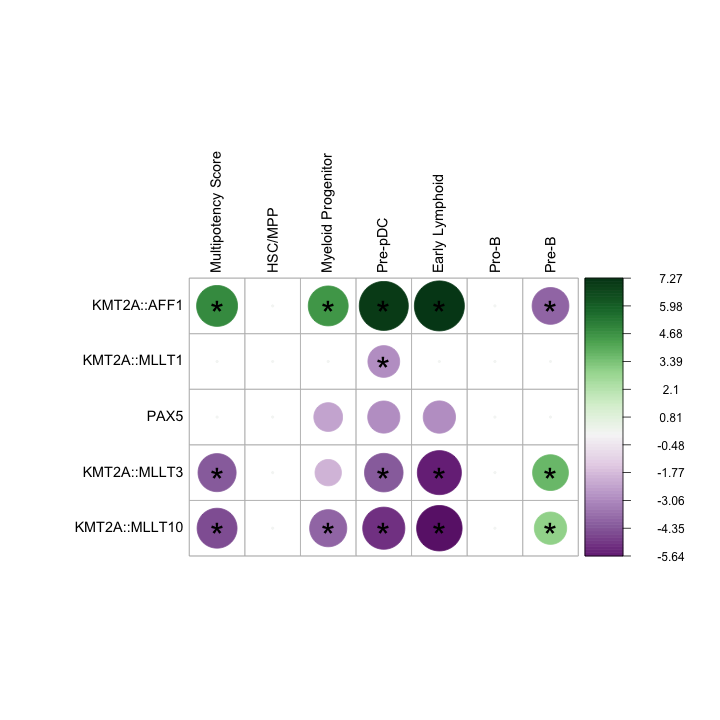

In [55]:
%%R --units in -h 10 -w 10

KMT2A_assocations <- bind_rows(
    FusionAssociations_bySubtype('KMT2A') %>% dplyr::rename(Mutation = Fusion),
    `
)

Plot_MutAssociations( KMT2A_assocations, 'KMT2A' )

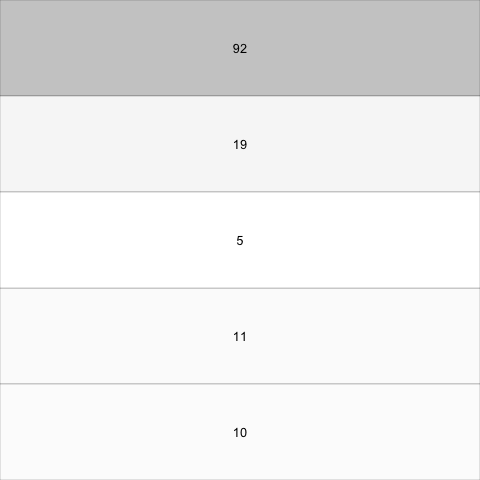

In [66]:
%%R

# get significant mutations
sigmutations <- KMT2A_assocations %>% filter(pvalue < 0.05) %>% pull(Mutation) %>% unique()
mutation_PCs <- KMT2A_assocations %>% 
    filter(Mutation %in% sigmutations) %>%
    filter(Lineage %in% c('Multipotency Score', 'HSC/MPP', 'Myeloid Progenitor', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B')) %>%  
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>% column_to_rownames('Mutation') %>% data.matrix() %>% t() %>% prcomp()

mutation_levels_ordered <- mutation_PCs$rotation %>% data.frame() %>% arrange(PC1) %>% rownames()
mutation_levels_ordered

# KMT2A associations
p <- KMT2A_assocations %>% 
    filter(Mutation %in% mutation_levels_ordered) %>% 
    select(Mutation, Freq = nsamps) %>% unique() %>% 
    mutate(Mutation = factor(Mutation, levels = rev(mutation_levels_ordered))) %>% 
    mutate(lol = 'lol') %>%
    ggplot(aes(x = lol, y = Mutation, fill = Freq)) + 
    geom_tile(color = "black") + geom_text(aes(label = Freq), size = 4.5) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
ggsave(file = 'BALL_MultipotencyScore_Figures/BALL2046_MutationDotplot_KMT2Aonly_BDevonly_SampleNumbers.pdf', width = 0.6, height = 5)
p

               Lineage Mutation    statistic       pvalue nsamps      qvalue
1   Multipotency Score      ERG -4.007234061 1.895912e-04     29 0.007299263
2   Multipotency Score   VPREB1 -2.791637139 7.236125e-03     29 0.101305744
3   Multipotency Score    IKZF1  3.301756209 1.707711e-03     21 0.026298756
4   Multipotency Score   CDKN2A  1.068442670 2.900740e-01     20 0.679735628
5   Multipotency Score     NRAS  3.602002499 6.876204e-04     20 0.017560119
6   Multipotency Score    KMT2D  1.730590786 8.923619e-02     16 0.458079109
7   Multipotency Score   CDKN2B  0.010947877 9.913054e-01     14 0.995908247
8   Multipotency Score     PAX5  0.672931685 5.038605e-01     13 0.793111686
9   Multipotency Score  TBL1XR1 -3.315376056 1.640157e-03     11 0.026298756
10  Multipotency Score    ARID2  1.468062388 1.478884e-01     10 0.569370232
11  Multipotency Score  ZFP36L2 -0.430510508 6.685378e-01      8 0.888569102
12  Multipotency Score    KDM6A  0.943987300 3.493807e-01      7 0.679735628

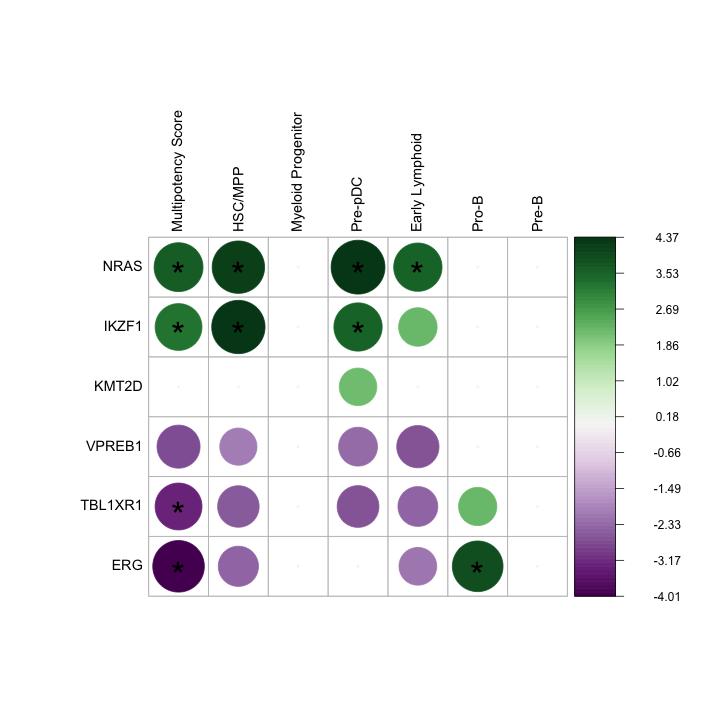

In [67]:
%%R --units in -h 10 -w 10

DUX4_assocations <- bind_rows(
    MutAssociations_bySubtype('DUX4')
)

Plot_MutAssociations( DUX4_assocations, 'DUX4' )

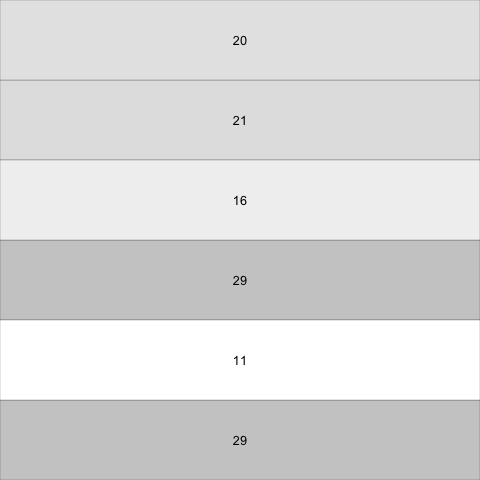

In [68]:
%%R

# get significant mutations
sigmutations <- DUX4_assocations %>% filter(pvalue < 0.05) %>% pull(Mutation) %>% unique()
mutation_PCs <- DUX4_assocations %>% 
    filter(Mutation %in% sigmutations) %>%
    filter(Lineage %in% c('Multipotency Score', 'HSC/MPP', 'Myeloid Progenitor', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B')) %>%  
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>% column_to_rownames('Mutation') %>% data.matrix() %>% t() %>% prcomp()

mutation_levels_ordered <- mutation_PCs$rotation %>% data.frame() %>% arrange(PC1) %>% rownames()
mutation_levels_ordered

# DUX4 associations
p <- DUX4_assocations %>% 
    filter(Mutation %in% mutation_levels_ordered) %>% 
    select(Mutation, Freq = nsamps) %>% unique() %>% 
    mutate(Mutation = factor(Mutation, levels = rev(mutation_levels_ordered))) %>% 
    mutate(lol = 'lol') %>%
    ggplot(aes(x = lol, y = Mutation, fill = Freq)) + 
    geom_tile(color = "black") + geom_text(aes(label = Freq), size = 4.5) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
ggsave(file = 'BALL_MultipotencyScore_Figures/BALL2046_MutationDotplot_DUX4only_BDevonly_SampleNumbers.pdf', width = 0.6, height = 5)
p

               Lineage  Mutation   statistic       pvalue nsamps     qvalue
1   Multipotency Score     IKZF1 -0.82540805 0.4140357517     28 0.80670828
2   Multipotency Score    CDKN2A -3.89389933 0.0003655120     21 0.02282231
3   Multipotency Score    CDKN2B -3.89389933 0.0003655120     21 0.02282231
4   Multipotency Score      PAX5 -2.80727460 0.0076852269     15 0.13316552
5   Multipotency Score    VPREB1  0.58124006 0.5643397914     15 0.80670828
6   Multipotency Score    SLX4IP -1.82840678 0.0749526486     12 0.63872692
7   Multipotency Score      BTG1 -1.15574843 0.2546410006     10 0.80670828
8   Multipotency Score      BTLA -0.42375252 0.6740164284      4 0.83528755
9   Multipotency Score HIST1H2AD  0.58003905 0.5651415596      4 0.80670828
10  Multipotency Score HIST1H2AE  0.58003905 0.5651415596      4 0.80670828
11  Multipotency Score HIST1H2BE  0.58003905 0.5651415596      4 0.80670828
12  Multipotency Score HIST1H2BF  0.58003905 0.5651415596      4 0.80670828
13  Multipot

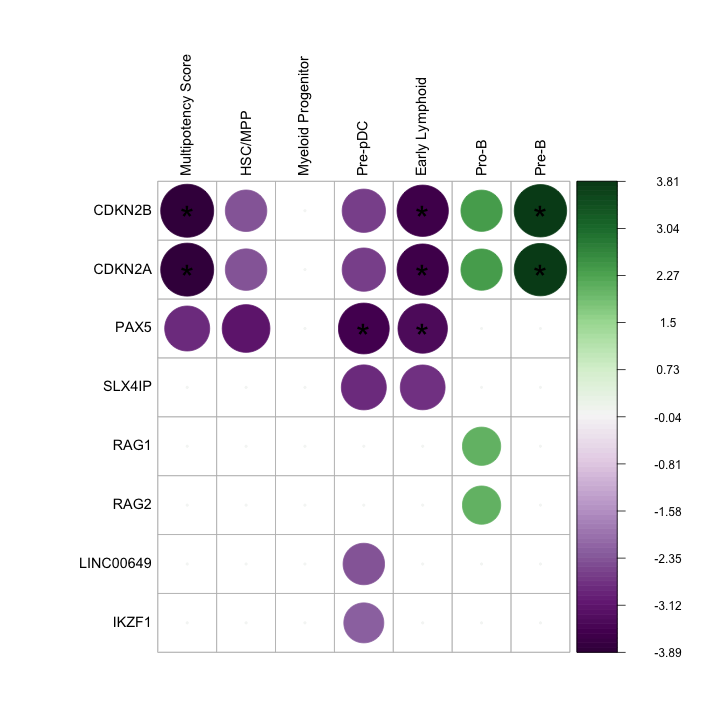

In [69]:
%%R --units in -h 10 -w 10

Ph_assocations <- bind_rows(
    MutAssociations_bySubtype('BCR::ABL1')
)

Plot_MutAssociations( Ph_assocations, 'BCR::ABL1' )

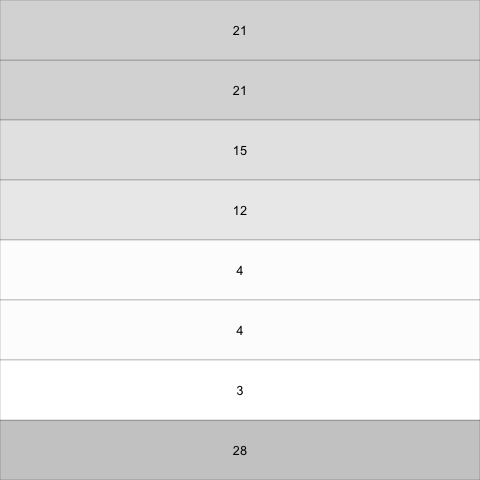

In [72]:
%%R

# get significant mutations
sigmutations <- Ph_assocations %>% filter(pvalue < 0.05) %>% pull(Mutation) %>% unique()
mutation_PCs <- Ph_assocations %>% 
    filter(Mutation %in% sigmutations) %>%
    filter(Lineage %in% c('Multipotency Score', 'HSC/MPP', 'Myeloid Progenitor', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B')) %>%  
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>% column_to_rownames('Mutation') %>% data.matrix() %>% t() %>% prcomp()

mutation_levels_ordered <- mutation_PCs$rotation %>% data.frame() %>% arrange(PC1) %>% rownames()
mutation_levels_ordered

# Ph associations
p <- Ph_assocations %>% 
    filter(Mutation %in% mutation_levels_ordered) %>% 
    select(Mutation, Freq = nsamps) %>% unique() %>% 
    mutate(Mutation = factor(Mutation, levels = rev(mutation_levels_ordered))) %>% 
    mutate(lol = 'lol') %>%
    ggplot(aes(x = lol, y = Mutation, fill = Freq)) + 
    geom_tile(color = "black") + geom_text(aes(label = Freq), size = 4.5) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
ggsave(file = 'BALL_MultipotencyScore_Figures/BALL2046_MutationDotplot_BCR::ABL1only_BDevonly_SampleNumbers.pdf', width = 0.6, height = 5)
p

#### Transcript

In [73]:
ball2046_ph = ball2046.obs.filter(regex='Institute$|Genomic_Subtype|Fusion|Transcript').join(ball2046.to_df())
ball2046_ph = ball2046_ph[ball2046_ph['Genomic_Subtype'] == 'BCR::ABL1']
ball2046_ph['Transcript BCR::ABL1'].value_counts()

p190BCR-ABL1                89
p210BCR-ABL                 29
Atypical                     5
p190BCR-ABL1;Atypical        2
p190BCR-ABL1;p210BCR-ABL     2
Name: Transcript BCR::ABL1, dtype: int64

In [74]:
ball2046_ph['p190'] = np.where(ball2046_ph['Transcript BCR::ABL1'].str.contains('p190'), 1, 0)
ball2046_ph['p210'] = np.where(ball2046_ph['Transcript BCR::ABL1'].str.contains('p210'), 1, 0)
ball2046_ph['p190_vs_p210'] = np.where(ball2046_ph['Transcript BCR::ABL1'].isin(['p190BCR-ABL1']), 'p190',
                                       np.where(ball2046_ph['Transcript BCR::ABL1'].isin(['p210BCR-ABL']), 'p210', np.NaN))
ball2046_ph = ball2046_ph.drop(columns={'Transcript BCR::ABL1'}, axis=0)
ball2046_ph

Institute Genomic_Subtype    Fusion  Multipotency_Score  \
Patient                                                                   
SJBALL030344_D1   St Jude       BCR::ABL1  BCR-ABL1           -0.377511   
SJPHALL013_D      St Jude       BCR::ABL1  BCR-ABL1            0.034596   
SJPHALL012_D      St Jude       BCR::ABL1  BCR-ABL1            0.260732   
SJPHALL020_D      St Jude       BCR::ABL1  BCR-ABL1            1.728718   
SJHYPO121_D       St Jude       BCR::ABL1  BCR-ABL1            0.730363   
...                   ...             ...       ...                 ...   
SJBALL014385_D1   Toronto       BCR::ABL1  BCR-ABL1            0.746156   
SJBALL021737_D1     MDACC       BCR::ABL1  BCR-ABL1            1.693905   
SJBALL030414_D1   St Jude       BCR::ABL1  BCR-ABL1           -0.448478   
SJBALL030734_D1   St Jude       BCR::ABL1  BCR-ABL1            0.094181   
SJBALL031128_D1   St Jude       BCR::ABL1  BCR-ABL1            2.079928   

                  HSC_MPP  Myeloid_Prog   Pre_pDC  Early_Lymphoid     Pro_B  \
Patient                                                                       
SJBALL030344_D1 -1.268906      0.705644  0.018679       -0.177338  0.306544   
SJPHALL013_D     0.198947      0.539705  0.021085       -0.118683  0.311472   
SJPHALL012_D     0.109148      0.960375 -0.796426       -0.484775 -0.387563   
SJPHALL020_D     0.706571      3.278184  0.558065        0.921736 -1.382470   
SJHYPO121_D      1.097594     -0.124049  1.402045        0.797534  0.482270   
...                   ...           ...       ...             ...       ...   
SJBALL014385_D1  0.311064     -1.085701  1.431602        1.844796  1.228997   
SJBALL021737_D1  1.545591      0.257143  0.136210        0.735358 -0.851703   
SJBALL030414_D1 -0.920762     -0.551538 -0.370555        0.122241  0.748446   
SJBALL030734_D1 -0.275436      0.241275 -0.762833       -0.439841 -0.198439   
SJBALL031128_D1  0.613443      2.202049  1.042439        2.108982 -0.894439   

                    Pre_B  Mature_B      T_NK  Monocyte  Erythroid  p190  \
Patient                                                                    
SJBALL030344_D1 -0.999311 -1.346763 -1.769364  1.728477   0.417106     1   
SJPHALL013_D    -0.183303  0.170356 -0.039558  0.821964  -1.330551     1   
SJPHALL012_D    -0.660451  0.309663  0.154182  1.607917  -1.178797     1   
SJPHALL020_D    -1.614600 -1.021647 -0.626050  1.682260  -2.446475     1   
SJHYPO121_D     -0.284559 -0.776626 -1.772820 -0.924907  -0.806291     1   
...                   ...       ...       ...       ...        ...   ...   
SJBALL014385_D1 -0.879300 -1.327819 -1.453996 -1.122532   0.533957     0   
SJBALL021737_D1 -1.128589  1.328606  0.377442  0.340108  -1.156675     0   
SJBALL030414_D1 -0.595700 -1.349867 -0.296171  0.688428   1.325866     1   
SJBALL030734_D1 -0.924466  0.474862  0.707754  1.351406  -0.544193     1   
SJBALL031128_D1 -1.836389 -0.817439 -1.816138  1.869336  -1.751711     1   

                 p210 p190_vs_p210  
Patient                             
SJBALL030344_D1     0         p190  
SJPHALL013_D        0         p190  
SJPHALL012_D        0         p190  
SJPHALL020_D        0         p190  
SJHYPO121_D         0         p190  
...               ...          ...  
SJBALL014385_D1     0          nan  
SJBALL021737_D1     0          nan  
SJBALL030414_D1     0         p190  
SJBALL030734_D1     0         p190  
SJBALL031128_D1     0         p190  

[127 rows x 17 columns]

In [128]:
%%R

ball2046_ph %>% 
    filter(p190_vs_p210 %in% c('p190', 'p210')) %>%
    mutate(name = 'Multipotency Score') %>%
    ggplot(aes(x = p190_vs_p210, y = Multipotency_Score, fill = p190_vs_p210)) + 
    geom_boxplot(outlier.shape=NULL) + ggbeeswarm::geom_quasirandom() + facet_wrap(.~name) +
    scale_fill_brewer(palette = 'Dark2') + ylab('B-ALL Multipotency Score') + xlab('BCR::ABL1 Transcript') + 
    theme_pubr(legend = 'none') + stat_compare_means(comparisons = list(c('p190', 'p210')))
    
ggsave('BALL_MultipotencyScore_Figures/BALL2046_BCRABL1_Transcript_MultipotencyScore.pdf', height = 4, width = 5, useDingbats=FALSE)

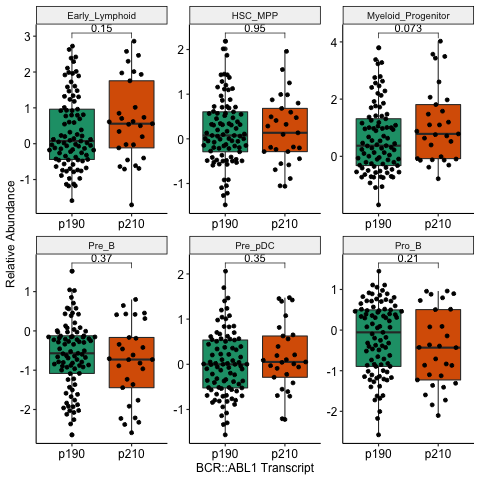

In [129]:
%%R

p <- ball2046_ph %>% 
    filter(p190_vs_p210 %in% c('p190', 'p210')) %>%
    select(p190_vs_p210, HSC_MPP, Myeloid_Progenitor = Myeloid_Prog, Pre_pDC, Early_Lymphoid, Pro_B, Pre_B) %>% 
    pivot_longer(-p190_vs_p210, names_to = 'Population', values_to = 'Signature') %>% 
    ggplot(aes(x = p190_vs_p210, y = Signature, fill = p190_vs_p210)) + 
    geom_boxplot(outlier.shape=NULL) + ggbeeswarm::geom_quasirandom() + 
    facet_wrap(.~Population, scales = 'free') + scale_fill_brewer(palette = 'Dark2') + 
    ylab('Relative Abundance') + xlab('BCR::ABL1 Transcript') + 
    theme_pubr(legend = 'none') + stat_compare_means(comparisons = list(c('p190', 'p210')))
    
p
ggsave('BALL_MultipotencyScore_Figures/BALL2046_BCRABL1_Transcript_DevState.pdf', height = 8, width = 10, useDingbats=FALSE)
p

In [769]:
%%R -i ball2046_ph

ball2046_ph_input <- ball2046_ph %>% dplyr::rename(Myeloid_Progenitor = Myeloid_Prog)

# Now run associations for Ph transcript
Subtype_lineage_ph_transcript <- data.frame()

for(lineage in c('Multipotency_Score', 'HSC_MPP', 'Myeloid_Progenitor', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B')){
    
    for(ph_transcript in c('p190', 'p210')){

        # fit GLM with subtype and institute as strata
        lm <- glm(get(lineage) ~ get(ph_transcript), data = ball2046_ph_input) #

        Subtype_lineage_ph_transcript <- Subtype_lineage_ph_transcript %>% bind_rows(
            summary(lm, test = 'LRT')$coefficients %>% data.frame() %>% 
                dplyr::rename(estimate = 'Estimate', stder = 'Std..Error', statistic = 't.value', pvalue = 'Pr...t..') %>%
                rownames_to_column('category') %>% mutate(Lineage = lineage, Mutation = ph_transcript)
        )
    }
}

Subtype_lineage_ph_transcript <- Subtype_lineage_ph_transcript %>% filter(category %>% str_detect('ranscript')) %>% select(Lineage, Mutation, statistic, pvalue)
Subtype_lineage_ph_transcript$qvalue <- p.adjust(Subtype_lineage_ph_transcript$pvalue, method='fdr')
#Subtype_lineage_fusion %>% arrange(qvalue) %>% head(10)

Subtype_lineage_ph_transcript <- Subtype_lineage_ph_transcript %>% mutate(Lineage = Lineage %>% str_replace('_','-') %>% str_replace('HSC-MPP', 'HSC/MPP') %>% 
                                                                          str_replace('Early-', 'Early ') %>% str_replace('Myeloid-','Myeloid ') %>% str_replace('-Score', ' Score'))

Subtype_lineage_ph_transcript

              Lineage Mutation  statistic     pvalue    qvalue
1  Multipotency Score     p190 -1.1293431 0.26091573 0.4146067
2  Multipotency Score     p210  1.3834637 0.16898852 0.4146067
3             HSC/MPP     p190 -0.3997370 0.69003242 0.7431118
4             HSC/MPP     p210 -0.2445507 0.80720530 0.8072053
5  Myeloid Progenitor     p190 -1.1218839 0.26406228 0.4146067
6  Myeloid Progenitor     p210  2.1957872 0.02995290 0.4146067
7             Pre-pDC     p190 -1.1160703 0.26653291 0.4146067
8             Pre-pDC     p210  0.7551458 0.45158203 0.5747408
9      Early Lymphoid     p190 -1.4485640 0.14996325 0.4146067
10     Early Lymphoid     p210  1.3380192 0.18331920 0.4146067
11              Pro-B     p190  0.8042081 0.42280364 0.5747408
12              Pro-B     p210 -1.7952336 0.07503269 0.4146067
13              Pre-B     p190  0.5030049 0.61584599 0.7184870
14              Pre-B     p210 -1.2000664 0.23238306 0.4146067


               Lineage  Mutation   statistic       pvalue     qvalue
1   Multipotency Score     IKZF1 -0.82540805 0.4140357517 0.80670828
2   Multipotency Score    CDKN2A -3.89389933 0.0003655120 0.02282231
3   Multipotency Score    CDKN2B -3.89389933 0.0003655120 0.02282231
4   Multipotency Score      PAX5 -2.80727460 0.0076852269 0.13316552
5   Multipotency Score    VPREB1  0.58124006 0.5643397914 0.80670828
6   Multipotency Score    SLX4IP -1.82840678 0.0749526486 0.63872692
7   Multipotency Score      BTG1 -1.15574843 0.2546410006 0.80670828
8   Multipotency Score      BTLA -0.42375252 0.6740164284 0.83528755
9   Multipotency Score HIST1H2AD  0.58003905 0.5651415596 0.80670828
10  Multipotency Score HIST1H2AE  0.58003905 0.5651415596 0.80670828
11  Multipotency Score HIST1H2BE  0.58003905 0.5651415596 0.80670828
12  Multipotency Score HIST1H2BF  0.58003905 0.5651415596 0.80670828
13  Multipotency Score HIST1H2BG  0.58003905 0.5651415596 0.80670828
14  Multipotency Score  HIST1H3D  

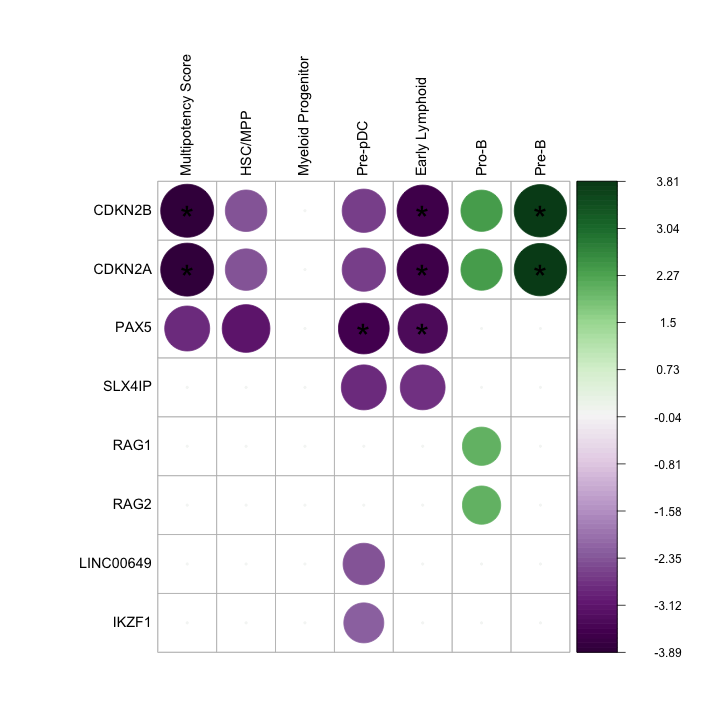

In [771]:
%%R --units in -h 10 -w 10

Ph_assocations <- bind_rows(
    MutAssociations_bySubtype('BCR::ABL1')
)

Plot_MutAssociations( Ph_assocations, 'BCR::ABL1' )

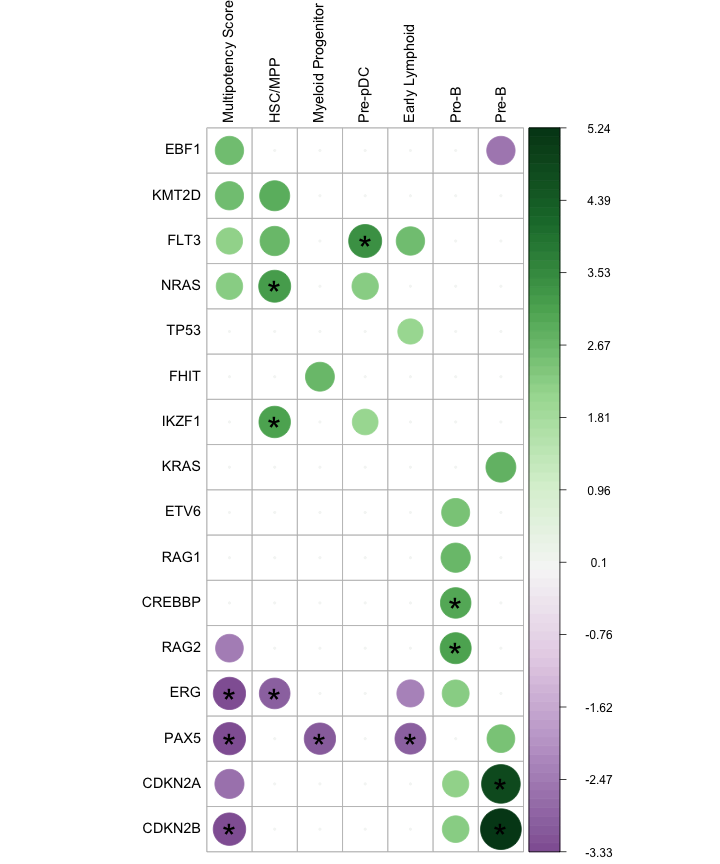

In [49]:
%%R --units in -h 12 -w 10

subtype_correction = TRUE
lineage_mutation <- lineage_mutation %>% mutate(Lineage = Lineage %>% str_replace('_','-') %>% str_replace('HSC-MPP', 'HSC/MPP') %>% str_replace('Early-', 'Early ') %>% 
                                                str_replace('Myeloid-','Myeloid ') %>% str_replace('-Score', ' Score'))

sigmutations <- lineage_mutation %>% filter(subtype_corrected == subtype_correction) %>% filter(pvalue < 0.05, statistic > 0) %>% pull(Mutation) %>% unique()
mutation_PCs <- lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>% filter(Mutation %in% sigmutations) %>%
    filter(Lineage %in% c('Multipotency Score', 'HSC/MPP', 'Myeloid Progenitor', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B')) %>%  
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>% column_to_rownames('Mutation') %>% data.matrix() %>% t() %>% prcomp()
    
mutation_levels_ordered <- mutation_PCs$rotation %>% data.frame() %>% arrange(PC1) %>% rownames()

colors <- colorRampPalette(brewer.pal(15, 'PRGn'))
palette_continuous <- colors(100)
    
    
pvals <- lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>%
    filter(Mutation %in% mutation_levels_ordered) %>%
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = qvalue) %>% 
    mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
    arrange(Mutation) %>%
    column_to_rownames('Mutation') %>% 
    data.matrix()# %>% t()

pdf(file = 'BALL_MultipotencyScore_Figures/BALL2046_MutationDotplot_adjustSubtype_BDevonly.pdf', width = 7.5, height = 13.5)
lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>%
    filter(Mutation %in% mutation_levels_ordered) %>%
    filter(pvalue < 0.05) %>% 
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>%
    mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
    arrange(Mutation) %>%
    column_to_rownames('Mutation') %>% 
    data.matrix() %>% #t() %>%
    corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'label_sig', 
            col=palette_continuous, cl.ratio=0.4, cl.cex=1)
dev.off()


## now plot it 
lineage_mutation %>% 
    filter(subtype_corrected == subtype_correction) %>%
    filter(Mutation %in% mutation_levels_ordered) %>%
    filter(pvalue < 0.05) %>% 
    pivot_wider(id_cols = Mutation, names_from = Lineage, values_from = statistic) %>% 
    replace(is.na(.), 0) %>%
    mutate(Mutation = factor(Mutation, levels = mutation_levels_ordered)) %>%
    arrange(Mutation) %>%
    column_to_rownames('Mutation') %>% 
    data.matrix() %>% #t() %>%
    corrplot(method = "circle", is.corr = FALSE, tl.cex=1.2, tl.col = 'black', p.mat = pvals, sig.level = 0.05, insig = 'label_sig', 
            col=palette_continuous, cl.ratio=0.4, cl.cex=1)


In [50]:
%%R

bulk2046_mutData <- bulk2046_input %>% select(Patient, contains('_mut')) %>% 
    pivot_longer(-Patient) %>% mutate(Mutation = name %>% str_replace('_mut','')) %>% 
    group_by(Mutation) %>% summarise(Freq = sum(value)) %>% column_to_rownames('Mutation') 
    
data.frame(Mutation = mutation_levels_ordered, Freq = bulk2046_mutData[mutation_levels_ordered, ]) #%>% write_csv('DevState_Mutation_Heatmap_Numbers.csv')

`summarise()` ungrouping output (override with `.groups` argument)
   Mutation Freq
1      EBF1   27
2     KMT2D   31
3      FLT3   50
4      NRAS  110
5      TP53   22
6      FHIT   20
7     IKZF1  138
8      KRAS   94
9      ETV6  114
10     RAG1   19
11   CREBBP   42
12     RAG2   23
13      ERG   36
14     PAX5  165
15   CDKN2A  233
16   CDKN2B  201


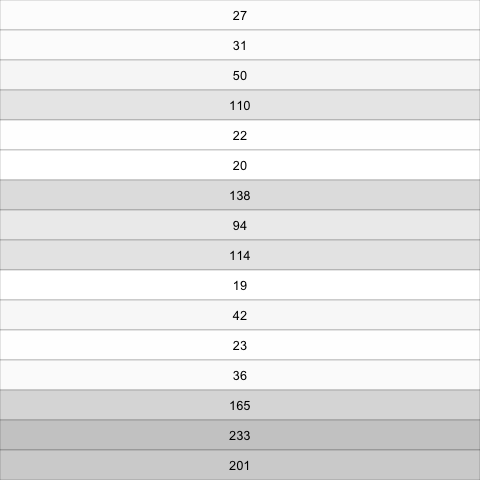

In [51]:
%%R

p <- data.frame(Mutation = mutation_levels_ordered, Freq = bulk2046_mutData[mutation_levels_ordered, ]) %>% 
    mutate(Mutation = factor(Mutation, levels = rev(mutation_levels_ordered))) %>% 
    mutate(lol = 'lol') %>%
    ggplot(aes(x = lol, y = Mutation, fill = Freq)) + 
    geom_tile(color = "black") + geom_text(aes(label = Freq), size = 4.5) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
p
ggsave(file = 'BALL_MultipotencyScore_Figures/BALL2046_MutationDotplot_adjustSubtype_BDevonly_SampleNumbers.pdf', width = 0.6, height = 8.5)
p

##### Check KMT2A mutation

In [471]:
# KMT2A_mutations_obs = ball2046.obs.filter(regex='Institute|Genomic_Subtype|Fusion|Subgroup|PatientID').\
#     join(ball2046.to_df()).reset_index().set_index('PatientID').\
#     join(ball2046_mutations.filter(regex='PatientID|RAS|CDKN2|PAX')).dropna()

KMT2A_mutations_obs = ball2046.obs.filter(regex='Institute|Genomic_Subtype|Fusion|Subgroup|PatientID').set_index('PatientID').\
    join(ball2046_mutations.filter(regex='PatientID|RAS|CDKN2|PAX')).dropna()

KMT2A_mutations_obs = KMT2A_mutations_obs[KMT2A_mutations_obs['Subgroup'].str.contains('KMT2A-a|KMT2A-b')]
KMT2A_mutations_obs.sort_values('Subgroup')

InstituteID   PatientID_old Institute Genomic_Subtype  \
PatientID                                                              
SJINF021        TB-07-2097        SJINF021   St Jude           KMT2A   
SJMLL031        TB-02-2239        SJMLL031   St Jude           KMT2A   
SJINF015        TB-04-0576        SJINF015   St Jude           KMT2A   
SJMLL024        TB-03-2205        SJMLL024   St Jude           KMT2A   
SJINF004        TB-92-0799        SJINF004   St Jude           KMT2A   
SJINF008        TB-98-1673        SJINF008   St Jude           KMT2A   
SJMLL022031     TB-10-1391     SJMLL022031   St Jude           KMT2A   
SJMLL010        TB-11-0994        SJMLL010   St Jude           KMT2A   
SJMLL006        TB-08-2593        SJMLL006   St Jude           KMT2A   
SJINF075        TB-10-1515        SJINF075   St Jude           KMT2A   
SJMLL033        TB-06-2037        SJMLL033   St Jude           KMT2A   
SJCOGALL010110      PAPJPG  SJCOGALL010110       COG           KMT2A   
SJALL015966         PARLFI     SJALL015966       COG           KMT2A   
SJBALL021270        PARLEK    SJBALL021270       COG           KMT2A   
SJALL016652         PARLSU     SJALL016652       COG           KMT2A   
SJBALL001628        PARNLW    SJBALL001628       COG           KMT2A   
SJBALL020829        PAPHMH    SJBALL020829       COG           KMT2A   
SJINF022        TB-08-0463        SJINF022   St Jude           KMT2A   
SJMLL005        TB-07-2394        SJMLL005   St Jude           KMT2A   
SJMLL003304     TB-07-1334     SJMLL003304   St Jude           KMT2A   
SJBALL021280        PARUBK    SJBALL021280       COG           KMT2A   
SJINF011        TB-00-0468        SJINF011   St Jude           KMT2A   
SJINF012        TB-00-0694        SJINF012   St Jude           KMT2A   
SJINF009        TB-99-5099        SJINF009   St Jude           KMT2A   
SJINF010        TB-99-5291        SJINF010   St Jude           KMT2A   
SJINF003        TB-92-0488        SJINF003   St Jude           KMT2A   
SJINF006        TB-97-1606        SJINF006   St Jude           KMT2A   
SJINF020        TB-07-1458        SJINF020   St Jude           KMT2A   
SJINF001        TB-98-6292        SJINF001   St Jude           KMT2A   
SJINF014        TB-03-0510        SJINF014   St Jude           KMT2A   
SJINF002        TB-03-0760        SJINF002   St Jude           KMT2A   
SJINF016        TB-04-2243        SJINF016   St Jude           KMT2A   
SJINF017        TB-05-1939        SJINF017   St Jude           KMT2A   
SJINF018        TB-05-2129        SJINF018   St Jude           KMT2A   
SJINF019        TB-05-2522        SJINF019   St Jude           KMT2A   
SJINF013        TB-02-1919        SJINF013   St Jude           KMT2A   
SJALL016678         PARUIT     SJALL016678       COG           KMT2A   

                                             Fusion                Subgroup  \
PatientID                                                                     
SJINF021                                KMT2A-MLLT3  KMT2A-a/KMT2A-commited   
SJMLL031                               KMT2A-MLLT10  KMT2A-a/KMT2A-commited   
SJINF015                                KMT2A-MLLT3  KMT2A-a/KMT2A-commited   
SJMLL024                                KMT2A-MLLT3  KMT2A-a/KMT2A-commited   
SJINF004                               KMT2A-MLLT10  KMT2A-a/KMT2A-commited   
SJINF008                                KMT2A-MLLT1  KMT2A-a/KMT2A-commited   
SJMLL022031                             KMT2A-MLLT1  KMT2A-a/KMT2A-commited   
SJMLL010                                 KMT2A-AFF1     KMT2A-b/KMT2A-early   
SJMLL006                                 KMT2A-AFF1     KMT2A-b/KMT2A-early   
SJINF075                                 KMT2A-AFF1     KMT2A-b/KMT2A-early   
SJMLL033                                 KMT2A-AFF1     KMT2A-b/KMT2A-early   
SJCOGALL010110                          KMT2A-EPS15     KMT2A-b/KMT2A-early   
SJALL015966                              KMT2A-AFF1     KMT2A-b/KMT2A-early   
SJBALL021270         

In [447]:
%%R

bulk2046_input %>% head()

           Patient InstituteID PatientID_old Institute   Risk_Group
1   SJETV022010_D1  TB-08-4276   SJETV022010   St Jude Childhood SR
2 SJHYPER022013_D1  TB-09-0405 SJHYPER022013   St Jude Childhood SR
3   SJETV021937_D1  TB-09-0142   SJETV021937   St Jude Childhood SR
4  SJBALL021924_D1  TB-08-0052  SJBALL021924   St Jude Childhood HR
5 SJHYPER022044_D1  TB-08-0069 SJHYPER022044   St Jude Childhood HR
6  SJHYPO021991_D1  TB-08-0252  SJHYPO021991   St Jude Childhood HR
  Genomic_Subtype Multipotency_Score    HSC_MPP Myeloid_Progenitor    Pre_pDC
1     ETV6::RUNX1         -1.3090643 -1.2568763        -0.93527639 -0.5307465
2    Hyperdiploid         -0.9166124 -0.6819147        -0.85265386  0.2908543
3     ETV6::RUNX1         -1.4760706 -1.3367827        -0.52875394 -0.9068798
4           Other         -0.5636927  0.0677545         0.03688184  0.7847043
5 Low-hypodiploid         -1.3224686 -0.5659193        -1.76089764 -1.3232622
6         PAX5alt         -0.8068870 -0.9554008         

# Drug Associations

In [578]:
pharmaco_scored = sc.read_csv('ALL_pharmacotypes_logTPM_DevState_scores_May2024.csv')
pharmaco_scored.obs = pharmaco_scored.obs.join(pd.read_csv('../pharmacotypes/ALL_invitro_pharmacotypes.csv').set_index('Patient ID'))
pharmaco_scored

AnnData object with n_obs × n_vars = 712 × 11
    obs: 'Sample ID', 'Immunophenotype', 'Molecular subtype', 'Protocol', 'NCI risk', 'Age at diagnosis (years)', 'WBC at diagnosis (x 109/L)', 'Sex', 'Population and ancestry', 'Day 15 MRD (%)', 'Day 42 or 46 MRD (%)', 'Asparaginase (IU/ml)', 'Bortezomib (nM)', 'CHZ868 (nM)', 'Cytarabine (µM)', 'Dasatinib (nM)', 'Daunorubicin (µM)', 'Dexamethasone (µM)', 'Ibrutinib (µM)', 'Mercaptopurine (µM)', 'Nelarabine (µM)', 'Panobinostat (nM)', 'Prednisolone (µM)', 'Ruxolitinib (nM)', 'Thioguanine (µM)', 'Trametinib (nM)', 'Venetoclax (nM)', 'Vincristine (µM)', 'Vorinostat (nM)', 'Asparaginase_normalized', 'Bortezomib_normalized', 'CHZ868_normalized', 'Cytarabine_normalized', 'Dasatinib_normalized', 'Daunorubicin_normalized', 'Dexamethasone_normalized', 'Ibrutinib_normalized', 'Mercaptopurine_normalized', 'Nelarabine_normalized', 'Panobinostat_normalized', 'Prednisolone_normalized', 'Ruxolitinib_normalized', 'Thioguanine_normalized', 'Trametinib_norm

In [579]:
# Subset for B-ALLs 
pharmaco_scored = pharmaco_scored[pharmaco_scored.obs['Immunophenotype'] == 'B']
pharmaco_scored

View of AnnData object with n_obs × n_vars = 595 × 11
    obs: 'Sample ID', 'Immunophenotype', 'Molecular subtype', 'Protocol', 'NCI risk', 'Age at diagnosis (years)', 'WBC at diagnosis (x 109/L)', 'Sex', 'Population and ancestry', 'Day 15 MRD (%)', 'Day 42 or 46 MRD (%)', 'Asparaginase (IU/ml)', 'Bortezomib (nM)', 'CHZ868 (nM)', 'Cytarabine (µM)', 'Dasatinib (nM)', 'Daunorubicin (µM)', 'Dexamethasone (µM)', 'Ibrutinib (µM)', 'Mercaptopurine (µM)', 'Nelarabine (µM)', 'Panobinostat (nM)', 'Prednisolone (µM)', 'Ruxolitinib (nM)', 'Thioguanine (µM)', 'Trametinib (nM)', 'Venetoclax (nM)', 'Vincristine (µM)', 'Vorinostat (nM)', 'Asparaginase_normalized', 'Bortezomib_normalized', 'CHZ868_normalized', 'Cytarabine_normalized', 'Dasatinib_normalized', 'Daunorubicin_normalized', 'Dexamethasone_normalized', 'Ibrutinib_normalized', 'Mercaptopurine_normalized', 'Nelarabine_normalized', 'Panobinostat_normalized', 'Prednisolone_normalized', 'Ruxolitinib_normalized', 'Thioguanine_normalized', 'Trameti

In [580]:
import scipy 

def drug_celltype_correlations(adata, obs):

    correlations = pd.DataFrame(columns=['pearson', 'pvalue'])

    for celltype in adata.var_names:
        temp = pd.DataFrame({'lc50' : adata.obs[obs], 'score' : adata[:,adata.var_names == celltype].X.toarray().flatten()}).dropna()
        data = pd.DataFrame(np.asarray(scipy.stats.pearsonr(temp['score'], temp['lc50'])), index=['pearson', 'pvalue'], columns=[celltype]).T
        correlations = correlations.append(data)

    #correlations['qvalue'] = multitest.multipletests(correlations.pvalue, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
    correlations.index.name = "CellType"

    return(correlations)

In [581]:
# Determine correlations between cell types and drug sensitivity (AUC)
df = pd.DataFrame()
for drug in ['Asparaginase_normalized', 'Bortezomib_normalized', 'CHZ868_normalized', 'Cytarabine_normalized', 'Dasatinib_normalized', 'Daunorubicin_normalized', 
                 'Dexamethasone_normalized', 'Ibrutinib_normalized', 'Mercaptopurine_normalized', 'Nelarabine_normalized', 'Panobinostat_normalized', 'Prednisolone_normalized', 
                 'Ruxolitinib_normalized', 'Thioguanine_normalized', 'Trametinib_normalized', 'Venetoclax_normalized', 'Vincristine_normalized', 'Vorinostat_normalized']:
    temp = drug_celltype_correlations(pharmaco_scored, drug)
    temp['Drug'] = drug.replace('_normalized','')
    temp['Count'] = (~pharmaco_scored.obs[drug].isna()).sum()
    df = df.append(temp)
    
df = df.reset_index().set_index('Drug')
df = df[df['CellType'].isin(['Multipotency_Score', 'HSC_MPP', 'Early_Lymphoid', 'Pro_B', 'Pre_B'])] # 'Myeloid_Prog',  'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 
df.sort_values('pearson').head(20)

CellType   pearson    pvalue  Count
Drug                                                         
Vorinostat                   Pre_B -0.344757  0.000316    105
CHZ868                       Pre_B -0.344420  0.001336     84
Panobinostat                 Pre_B -0.287108  0.020402     65
Nelarabine                   Pre_B -0.260495  0.020416     79
CHZ868                     HSC_MPP -0.197129  0.072284     84
Trametinib                 HSC_MPP -0.192611  0.025769    134
Panobinostat                 Pro_B -0.176372  0.159900     65
Mercaptopurine               Pro_B -0.172287  0.000123    492
Dexamethasone                Pro_B -0.171568  0.001015    364
Asparaginase                 Pro_B -0.171439  0.000197    467
Dexamethasone                Pre_B -0.171175  0.001042    364
Daunorubicin                 Pre_B -0.168905  0.048488    137
Daunorubicin                 Pro_B -0.168753  0.048693    137
CHZ868              Early_Lymphoid -0.140996  0.200795     84
Mercaptopurine               Pre_B -0.130142  0.003832    492
Trametinib      Multipotency_Score -0.127650  0.141606    134
Venetoclax                 HSC_MPP -0.124166  0.184187    116
Ibrutinib                    Pro_B -0.121642  0.158325    136
Cytarabine                   Pre_B -0.121115  0.042864    280
Dasatinib                    Pre_B -0.111835  0.182037    144

In [582]:
# Perform multiple testing correction and identify significant cell - drug relationships
import anndata as ad
from statsmodels.stats import multitest

df['qvalue'] = multitest.multipletests(df.pvalue, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
# significantly sensitive at pval < 0.05 and pearson < -0.25

sensitive_drugs = set(df[(df['pvalue'] < 0.05)].index.values)

df['logFDR'] = np.log10(df['qvalue'])
df['CellType'] = df['CellType'].str.replace('Early_', 'Early ').str.replace('_B', '-B').str.replace('_Score', ' Score').str.replace('HSC_','HSC / ').astype('category').cat.\
    set_categories(['Multipotency Score', 'HSC / MPP', 'Early Lymphoid', 'Pro-B', 'Pre-B']) # 'Myeloid_Prog', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC',
# filter matrices for significant drugs
df_pearson = df[df.index.isin(sensitive_drugs)].pivot(columns='CellType', values='pearson').T
df_logFDR = df[df.index.isin(sensitive_drugs)].pivot(columns='CellType', values='logFDR').T
df_qvalue = df[df.index.isin(sensitive_drugs)].pivot(columns='CellType', values='qvalue').T
df_pvalue = df[df.index.isin(sensitive_drugs)].pivot(columns='CellType', values='pvalue').T
# reorder drugs by first Principal component
df_pearson_clust = ad.AnnData(df_pearson).T
sc.pp.pca(df_pearson_clust, n_comps=1)
df_pearson_clust.obs['pc1'] = df_pearson_clust.obsm['X_pca'].flatten()
df_pearson = df_pearson[df_pearson_clust.obs.sort_values('pc1', ascending=True).index.values]
df_logFDR = df_logFDR[df_pearson_clust.obs.sort_values('pc1', ascending=True).index.values]
df_qvalue = df_qvalue[df_pearson_clust.obs.sort_values('pc1', ascending=True).index.values]
df_pvalue = df_pvalue[df_pearson_clust.obs.sort_values('pc1', ascending=True).index.values]

df_pearson = df_pearson * (df_pvalue < 0.05)

/Users/andyzeng/opt/anaconda3/envs/singlecell/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/Users/andyzeng/opt/anaconda3/envs/singlecell/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


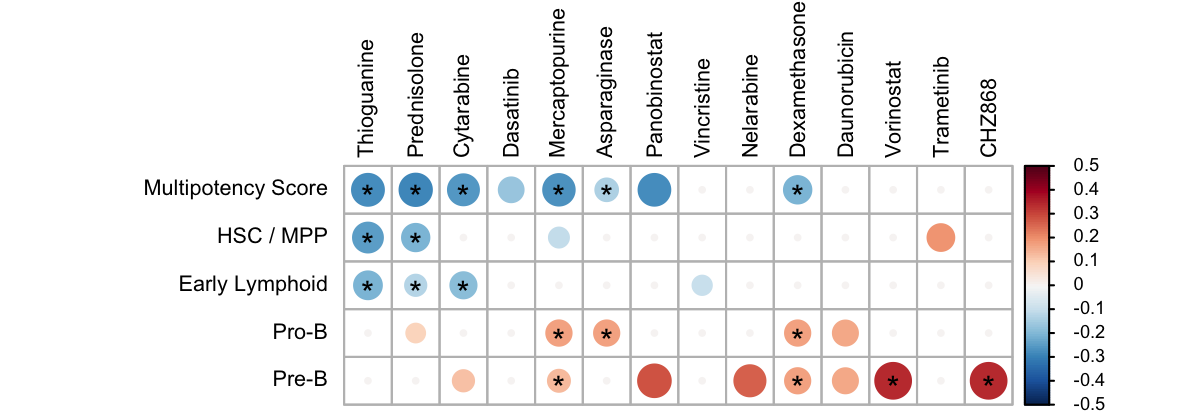

In [583]:
%%R -w 6 -h 2.1 --units in -r 200 -i df_pearson -i df_logFDR -i df_qvalue -i df_pvalue

library("corrplot")
library(RColorBrewer)

colors <- colorRampPalette(rev(brewer.pal(11, 'RdBu')))
rdbu_continuous <- colors(100)

-df_pearson %>% data.matrix() %>% corrplot(method = "circle", tl.cex=0.65, p.mat = data.matrix(df_qvalue), cl.cex = 0.55, cl.align.text = 'l', 
                                        sig.level=0.05, insig = "label_sig", pch.col = "black", pch.cex = 1, 
                                        is.corr = FALSE, tl.col = 'black', col=rdbu_continuous, cl.lim = c(-0.5, 0.5)) #c("pch", "p-value", "blank", "n", "label_sig"),) 



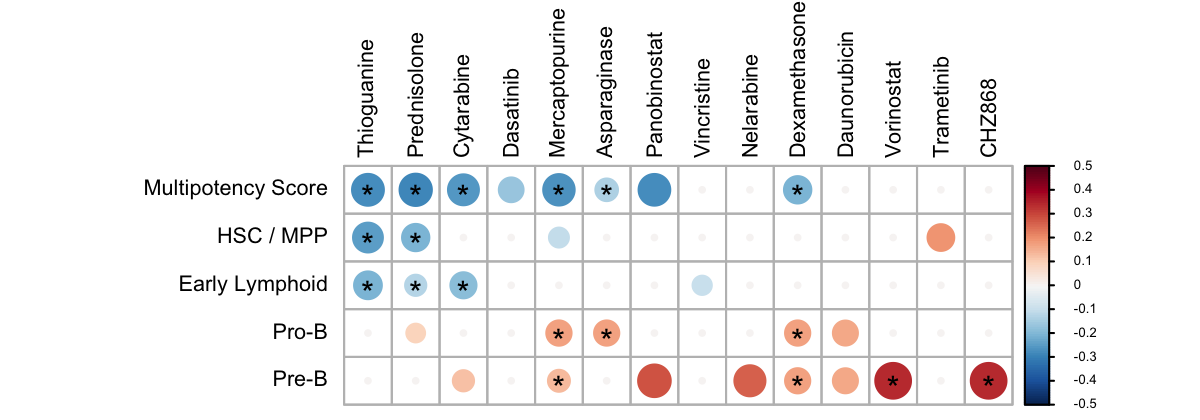

In [584]:
%%R -w 6 -h 2.1 --units in -r 200 -i df_pearson -i df_logFDR -i df_qvalue -i df_pvalue

library("corrplot")
library(RColorBrewer)

colors <- colorRampPalette(rev(brewer.pal(11, 'RdBu')))
rdbu_continuous <- colors(100)


pdf(file = 'BALL_MultipotencyScore_Figures/Pharmacotype_exvivo_drugcorr_withMultipotency.pdf', width = 6, height = 2.5)

-df_pearson %>% data.matrix() %>% corrplot(method = "circle", tl.cex=0.65, p.mat = data.matrix(df_qvalue), cl.cex = 0.4, cl.align.text = 'l', 
                                        sig.level=0.05, insig = "label_sig", pch.col = "black", pch.cex = 1, 
                                        is.corr = FALSE, tl.col = 'black', col=rdbu_continuous, cl.lim = c(-0.5, 0.5)) #c("pch", "p-value", "blank", "n", "label_sig"),) 

dev.off()

-df_pearson %>% data.matrix() %>% corrplot(method = "circle", tl.cex=0.65, p.mat = data.matrix(df_qvalue), cl.cex = 0.4, cl.align.text = 'l', 
                                        sig.level=0.05, insig = "label_sig", pch.col = "black", pch.cex = 1, 
                                        is.corr = FALSE, tl.col = 'black', col=rdbu_continuous, cl.lim = c(-0.5, 0.5)) #c("pch", "p-value", "blank", "n", "label_sig"),) 


In [585]:
df_count = df[['Count']].reset_index().drop_duplicates()

In [586]:
%%R

df_count

R[write to console]: Error in withVisible({ : object 'df_count' not found




Error in withVisible({ : object 'df_count' not found


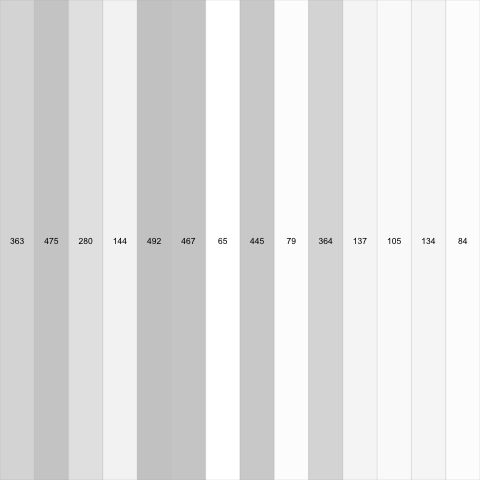

In [587]:
%%R -i df_count

p <- df_count %>% mutate(Drug = Drug %>% factor(levels = colnames(df_pearson))) %>% arrange(Drug) %>% drop_na() %>% 
    mutate(lol = 'lol') %>%
    ggplot(aes(y = lol, x = Drug, fill = Count)) + 
    geom_tile(color = "darkgrey") + geom_text(aes(label = Count), size = 3) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
p
ggsave(file = 'BALL_MultipotencyScore_Figures/Pharmacotype_exvivo_drugcorr_withMultipotency_SampleNumbers.pdf', width = 4.5, height = 0.32)
p

In [638]:
%%R -w 6 -h 2.1 --units in -r 200 -i df_pearson -i df_logFDR -i df_qvalue -i df_pvalue


data <- -df_pearson %>% data.matrix()
    
# Moderate Data
data_mod <- data[1,]  # Start with the first column
data_mod <- rbind(0, data_mod, data[-1,])  # Add a column of NAs and the rest of the data
# Update column names to reflect the change
rownames(data_mod) <- c("Sample Size", rownames(data)[1], rownames(data)[-1])
colnames(data_mod) <- paste0('  ', colnames(data_mod))

# Moderate pvalues 
qvals_mod <- df_qvalue[1,]
qvals_mod <- rbind(1, qvals_mod, df_qvalue[-1,])  # Add a column of NAs and the rest of the data
rownames(qvals_mod) <- c("Sample Size", rownames(df_qvalue)[1], rownames(df_qvalue)[-1])


pdf(file = 'BALL_MultipotencyScore_Figures/Pharmacotype_exvivo_drugcorr_withMultipotency_reformatted.pdf', width = 6, height = 2.5, useDingbats=FALSE)

data_mod %>% 
    corrplot(method = "circle", tl.cex=0.65, 
             p.mat = data.matrix(qvals_mod), cl.cex = 0.4, cl.align.text = 'l', 
             sig.level=0.05, insig = "label_sig", pch.col = "black", pch.cex = 1, 
             is.corr = FALSE, tl.col = 'black', col=rdbu_continuous, cl.lim = c(-0.5, 0.5), 
             #c("pch", "p-value", "blank", "n", "label_sig"),) 
)
    
# Assuming the space column is the 2nd column in the modified matrix
for (i in 0:ncol(data_mod)) {
#  rect(0.5, i-0.5, 1.5, i+0.5, border = "white", lwd = 3.5, col = NA)
  rect(0.5, 5.5, i+0.5, 6.5, border = "white", lwd = 3.5, col = NA)
}
## Add a rectangle around the first column manually
rect(xleft = 0.5, ybottom = 4.5, xright = 14.5, ytop = 5.5, 
     border = "black", lwd = 1)
rect(xleft = 0.5, ybottom = 0.5, xright = 14.5, ytop = 4.5, 
     border = "black", lwd = 1)

dev.off()


quartz_off_screen 
                5 


# Subgroup Analysis

In [494]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


def logreg_auc(x, y):
    # Logistic regression
    logreg = LogisticRegression()
    logreg.fit(x, y)
    logreg_out = logreg.predict_proba(x)[:,1]

    # calculate auc
    fpr, tpr, _ = roc_curve(y, logreg_out)
    auc_score = auc(fpr, tpr)

    return(auc_score)

### Ph+ BALL

This is from Kim et al, primary in adult B-ALL patients

In [654]:
import pandas as pd

In [655]:
Ph_subcluster = pd.read_csv('Kim2023_Ph_BALL_DevState_Scored_May2024.csv').set_index('SampleID')
Ph_subcluster

Cohort       JAMLR   Subgroup Manuscript_name  \
SampleID                                                                    
9407                             1  JAMLR_0003   Late-Pro          Ph01-D   
5712                             1  JAMLR_0004   Late-Pro          Ph02-D   
080001                           1  JAMLR_0005  Early-Pro          Ph03-D   
3279                             1  JAMLR_0006  Early-Pro          Ph04-D   
8020                             1  JAMLR_0007  Inter-Pro          Ph05-D   
080384                           1  JAMLR_0008   Late-Pro          Ph06-D   
5866                             1  JAMLR_0009  Early-Pro          Ph07-D   
3329                             1  JAMLR_0010  Early-Pro          Ph08-D   
080034                           1  JAMLR_0011   Late-Pro          Ph09-D   
9702                             1  JAMLR_0012  Early-Pro          Ph10-D   
0044                             1  JAMLR_0013  Early-Pro          Ph11-D   
080112 (relapse is 110830)       1  JAMLR_0014  Early-Pro          Ph12-D   
5084                             1  JAMLR_0015  Inter-Pro          Ph13-D   
080469                           1  JAMLR_0016  Early-Pro          Ph14-D   
120370 (relapse is 140286)       1  JAMLR_0017  Early-Pro          Ph15-D   
5994                             1  JAMLR_0018  Inter-Pro          Ph16-D   
0340 (relapse is 090318)         1  JAMLR_0019   Late-Pro          Ph17-D   
090438                           1  JAMLR_0020   Late-Pro          Ph18-D   
090233                           1  JAMLR_0021   Late-Pro          Ph19-D   
100785                           1  JAMLR_0022   Late-Pro          Ph20-D   
080558                           1  JAMLR_0023   Late-Pro          Ph21-D   
0568                             1  JAMLR_0024  Early-Pro          Ph22-D   
080027                           1  JAMLR_0025   Late-Pro          Ph23-D   
080516                           1  JAMLR_0026   Late-Pro          Ph24-D   
110017                           1  JAMLR_0027   Late-Pro          Ph25-D   
100381                           1  JAMLR_0028  Early-Pro          Ph26-D   
130286                           1  JAMLR_0029  Early-Pro          Ph27-D   
5671                             1  JAMLR_0030  Early-Pro          Ph28-D   
0164                             1  JAMLR_0031   Late-Pro          Ph29-D   
5254                             1  JAMLR_0032  Early-Pro          Ph30-D   
090124                           1  JAMLR_0033  Early-Pro          Ph31-D   
100089                           1  JAMLR_0034   Late-Pro          Ph32-D   
0827                             1  JAMLR_0035  Inter-Pro          Ph33-D   
110179                           1  JAMLR_0036  Inter-Pro          Ph34-D   
120566                           1  JAMLR_0037  Inter-Pro          Ph35-D   
090628                           1  JAMLR_0038   Late-Pro          Ph36-D   
120549                           1  JAMLR_0039   Late-Pro          Ph37-D   
100231                           1  JAMLR_0040  Early-Pro          Ph38-D   
8709                             1  JAMLR_0041  Inter-Pro          Ph39-D   
8683                             1  JAMLR_0042   Late-Pro          Ph40-D   
110291                           1  JAMLR_0043  Early-Pro          Ph41-D   
8907                             1  JAMLR_0044   Late-Pro          Ph42-D   
120539                           1  JAMLR_0045   Late-Pro          Ph43-D   
110295                           1  JAMLR_0046  Early-Pro          Ph44-D   
120324                           1  JAMLR_0047  Early-Pro          Ph45-D   
5317                             1  JAMLR_0048   Late-Pro          Ph46-D   
0354                             1  JAMLR_0049  Inter-Pro          Ph47-D   
0571                             1  JAMLR_0050  Early-Pro          Ph48-D   
100709                           1  JAMLR_0051   Late-Pro          Ph49-D   
9412                             1  JAMLR_0052  Early-Pro          Ph50-D   
120703                  

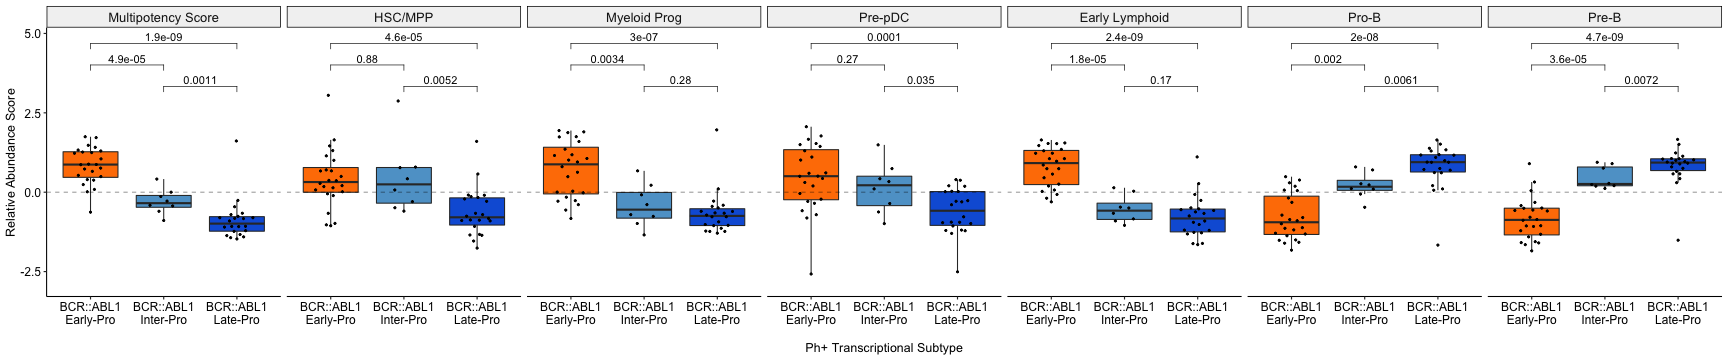

In [656]:
%%R -i Ph_subcluster --units in -h 5 -w 24

p <- Ph_subcluster %>% 
    select(Subgroup, 'Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B') %>% 
    mutate(Subgroup = ifelse(Subgroup %>% str_detect('Early'), 'BCR::ABL1\nEarly-Pro', 
                             ifelse(Subgroup %>% str_detect('Inter'), 'BCR::ABL1\nInter-Pro', 'BCR::ABL1\nLate-Pro')) %>% 
           factor(levels = c('BCR::ABL1\nEarly-Pro', 'BCR::ABL1\nInter-Pro', 'BCR::ABL1\nLate-Pro'))) %>%
    pivot_longer(-Subgroup, values_to = 'Abundance', names_to = 'Lineage') %>% 
    mutate(Lineage = Lineage %>% str_replace('HSC_MPP','HSC/MPP') %>% str_replace('Myeloid_Prog', 'Myeloid Prog') %>% 
           str_replace('Early_Lymphoid', 'Early Lymphoid') %>% str_replace('_', '-') %>% str_replace('-Score', ' Score') %>%
           factor(levels = c('Multipotency Score', 'HSC/MPP', 'Myeloid Prog', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B'))) %>% 
    #mutate(Type = Type %>% str_replace('-a','-a\nCommitted') %>% str_replace('-b','-b\nEarly') %>% factor(levels = c('KMT2A-b\nEarly', 'KMT2A-a\nCommitted'))) %>% 
    filter(Lineage != "NA") %>% 
    ggplot(aes(x = Subgroup, y = Abundance, fill = Subgroup)) + 
    geom_boxplot(outlier.shape=NA) + ggbeeswarm::geom_quasirandom(size=0.7, width=0.25) + 
    facet_wrap(.~Lineage, ncol=7) + theme_pubr(legend = 'none') + geom_hline(yintercept = 0, lty = 2, alpha = 0.4) + 
    stat_compare_means(comparisons = list(c('BCR::ABL1\nInter-Pro', 'BCR::ABL1\nLate-Pro'), 
                                          c('BCR::ABL1\nEarly-Pro', 'BCR::ABL1\nInter-Pro'), 
                                          c('BCR::ABL1\nEarly-Pro', 'BCR::ABL1\nLate-Pro'))) + ylim(c(-2.9, 4.8)) + 
    scale_fill_manual(values = c('#FF7F00', '#5EA2CF', '#1061D9')) + # colors '#4292C6', '#08306B'
    theme(strip.text.x = element_text(size = 13), axis.title = element_text(size = 12.5)) + xlab('\nPh+ Transcriptional Subtype') + ylab('Relative Abundance Score')
    
p 
ggsave('BALL_MultipotencyScore_Figures/Subcluster_Ph_Kim2023_AbundanceBdev_Multipotency_3subtypes.pdf', height = 5.5, width = 27, useDingbats=FALSE)
p

In [657]:
Ph_subcluster_noInter = Ph_subcluster[Ph_subcluster['Subgroup']!='Inter-Pro']
Ph_LineageAUCs = {}

for lineage in ['Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B']:

    x = Ph_subcluster_noInter[[lineage]]
    y = np.where(Ph_subcluster_noInter['Subgroup']=='Early-Pro', 1,  0)

    Ph_LineageAUCs[lineage] = round(logreg_auc(x, y), 3)

Ph_LineageAUCs = pd.DataFrame.from_dict(Ph_LineageAUCs, orient = 'index').rename(columns = {0:'AUC'})
Ph_LineageAUCs

NameError: name 'logreg_auc' is not defined

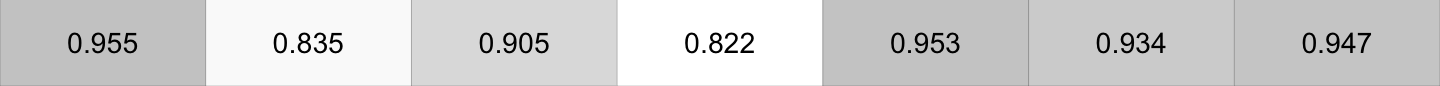

In [596]:
%%R -i Ph_LineageAUCs --units in -h 1.2 -w 20

p <- Ph_LineageAUCs %>% rownames_to_column('Population') %>% 
    mutate(lol = 'lol') %>% mutate(Population = factor(Population, levels=c('Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B'))) %>% 
    ggplot(aes(x = Population, y = lol, fill = AUC)) + 
    geom_tile(color='black') + geom_text(aes(label = AUC), size = 10) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
p
ggsave(file = 'BALL_MultipotencyScore_Figures/Subcluster_Ph_Kim2023_AbundanceBdev_Multipotency_3subtypes_EarlyLate_AUCs.pdf', height = 1, width = 27)
p

### Ph+ BALL from 2046 cohort


In [658]:
Ph_clusters = ball2046[ball2046.obs['Subgroup'].str.contains('BCR::ABL') == True]
Ph_clusters = Ph_clusters.obs[['Subgroup']].join(Ph_clusters.to_df())
Ph_clusters.head()

Subgroup  Multipotency_Score   HSC_MPP  \
Patient                                                              
SJBALL030344_D1  BCR::ABL1_Inter-Pro           -0.377511 -1.268906   
SJPHALL013_D      BCR::ABL1_Late-Pro            0.034596  0.198947   
SJPHALL012_D      BCR::ABL1_Late-Pro            0.260732  0.109148   
SJPHALL020_D     BCR::ABL1_Early-Pro            1.728718  0.706571   
SJHYPO121_D      BCR::ABL1_Inter-Pro            0.730363  1.097594   

                 Myeloid_Prog   Pre_pDC  Early_Lymphoid     Pro_B     Pre_B  \
Patient                                                                       
SJBALL030344_D1      0.705644  0.018679       -0.177338  0.306544 -0.999311   
SJPHALL013_D         0.539705  0.021085       -0.118683  0.311472 -0.183303   
SJPHALL012_D         0.960375 -0.796426       -0.484775 -0.387563 -0.660451   
SJPHALL020_D         3.278184  0.558065        0.921736 -1.382470 -1.614600   
SJHYPO121_D         -0.124049  1.402045        0.797534  0.482270 -0.284559   

                 Mature_B      T_NK  Monocyte  Erythroid  
Patient                                                   
SJBALL030344_D1 -1.346763 -1.769364  1.728477   0.417106  
SJPHALL013_D     0.170356 -0.039558  0.821964  -1.330551  
SJPHALL012_D     0.309663  0.154182  1.607917  -1.178797  
SJPHALL020_D    -1.021647 -0.626050  1.682260  -2.446475  
SJHYPO121_D     -0.776626 -1.772820 -0.924907  -0.806291

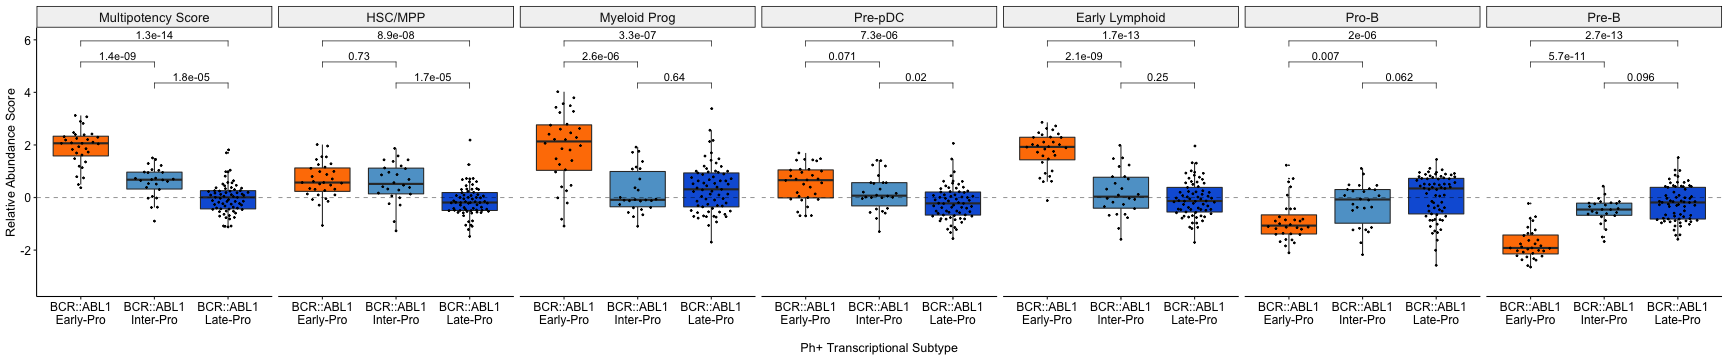

In [660]:
%%R -i Ph_clusters --units in -h 5 -w 24

p <- Ph_clusters %>% 
    select(Subgroup, 'Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B') %>% 
    mutate(Subgroup = ifelse(Subgroup %>% str_detect('Early'), 'BCR::ABL1\nEarly-Pro', 
                             ifelse(Subgroup %>% str_detect('Inter'), 'BCR::ABL1\nInter-Pro', 'BCR::ABL1\nLate-Pro')) %>% 
           factor(levels = c('BCR::ABL1\nEarly-Pro', 'BCR::ABL1\nInter-Pro', 'BCR::ABL1\nLate-Pro'))) %>%
    pivot_longer(-Subgroup, values_to = 'Abundance', names_to = 'Lineage') %>% 
    mutate(Lineage = Lineage %>% str_replace('HSC_MPP','HSC/MPP') %>% str_replace('Myeloid_Prog', 'Myeloid Prog') %>% 
           str_replace('Early_Lymphoid', 'Early Lymphoid') %>% str_replace('_', '-') %>% str_replace('-Score', ' Score') %>%
           factor(levels = c('Multipotency Score', 'HSC/MPP', 'Myeloid Prog', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B'))) %>% 
    #mutate(Type = Type %>% str_replace('-a','-a\nCommitted') %>% str_replace('-b','-b\nEarly') %>% factor(levels = c('KMT2A-b\nEarly', 'KMT2A-a\nCommitted'))) %>% 
    filter(Lineage != "NA") %>% 
    ggplot(aes(x = Subgroup, y = Abundance, fill = Subgroup)) + 
    geom_boxplot(outlier.size=0) + ggbeeswarm::geom_quasirandom(size=0.5, width=0.3) + 
    facet_wrap(.~Lineage, ncol=7) + theme_pubr(legend = 'none') + geom_hline(yintercept = 0, lty = 2, alpha = 0.4) + 
    stat_compare_means(comparisons = list(c('BCR::ABL1\nInter-Pro', 'BCR::ABL1\nLate-Pro'), 
                                          c('BCR::ABL1\nEarly-Pro', 'BCR::ABL1\nInter-Pro'), 
                                          c('BCR::ABL1\nEarly-Pro', 'BCR::ABL1\nLate-Pro'))) + ylim(c(-3.3, 6)) + 
    scale_fill_manual(values = c('#FF7F00', '#5EA2CF', '#1061D9')) + # colors '#4292C6', '#08306B'
    theme(strip.text.x = element_text(size = 13), axis.title = element_text(size = 12.5)) + xlab('\nPh+ Transcriptional Subtype') + ylab('Relative Abundance Score')
    
p 
ggsave('BALL_MultipotencyScore_Figures/Subcluster_Ph_BALL2046_AbundanceBdev_Multipotency_3subtypes.pdf', height = 5.5, width = 27, useDingbats=FALSE)
p

In [589]:
Ph_clusters_noInter = Ph_clusters[Ph_clusters['Subgroup']!='BCR::ABL1_Inter-Pro']
Ph127_LineageAUCs = {}

for lineage in ['Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B']:

    x = Ph_clusters_noInter[[lineage]]
    y = np.where(Ph_clusters_noInter['Subgroup']=='BCR::ABL1_Early-Pro', 1,  0)

    Ph127_LineageAUCs[lineage] = round(logreg_auc(x, y), 3)

Ph127_LineageAUCs = pd.DataFrame.from_dict(Ph127_LineageAUCs, orient = 'index').rename(columns = {0:'AUC'})
Ph127_LineageAUCs

AUC
Multipotency_Score  0.978
HSC_MPP             0.832
Myeloid_Prog        0.817
Pre_pDC             0.779
Early_Lymphoid      0.957
Pro_B               0.795
Pre_B               0.954

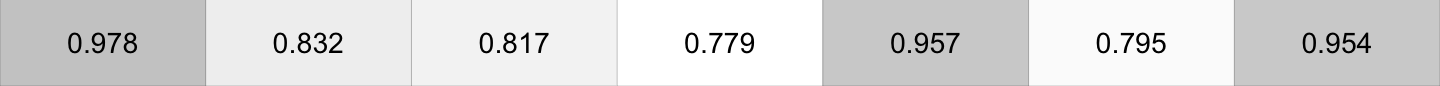

In [598]:
%%R -i Ph127_LineageAUCs --units in -h 1.2 -w 20

p <- Ph127_LineageAUCs %>% rownames_to_column('Population') %>% 
    mutate(lol = 'lol') %>% mutate(Population = factor(Population, levels=c('Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B'))) %>% 
    ggplot(aes(x = Population, y = lol, fill = AUC)) + 
    geom_tile(color='black') + geom_text(aes(label = AUC), size = 10) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
p
ggsave(file = 'BALL_MultipotencyScore_Figures/Subcluster_Ph_BALL2046_AbundanceBdev_Multipotency_3subtypes_EarlyLate_AUCs.pdf', height = 1, width = 27)
p

### DUX4-r BALL from 2046 cohort


In [661]:
DUX4_clusters = ball2046[ball2046.obs['Subgroup'].str.contains('DUX4') == True]
DUX4_clusters = DUX4_clusters.obs[['Subgroup']].join(DUX4_clusters.to_df())
DUX4_clusters

Subgroup  Multipotency_Score   HSC_MPP  \
Patient                                                               
SJBALL030127_D1     DUX4-b/DUX4-early            1.295311  1.888284   
SJBALL030145_D1  DUX4-a/DUX4-commited           -1.351584 -1.502079   
SJALL040114_D1   DUX4-a/DUX4-commited           -1.338172 -1.145323   
SJALL040120_D1   DUX4-a/DUX4-commited           -0.179228  0.432688   
SJALL040122_D1   DUX4-a/DUX4-commited           -0.220937 -0.173803   
...                               ...                 ...       ...   
SJBALL022611_D1     DUX4-b/DUX4-early            1.817645  3.094979   
SJBALL030379_D1  DUX4-a/DUX4-commited           -1.765164 -1.433315   
SJBALL030762_D1  DUX4-a/DUX4-commited           -0.246373 -0.621468   
SJBALL030975_D1  DUX4-a/DUX4-commited           -1.216914 -1.459487   
SJBALL031281_D1     DUX4-b/DUX4-early            0.722558  0.641936   

                 Myeloid_Prog   Pre_pDC  Early_Lymphoid     Pro_B     Pre_B  \
Patient                                                                       
SJBALL030127_D1      0.112431  0.641255        0.946795 -0.293781  0.108654   
SJBALL030145_D1     -0.050879 -1.368744       -0.535388  0.819762  0.477896   
SJALL040114_D1      -0.674374 -0.648126        0.010264  1.281640  1.124427   
SJALL040120_D1      -1.176278 -0.597883       -0.192537  0.336830  0.382626   
SJALL040122_D1      -0.618711 -0.137422        0.332274  0.676120  0.067105   
...                       ...       ...             ...       ...       ...   
SJBALL022611_D1      0.975420  1.458469        2.632147 -0.085416  1.874631   
SJBALL030379_D1     -0.482478 -0.972210       -0.739583  1.648369  0.726772   
SJBALL030762_D1     -1.128616 -1.183462       -0.200859 -0.258891 -0.071138   
SJBALL030975_D1     -0.764980 -1.372574       -0.463462  0.723917  0.426261   
SJBALL031281_D1      0.886671 -0.709486       -0.003578 -0.924807 -0.189674   

                 Mature_B      T_NK  Monocyte  Erythroid  
Patient                                                   
SJBALL030127_D1  0.274963 -0.762255  0.456872   0.110777  
SJBALL030145_D1 -0.061414  0.463634  1.187812  -0.175161  
SJALL040114_D1   0.623995 -0.461933 -0.481592   0.122922  
SJALL040120_D1   1.164764  0.320834 -0.562989   0.425245  
SJALL040122_D1   0.254105 -1.470953 -0.851080   0.018077  
...                   ...       ...       ...        ...  
SJBALL022611_D1  1.323719 -1.819368 -1.943467  -2.153282  
SJBALL030379_D1 -0.055535 -0.622522 -0.743575   0.126324  
SJBALL030762_D1  0.800508  0.078303  0.456558   1.107827  
SJBALL030975_D1  0.683691 -0.062759  0.356827  -0.027823  
SJBALL031281_D1  1.298866  0.803529  0.718239  -1.379748  

[112 rows x 12 columns]

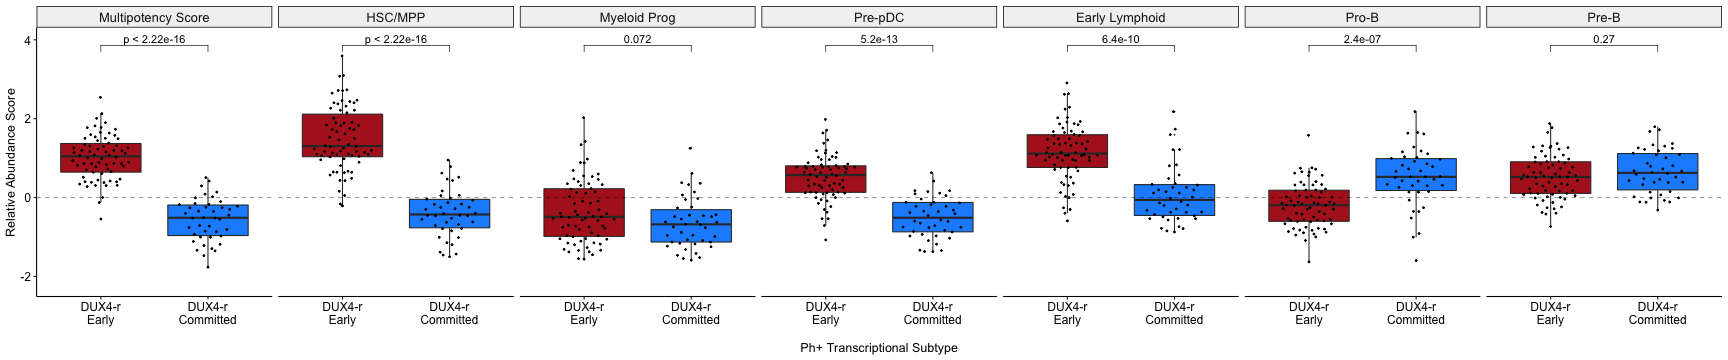

In [662]:
%%R -i DUX4_clusters --units in -h 5 -w 24

p <- DUX4_clusters %>% 
    select(Subgroup, 'Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B') %>% 
    mutate(Subgroup = ifelse(Subgroup %>% str_detect('early'), 'DUX4-r\nEarly', 'DUX4-r\nCommitted') %>%
           factor(levels = c('DUX4-r\nEarly', 'DUX4-r\nCommitted'))) %>%
    pivot_longer(-Subgroup, values_to = 'Abundance', names_to = 'Lineage') %>% 
    mutate(Lineage = Lineage %>% str_replace('HSC_MPP','HSC/MPP') %>% str_replace('Myeloid_Prog', 'Myeloid Prog') %>% 
           str_replace('Early_Lymphoid', 'Early Lymphoid') %>% str_replace('_', '-') %>% str_replace('-Score', ' Score') %>%
           factor(levels = c('Multipotency Score', 'HSC/MPP', 'Myeloid Prog', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B'))) %>% 
    #mutate(Type = Type %>% str_replace('-a','-a\nCommitted') %>% str_replace('-b','-b\nEarly') %>% factor(levels = c('KMT2A-b\nEarly', 'KMT2A-a\nCommitted'))) %>% 
    filter(Lineage != "NA") %>% 
    ggplot(aes(x = Subgroup, y = Abundance, fill = Subgroup)) + 
    geom_boxplot(outlier.size=0) + ggbeeswarm::geom_quasirandom(size=0.5, width=0.3) + 
    facet_wrap(.~Lineage, ncol=7) + theme_pubr(legend = 'none') + geom_hline(yintercept = 0, lty = 2, alpha = 0.4) + 
    stat_compare_means(comparisons = list(c('DUX4-r\nEarly', 'DUX4-r\nCommitted'))) + ylim(c(-2.2, 4)) + 
    scale_fill_manual(values = c('#B22122', '#1D90FF')) + 
    theme(strip.text.x = element_text(size = 13), axis.title = element_text(size = 12.5)) + xlab('\nPh+ Transcriptional Subtype') + ylab('Relative Abundance Score')
    
p 
ggsave('BALL_MultipotencyScore_Figures/Subcluster_DUX4_BALL2046_AbundanceBdev_Multipotency.pdf', height = 4.8, width = 20, useDingbats=FALSE)
p

In [638]:
DUX4_LineageAUCs = {}

for lineage in ['Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B']:

    x = DUX4_clusters[[lineage]]
    y = np.where(DUX4_clusters['Subgroup'].str.contains('early'), 1,  0)

    DUX4_LineageAUCs[lineage] = round(logreg_auc(x, y), 3)

DUX4_LineageAUCs = pd.DataFrame.from_dict(DUX4_LineageAUCs, orient = 'index').rename(columns = {0:'AUC'})
DUX4_LineageAUCs

AUC
Multipotency_Score  0.980
HSC_MPP             0.975
Myeloid_Prog        0.602
Pre_pDC             0.909
Early_Lymphoid      0.850
Pro_B               0.793
Pre_B               0.563

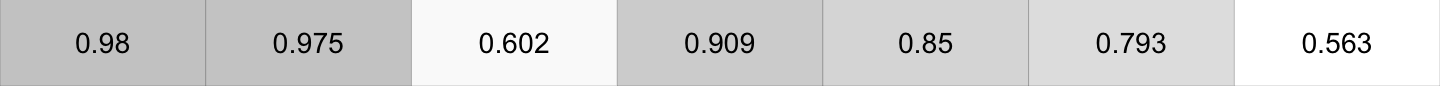

In [639]:
%%R -i DUX4_LineageAUCs --units in -h 1.2 -w 20

p <- DUX4_LineageAUCs %>% rownames_to_column('Population') %>% 
    mutate(lol = 'lol') %>% mutate(Population = factor(Population, levels=c('Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B'))) %>% 
    ggplot(aes(x = Population, y = lol, fill = AUC)) + 
    geom_tile(color='black') + geom_text(aes(label = AUC), size = 10) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
p
ggsave(file = 'BALL_MultipotencyScore_Figures/Subcluster_DUX4_BALL2046_AbundanceBdev_Multipotency_AUCs.pdf', height = 1, width = 20)
p

### KMT2A-r BALL from 2046 cohort


In [52]:
KMT2A_clusters = ball2046[ball2046.obs['Subgroup'].str.contains('KMT2A') == True]
KMT2A_clusters = KMT2A_clusters.obs[['Subgroup']].join(KMT2A_clusters.to_df())
KMT2A_clusters

Subgroup  Multipotency_Score   HSC_MPP  \
Patient                                                                 
SJBALL030059_D1     KMT2A-b/KMT2A-early            0.310770 -1.106204   
SJBALL030313_D1  KMT2A-a/KMT2A-commited           -0.452239 -1.435757   
SJALL040119_D1      KMT2A-b/KMT2A-early            1.352159  1.467661   
SJALL040130_D1      KMT2A-b/KMT2A-early            0.660540  1.096455   
SJMLL010_D          KMT2A-b/KMT2A-early            1.044609  0.615954   
...                                 ...                 ...       ...   
SJBALL014141_D1     KMT2A-b/KMT2A-early            1.300155  1.813404   
SJMLL003_D          KMT2A-b/KMT2A-early            0.080634  0.055885   
SJBALL030123_D1  KMT2A-a/KMT2A-commited           -0.798601 -0.570765   
SJBALL030123_R1  KMT2A-a/KMT2A-commited           -1.116674  0.063925   
SJBALL031087_D1     KMT2A-b/KMT2A-early            0.850170  0.669238   

                 Myeloid_Prog   Pre_pDC  Early_Lymphoid     Pro_B     Pre_B  \
Patient                                                                       
SJBALL030059_D1      1.431375  0.984563        1.545509 -0.306696 -0.024594   
SJBALL030313_D1      0.866596 -0.554200        0.279499 -0.753905  0.804269   
SJALL040119_D1       1.986263  2.347389        2.474784  0.196118  0.817110   
SJALL040130_D1       0.756932  0.948434        1.681056  0.130099  1.376749   
SJMLL010_D           0.497339  2.461231        2.473523 -0.513715  1.087207   
...                       ...       ...             ...       ...       ...   
SJBALL014141_D1     -0.160948  2.359576        1.569580  0.143275  0.237128   
SJMLL003_D           0.202562  1.424114        1.590325 -0.040018  1.701148   
SJBALL030123_D1      0.090919 -0.941709       -1.771643 -1.604980  1.307513   
SJBALL030123_R1     -0.782797 -0.541376       -1.199041 -0.110381  2.204346   
SJBALL031087_D1     -0.546207  1.073612        0.856339 -0.828883  0.027428   

                 Mature_B      T_NK  Monocyte  Erythroid  
Patient                                                   
SJBALL030059_D1 -3.038016 -1.981852  0.464842   0.068128  
SJBALL030313_D1 -1.107906 -0.874978  2.140905  -0.124303  
SJALL040119_D1  -0.658946 -1.894793 -0.747548  -2.271025  
SJALL040130_D1   0.434661 -0.916169 -0.688572  -2.053863  
SJMLL010_D      -2.717268 -2.105673 -1.051041  -2.063235  
...                   ...       ...       ...        ...  
SJBALL014141_D1 -1.308830 -1.974259 -0.956074  -1.128087  
SJMLL003_D      -1.443643 -0.830929 -0.793826  -1.620916  
SJBALL030123_D1  1.523647  0.988804  1.529476  -0.675419  
SJBALL030123_R1  1.585205 -1.156067  1.341857   0.829561  
SJBALL031087_D1 -0.848704 -1.207572  0.629232   0.575519  

[144 rows x 12 columns]

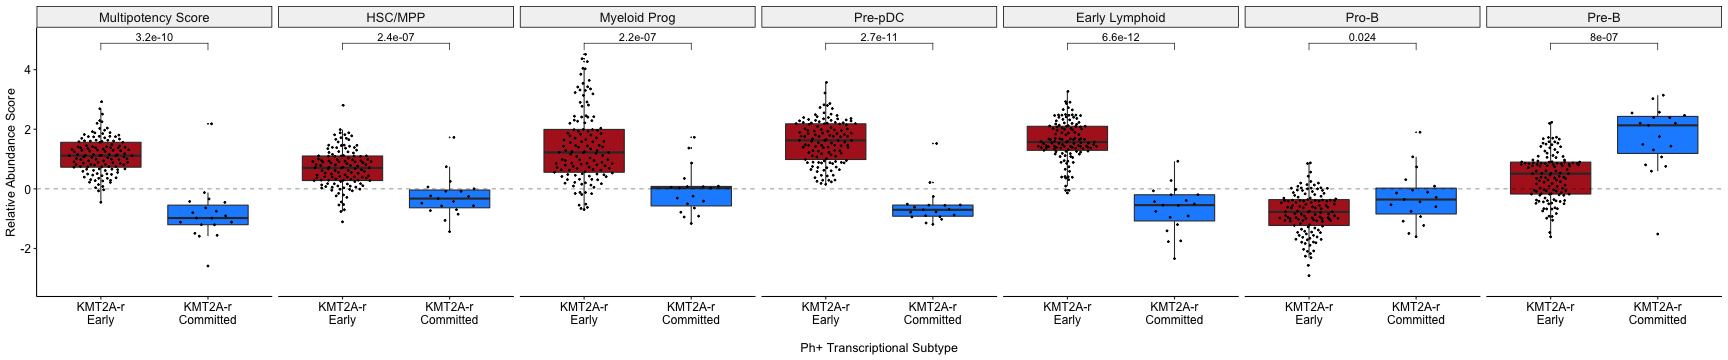

In [663]:
%%R -i KMT2A_clusters --units in -h 5 -w 24

p <- KMT2A_clusters %>% 
    select(Subgroup, 'Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B') %>% 
    mutate(Subgroup = ifelse(Subgroup %>% str_detect('early'), 'KMT2A-r\nEarly', 'KMT2A-r\nCommitted') %>%
           factor(levels = c('KMT2A-r\nEarly', 'KMT2A-r\nCommitted'))) %>%
    pivot_longer(-Subgroup, values_to = 'Abundance', names_to = 'Lineage') %>% 
    mutate(Lineage = Lineage %>% str_replace('HSC_MPP','HSC/MPP') %>% str_replace('Myeloid_Prog', 'Myeloid Prog') %>% 
           str_replace('Early_Lymphoid', 'Early Lymphoid') %>% str_replace('_', '-') %>% str_replace('-Score', ' Score') %>%
           factor(levels = c('Multipotency Score', 'HSC/MPP', 'Myeloid Prog', 'Pre-pDC', 'Early Lymphoid', 'Pro-B', 'Pre-B'))) %>% 
    #mutate(Type = Type %>% str_replace('-a','-a\nCommitted') %>% str_replace('-b','-b\nEarly') %>% factor(levels = c('KMT2A-b\nEarly', 'KMT2A-a\nCommitted'))) %>% 
    filter(Lineage != "NA") %>% 
    ggplot(aes(x = Subgroup, y = Abundance, fill = Subgroup)) + 
    geom_boxplot(outlier.size=0) + ggbeeswarm::geom_quasirandom(size=0.5, width=0.3) + 
    facet_wrap(.~Lineage, ncol=7) + theme_pubr(legend = 'none') + geom_hline(yintercept = 0, lty = 2, alpha = 0.4) + 
    stat_compare_means(comparisons = list(c('KMT2A-r\nEarly', 'KMT2A-r\nCommitted'))) + ylim(c(-3.2, 5)) + 
    scale_fill_manual(values = c('#B22122', '#1D90FF')) + 
    theme(strip.text.x = element_text(size = 13), axis.title = element_text(size = 12.5)) + xlab('\nPh+ Transcriptional Subtype') + ylab('Relative Abundance Score')
    
p 
ggsave('BALL_MultipotencyScore_Figures/Subcluster_KMT2A_BALL2046_AbundanceBdev_Multipotency.pdf', height = 4.8, width = 20, useDingbats=FALSE)
p

In [634]:
KMT2A_LineageAUCs = {}

for lineage in ['Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B']:

    x = KMT2A_clusters[[lineage]]
    y = np.where(KMT2A_clusters['Subgroup'].str.contains('early'), 1,  0)

    KMT2A_LineageAUCs[lineage] = round(logreg_auc(x, y), 3)

KMT2A_LineageAUCs = pd.DataFrame.from_dict(KMT2A_LineageAUCs, orient = 'index').rename(columns = {0:'AUC'})
KMT2A_LineageAUCs

AUC
Multipotency_Score  0.949
HSC_MPP             0.869
Myeloid_Prog        0.870
Pre_pDC             0.976
Early_Lymphoid      0.990
Pro_B               0.661
Pre_B               0.852

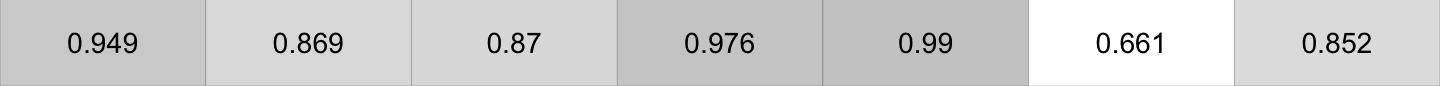

In [635]:
%%R -i KMT2A_LineageAUCs --units in -h 1.2 -w 20

p <- KMT2A_LineageAUCs %>% rownames_to_column('Population') %>% 
    mutate(lol = 'lol') %>% mutate(Population = factor(Population, levels=c('Multipotency_Score', 'HSC_MPP', 'Myeloid_Prog', 'Pre_pDC', 'Early_Lymphoid', 'Pro_B', 'Pre_B'))) %>% 
    ggplot(aes(x = Population, y = lol, fill = AUC)) + 
    geom_tile(color='black') + geom_text(aes(label = AUC), size = 10) + 
    scale_fill_gradient(low = "white", high = "grey80") + 
    theme_void() + theme(legend.position = "none") +
    labs(y = NULL, fill = NULL) + 
    scale_y_discrete(expand = c(0, 0)) + scale_x_discrete(expand = c(0, 0))
    
p
ggsave(file = 'BALL_MultipotencyScore_Figures/Subcluster_KMT2A_BALL2046_AbundanceBdev_Multipotency_AUCs.pdf', height = 1, width = 20)
p

### Plot KMT2A Fusions with Multipotency Score 

In [111]:
KMT2A_fusions = ball2046[ball2046.obs['Genomic_Subtype'] == "KMT2A"]
KMT2A_fusions = KMT2A_fusions.obs[['Institute', 'Genomic_Subtype', 'Subgroup', 'Fusion', 
                                   'oscensor', 'ostime', 'efscensor', 'efstime']].join(KMT2A_fusions.to_df())
KMT2A_fusions

Institute Genomic_Subtype                Subgroup  \
Patient                                                             
SJBALL030059_D1   St Jude           KMT2A     KMT2A-b/KMT2A-early   
SJBALL030313_D1   St Jude           KMT2A  KMT2A-a/KMT2A-commited   
SJALL040119_D1    St Jude           KMT2A     KMT2A-b/KMT2A-early   
SJALL040130_D1    St Jude           KMT2A     KMT2A-b/KMT2A-early   
SJMLL010_D        St Jude           KMT2A     KMT2A-b/KMT2A-early   
...                   ...             ...                     ...   
SJBALL014141_D1     MDACC           KMT2A     KMT2A-b/KMT2A-early   
SJMLL003_D        St Jude           KMT2A     KMT2A-b/KMT2A-early   
SJBALL030123_D1   St Jude           KMT2A  KMT2A-a/KMT2A-commited   
SJBALL030123_R1   St Jude           KMT2A  KMT2A-a/KMT2A-commited   
SJBALL031087_D1   St Jude           KMT2A     KMT2A-b/KMT2A-early   

                                 Fusion  oscensor  ostime  efscensor  efstime  \
Patient                                                                         
SJBALL030059_D1              AFF1-KMT2A       0.0  1494.0        0.0   1445.0   
SJBALL030313_D1             KMT2A-MLLT1       0.0  1170.0        0.0   1136.0   
SJALL040119_D1               KMT2A-DCPS       0.0  2049.0        0.0   1992.0   
SJALL040130_D1              KMT2A-MLLT3       0.0  2030.0        0.0   1988.0   
SJMLL010_D                   KMT2A-AFF1       0.0  1764.0        0.0   1722.0   
...                                 ...       ...     ...        ...      ...   
SJBALL014141_D1          KMT2A-ARHGAP32       1.0   195.0        1.0    161.0   
SJMLL003_D       KMT2A-AFF1;AFF1-CCDC84       0.0  5430.0        0.0   5430.0   
SJBALL030123_D1            KMT2A-MLLT10       1.0   905.0        1.0    527.0   
SJBALL030123_R1            KMT2A-MLLT10       1.0   905.0        1.0    527.0   
SJBALL031087_D1            KMT2A-MLLT10       0.0  1073.0        0.0      0.0   

                 Multipotency_Score   HSC_MPP  Myeloid_Prog   Pre_pDC  \
Patient                                                                 
SJBALL030059_D1            0.310770 -1.106204      1.431375  0.984563   
SJBALL030313_D1           -0.452239 -1.435757      0.866596 -0.554200   
SJALL040119_D1             1.352159  1.467661      1.986263  2.347389   
SJALL040130_D1             0.660540  1.096455      0.756932  0.948434   
SJMLL010_D                 1.044609  0.615954      0.497339  2.461231   
...                             ...       ...           ...       ...   
SJBALL014141_D1            1.300155  1.813404     -0.160948  2.359576   
SJMLL003_D                 0.080634  0.055885      0.202562  1.424114   
SJBALL030123_D1           -0.798601 -0.570765      0.090919 -0.941709   
SJBALL030123_R1           -1.116674  0.063925     -0.782797 -0.541376   
SJBALL031087_D1            0.850170  0.669238     -0.546207  1.073612   

                 Early_Lymphoid     Pro_B     Pre_B  Mature_B      T_NK  \
Patient                                                                   
SJBALL030059_D1        1.545509 -0.306696 -0.024594 -3.038016 -1.981852   
SJBALL030313_D1        0.279499 -0.753905  0.804269 -1.107906 -0.874978   
SJALL040119_D1         2.474784  0.196118  0.817110 -0.658946 -1.894793   
SJALL040130_D1         1.681056  0.130099  1.376749  0.434661 -0.916169   
SJMLL010_D             2.473523 -0.513715  1.087207 -2.717268 -2.105673   
...                         ...       ...       ...       ...       ...   
SJBALL014141_D1        1.569580  0.143275  0.237128 -1.308830 -1.974259   
SJMLL003_D             1.590325 -0.040018  1.701148 -1.443643 -0.830929   
SJBALL030123_D1       -1.771643 -1.604980  1.307513  1.523647  0.988804   
SJBALL030123_R1       -1.199041 -0.110381  2.204346  1.585205 -1.156067   
SJBALL031087_D1        0.856339 -0.828883  0.027428 -0.848704 -1.207572   

                 Monocyte  Erythroid  
Patient                               
SJBALL030059_D1  0.464842   0.068128  
SJBALL030313_D1  2.14

In [112]:
KMT2A_fusions['Partner'] = np.where(KMT2A_fusions['Fusion'].str.contains('AFF1'), 'AFF1', 
                                     np.where(KMT2A_fusions['Fusion'].str.contains('MLLT10'), 'MLLT10',
                                              np.where(KMT2A_fusions['Fusion'].str.contains('MLLT3'), 'MLLT3',
                                                       np.where(KMT2A_fusions['Fusion'].str.contains('MLLT1'), 'MLLT1',
                                                                np.where(KMT2A_fusions['Fusion'].str.contains('EPS15'), 'EPS15', 
                                                                         'Other')))))
                           

KMT2A_fusions_table = KMT2A_fusions[KMT2A_fusions['Subgroup'] != 'Not in the KMT2A cluster in tSNE'].\
    groupby('Subgroup')['Partner'].value_counts().unstack().fillna(0).round(1).T.\
    sort_values('KMT2A-b/KMT2A-early', ascending=False).\
    loc[['AFF1', 'EPS15', 'MLLT1', 'MLLT3', 'MLLT10', 'Other']].T

KMT2A_fusions_table

Partner                 AFF1  EPS15  MLLT1  MLLT3  MLLT10  Other
Subgroup                                                        
KMT2A-a/KMT2A-commited   1.0    0.0    4.0    6.0     6.0    0.0
KMT2A-b/KMT2A-early     92.0    4.0   15.0    5.0     4.0    5.0

In [113]:
%%R -i KMT2A_fusions_table

KMT2A_fusions_table %>% fisher.test()


	Fisher's Exact Test for Count Data

data:  .
p-value = 5.591e-09
alternative hypothesis: two.sided



In [114]:
%%R -i KMT2A_fusions
library(survival)
library(survminer)

KMT2A_fusions <- KMT2A_fusions %>% mutate(FusionCat = Fusion %>% str_replace(';.*','')) %>% 
    mutate(FusionCat = ifelse(FusionCat == 'AFF1-KMT2A', 'KMT2A-AFF1', FusionCat))
KMT2A_fusions %>% head()

  Institute Genomic_Subtype               Subgroup
1   St Jude           KMT2A    KMT2A-b/KMT2A-early
2   St Jude           KMT2A KMT2A-a/KMT2A-commited
3   St Jude           KMT2A    KMT2A-b/KMT2A-early
4   St Jude           KMT2A    KMT2A-b/KMT2A-early
5   St Jude           KMT2A    KMT2A-b/KMT2A-early
6   St Jude           KMT2A    KMT2A-b/KMT2A-early
                               Fusion oscensor ostime efscensor efstime
1                          AFF1-KMT2A        0   1494         0    1445
2                         KMT2A-MLLT1        0   1170         0    1136
3                          KMT2A-DCPS        0   2049         0    1992
4                         KMT2A-MLLT3        0   2030         0    1988
5                          KMT2A-AFF1        0   1764         0    1722
6 KMT2A-AFF1;AFF1-RAD51B;RAD51B-KMT2A      NaN    NaN       NaN     NaN
  Multipotency_Score    HSC_MPP Myeloid_Prog    Pre_pDC Early_Lymphoid
1          0.3107700 -1.1062036    1.4313754  0.9845634      1.54550

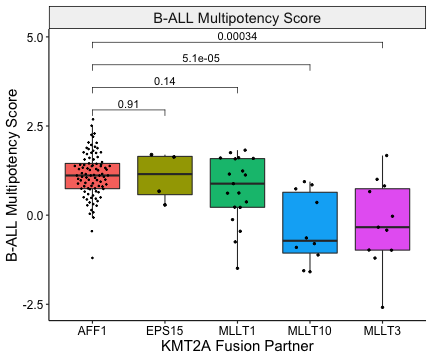

In [125]:
%%R --units in -h 5 -w 6

p2 <- KMT2A_fusions %>% filter(FusionCat %>% str_detect('AFF1|MLLT1$|MLLT3|MLLT10|EPS15')) %>%
    select(FusionCat, Multipotency_Score, HSC_MPP, Myeloid_Prog, Pre_pDC, Early_Lymphoid, Pro_B, Pre_B) %>% 
    pivot_longer(-FusionCat) %>% 
    mutate(name = factor(name %>% str_replace('Multipotency_','B-ALL Multipotency '), 
                         levels = c('B-ALL Multipotency Score'))) %>% drop_na() %>% 
    mutate(FusionCat = FusionCat %>% str_replace('.*-','') %>% 
          factor(levels = c('AFF1', 'EPS15', 'MLLT1', 'MLLT10', 'MLLT3'))) %>% 
    #mutate(FusionCat = FusionCat %>% str_replace('-','\n-') %>% 
    #      factor(levels = c('KMT2A\n-AFF1', 'KMT2A\n-EPS15', 'KMT2A\n-MLLT1', 'KMT2A\n-MLLT10', 'KMT2A\n-MLLT3'))) %>% 
    ggplot(aes(x = FusionCat, y = value, fill = FusionCat)) + 
    geom_boxplot(outlier.shape=NA) + ggbeeswarm::geom_quasirandom(width = 0.25, aes(size=FusionCat)) +  
    facet_wrap(.~name, scales = 'free', ncol = 3) + theme_pubr(legend='none') + 
    scale_size_manual(values = c(0.4, 1, 0.8, 0.8, 0.8)) + 
    stat_compare_means(comparisons = list(c('AFF1', 'EPS15'), c('AFF1', 'MLLT1'), c('AFF1', 'MLLT10'), c('AFF1', 'MLLT3'))) + #c('AFF1', 'EPS15'),
    ylab('Relative Abundance') + 
    theme(strip.text.x = element_text(size = 14.5), axis.title = element_text(size = 15)) + xlab('KMT2A Fusion Partner') + ylab('B-ALL Multipotency Score')
    

p2 
ggsave('BALL_MultipotencyScore_Figures/Subcluster_KMT2A_MultipotencyScore.pdf', height = 5.2, width = 6, useDingbats=FALSE)
p2

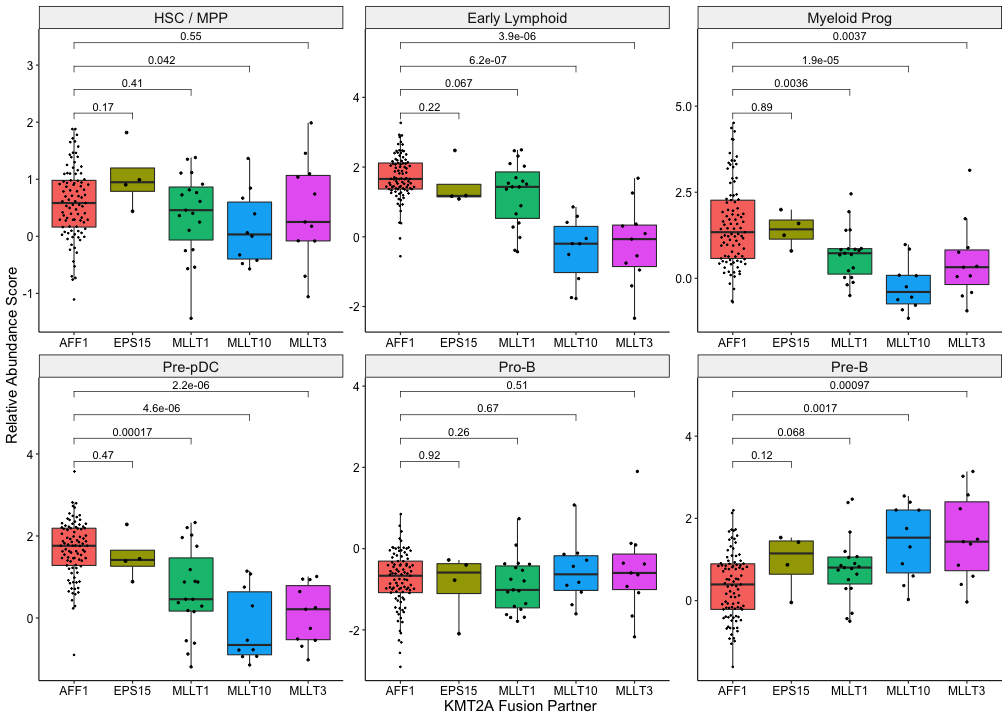

In [126]:
%%R --units in -h 10 -w 14

p2 <- KMT2A_fusions %>% filter(FusionCat %>% str_detect('AFF1|MLLT1$|MLLT3|MLLT10|EPS15')) %>%
    select(FusionCat, Multipotency_Score, HSC_MPP, Myeloid_Prog, Pre_pDC, Early_Lymphoid, Pro_B, Pre_B) %>% 
    pivot_longer(-FusionCat) %>% 
    mutate(name = factor(name %>% str_replace('HSC_','HSC / ') %>% str_replace('_Lym',' Lym') %>% str_replace('_Prog',' Prog') %>% str_replace('_','-'), 
                         levels = c('HSC / MPP', 'Early Lymphoid', 'Myeloid Prog', 'Pre-pDC', 'Pro-B', 'Pre-B'))) %>%  drop_na() %>% 
    mutate(FusionCat = FusionCat %>% str_replace('.*-','') %>% 
          factor(levels = c('AFF1', 'EPS15', 'MLLT1', 'MLLT10', 'MLLT3'))) %>% 
    #mutate(FusionCat = FusionCat %>% str_replace('-','\n-') %>% 
    #      factor(levels = c('KMT2A\n-AFF1', 'KMT2A\n-EPS15', 'KMT2A\n-MLLT1', 'KMT2A\n-MLLT10', 'KMT2A\n-MLLT3'))) %>% 
    ggplot(aes(x = FusionCat, y = value, fill = FusionCat)) + 
    geom_boxplot(outlier.shape=NA) + ggbeeswarm::geom_quasirandom(width = 0.25, aes(size=FusionCat)) +  
    facet_wrap(.~name, scales = 'free', ncol = 3) + theme_pubr(legend='none') + 
    scale_size_manual(values = c(0.4, 1, 0.8, 0.8, 0.8)) + 
    stat_compare_means(comparisons = list(c('AFF1', 'EPS15'), c('AFF1', 'MLLT1'), c('AFF1', 'MLLT10'), c('AFF1', 'MLLT3'))) + #c('AFF1', 'EPS15'),
    ylab('Relative Abundance') + 
    theme(strip.text.x = element_text(size = 14.5), axis.title = element_text(size = 15)) + xlab('KMT2A Fusion Partner') + ylab('Relative Abundance Score')
    

p2 
ggsave('BALL_MultipotencyScore_Figures/Subcluster_KMT2A_DevState_Abundance.pdf', height = 9.5, width = 15, useDingbats=FALSE)
p2

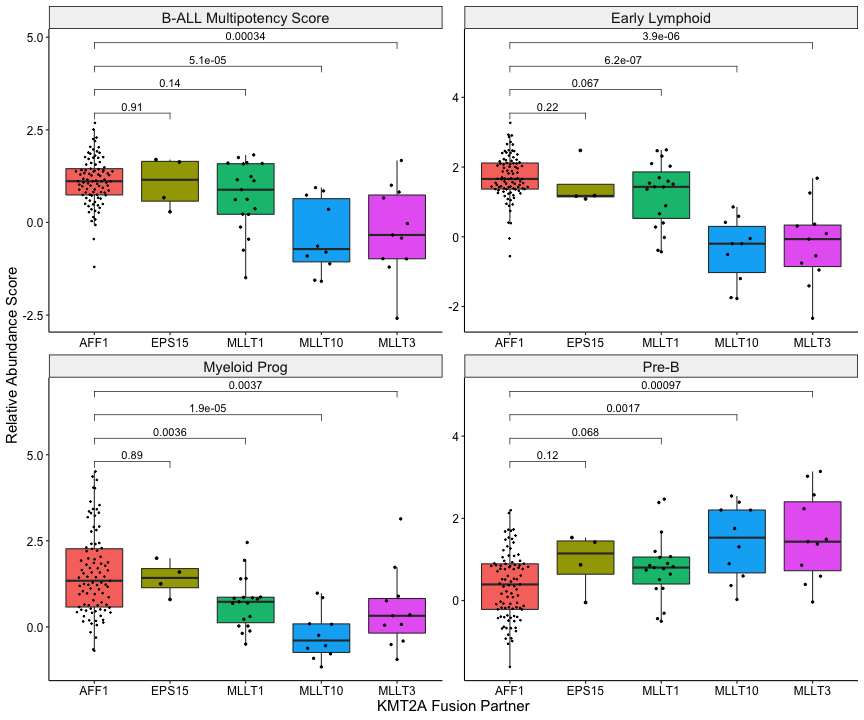

In [127]:
%%R --units in -h 10 -w 12

p2 <- KMT2A_fusions %>% filter(FusionCat %>% str_detect('AFF1|MLLT1$|MLLT3|MLLT10|EPS15')) %>%
    select(FusionCat, Multipotency_Score, HSC_MPP, Myeloid_Prog, Pre_pDC, Early_Lymphoid, Pro_B, Pre_B) %>% 
    pivot_longer(-FusionCat) %>% 
    mutate(name = factor(name %>% str_replace('Multipotency_','B-ALL Multipotency ') %>% str_replace('HSC_','HSC / ') %>% 
                         str_replace('_Lym',' Lym') %>% str_replace('_Prog',' Prog') %>% str_replace('_','-'), 
                         levels = c('B-ALL Multipotency Score', 'Early Lymphoid', 'Myeloid Prog', 'Pre-B'))) %>%  drop_na() %>% 
    mutate(FusionCat = FusionCat %>% str_replace('.*-','') %>% 
          factor(levels = c('AFF1', 'EPS15', 'MLLT1', 'MLLT10', 'MLLT3'))) %>% 
    #mutate(FusionCat = FusionCat %>% str_replace('-','\n-') %>% 
    #      factor(levels = c('KMT2A\n-AFF1', 'KMT2A\n-EPS15', 'KMT2A\n-MLLT1', 'KMT2A\n-MLLT10', 'KMT2A\n-MLLT3'))) %>% 
    ggplot(aes(x = FusionCat, y = value, fill = FusionCat)) + 
    geom_boxplot(outlier.shape=NA) + ggbeeswarm::geom_quasirandom(width = 0.25, aes(size=FusionCat)) +  
    facet_wrap(.~name, scales = 'free', ncol = 2) + theme_pubr(legend='none') + 
    scale_size_manual(values = c(0.4, 1, 0.8, 0.8, 0.8)) + 
    stat_compare_means(comparisons = list(c('AFF1', 'EPS15'), c('AFF1', 'MLLT1'), c('AFF1', 'MLLT10'), c('AFF1', 'MLLT3'))) + #c('AFF1', 'EPS15'),
    ylab('Relative Abundance') + 
    theme(strip.text.x = element_text(size = 14.5), axis.title = element_text(size = 15)) + xlab('KMT2A Fusion Partner') + ylab('Relative Abundance Score')
    
    
p2 
ggsave('BALL_MultipotencyScore_Figures/Subcluster_KMT2A_FourCat_Multipotency_ThreeDevStates.pdf', height = 9.5, width = 11, useDingbats=FALSE)
p2